<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# **Описание проекта:**

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

**Описание данных:**

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

- **balcony** — число балконов

- **ceiling_height** — высота потолков (м)

- **cityCenters_nearest** — расстояние до центра города (м)

- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

- **first_day_exposition** — дата публикации

- **floor** — этаж

- **floors_total** — всего этажей в доме

- **is_apartment** — апартаменты (булев тип)

- **kitchen_area** — площадь кухни в квадратных метрах (м²)

- **last_price** — цена на момент снятия с публикации

- **living_area** — жилая площадь в квадратных метрах (м²)

- **locality_name** — название населённого пункта
 
- **open_plan** — свободная планировка (булев тип)

- **parks_around3000** — число парков в радиусе 3 км

- **parks_nearest** — расстояние до ближайшего парка (м)

- **ponds_around3000** — число водоёмов в радиусе 3 км

- **ponds_nearest** — расстояние до ближайшего водоёма (м)

- **rooms** — число комнат

- **studio** — квартира-студия (булев тип)

- **total_area** — общая площадь квартиры в квадратных метрах (м²)

- **total_images** — число фотографий квартиры в объявлении

#  **Шаг 1. Ознакомимся с данными таблицы и их структурой.**

Настроим окружение: импортируем все необходимые библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

И снимем ограничение на кол-во показываемых столбцов, так как при добавлении новых столбцов, формат отображения меняется на компактный и часть данных не отображается.

Загрузим в DataFrame данные, с которыми будем работать. 

Посмотрим на несколько первых записей c помощью метода `head`.

Выведем общую информацию по таблице c помощью метода `info`.


<a id = 'data'></a>

In [2]:
pd.options.display.max_columns = None
#df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # /datasets/real_estate_data.csv
df = pd.read_csv('real_estate_data.csv', sep='\t') # для локального использования
df.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()
old_df = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Типы данных в `df`:

-Категориальные: `locality_name`.

-Количественные: `total_images`, `last_price`, `total_area`, `rooms`, `ceiling_height`, `floors_total`, `living_area`, `floor`, `kitchen_area`, `balcon`y, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_nearest`, `ponds_around3000`, `days_exposition`.

-Логические: `is_apartment`, `studio`, `open_plan`.

Большая часть данных в таблице имеет пропуски, есть проблемы с типами данных. Всего в таблице 23699 объектов и 22 признака для них.

<a id = 'empty_values'></a>

Выведем информацию о NaN по каждому из столбцов (процент содержания NaN в каждом столбце относительно общего количества строк):

In [4]:
percent_nulls = (df.isnull().sum()/len(df)*100).sort_values()
percent_nulls

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

Вызывем метод `columns` для изучения корректности названий заголовков таблицы.

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Беспорядочных имен столбцов нет, в названиях разные регистры не спользуются, пробелы в названиях не используются.

Проверим есть ли в данных строки - дубликаты.

In [6]:
df.duplicated().sum()

0

Строк - дубликатов в данных нет.

**Вывод**

Отметим следующие проблемы данных в таблице:

- `first_day_exposition` - тип данных `object` - заменим на  `datetime`
- `ceiling_height` - пропуски
- `floors_total` - тип `float`, заменим на `int` (количество этажей - целое число), обратим внимание на пропуски
- `living_area` - обнаружены пустые ячейки
- `is_apartment` - тип `object`, по содержанию должен быть тип `bool`, поработаем с пропускамию самый большой процент пропусков (88%)
- `kitchen_area` - есть пропуски
- `balcony` - тип `float` заменим на `int` (количество балконов - целое число), примем решение по пропускам. Большой процент пропусков - 48,6%
- `locality_name` - пропуски
- `airports_nearest` - здесь тоже есть пропуски
- `cityCenters_nearest` - проблема с пропусками
- `parks_around3000` - тип `float` заменим на `int` (целочисленный признак), примем решение по пропускам
- `parks_nearest` - ячейки с пропусками, большой процент пропусков (66%)
- `ponds_around3000` - тип `float` заменим на `int` (целочисленный признак), поработем с пропусками
- `ponds_nearest` - примем решение что делать с пропускам, большой процент пропусков (61,5%)
- `days_exposition` - тип `float`, по содержанию должен быть тип `int`, обнаружены пустые ячейки

**Исходя из выявленных проблем и общей задачи по проекту, предлагаем следующий план работы:**

- найдем пропуски данных и заменим пустые значения,

- найдем аномальные (несоотвествущих реальности) значений, проанализируем с помощью данных гос стандарта, сделаем замену,

- преобразуем типы данных в выбранных столбцах,

- устраним явные и неявные дубликаты,

- засширить данные таблтцы доплнительными столбцами - параметрами и обоснуем их значение,

- опишем параметры общая площадь, жилая площадь, площадь кухни, цена квартиры, количество комнат, высота потолков, этажа и общее количество этажей. Опишем параметры расстояния: до центра, до ближайшего парка, до ближайшего аэропорта,

- проанализируем влияние различных параметров на цены на жилье, выделим наиболее значимые параметры и дадим рекомендации по улучшению исходных данных,

- проведем анализ и дадим ответы на поставленные вопросы,

- подобьем итоги и подготовим вывод.

**Список поставленных вопросов для анализа:**

- изучим как быстро продавались квартиры. 

- определим какие факторы больше всего влияют на общую стоимость объектаб а именно: проанализируем, зависит ли цена от:

    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - типа этажа, на котором расположена квартира;
    - даты размещения (день недели, месяц, год).
    
- рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

- вычислим среднюю цену каждого километра в Санкт-Петербурге, то есть определим, как стоимость объектов зависит от расстояния до центра города.

<a id = 'hist'></a>

# **Посмотрим на распределение данных в столбцах - признаках на графике.**

Постройм гистограммы для всех числовых столбцов таблицы.

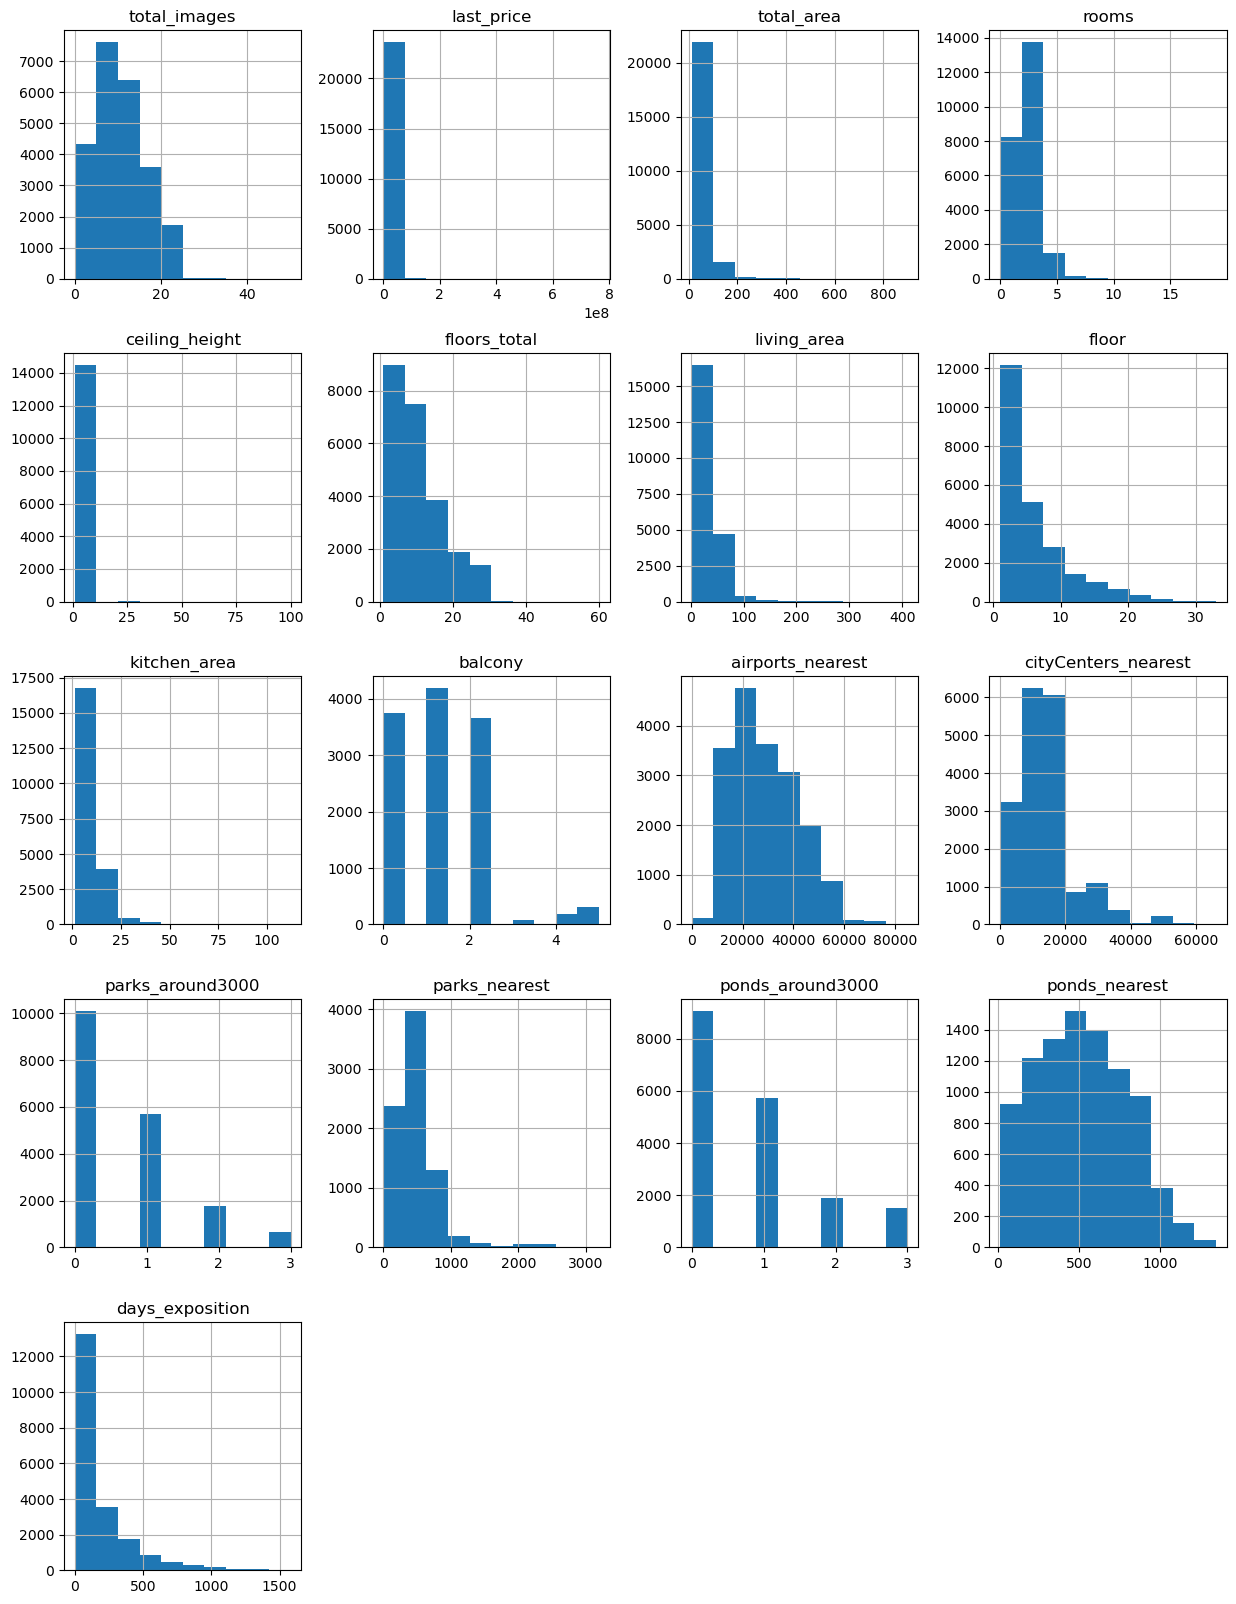

In [7]:
df.hist(figsize=(15, 20));

Определим временной период размещения обьявлений.

In [8]:
df['first_day_exposition'].sort_values()

10132    2014-11-27T00:00:00
8393     2014-11-27T00:00:00
15857    2014-11-27T00:00:00
2831     2014-11-27T00:00:00
696      2014-11-27T00:00:00
                ...         
10917    2019-05-03T00:00:00
5986     2019-05-03T00:00:00
9217     2019-05-03T00:00:00
21887    2019-05-03T00:00:00
15072    2019-05-03T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

Объявления были размещены в период с ноября 2014 года по май 2019 года.

 **Гистограмма по признакам дала следующую картину:**
 
 - `total_images` - чаще всего к объявлению продавцы прилагают от 5 до 10 фото,
 - `last_price` - в обьявлениях имеются данные по квартирам с не реально низкими ценами,
 - `total_area` - чаще всего предлагаю на продажу квартиры общей площадь 40 - 100 квм, но встречаются квартиры площадью 900 квм (вопрос)
 - `rooms` - больше всего в обьявлениях встречатся квартиры  с 2-3 комнатами, немного реше 1 комнатные, встречаются квартиры с 19 комнатами (вопрос)
 - `ceiling_height` - средняя высота потолков  стандарная - 2,5 м, встречаются квартиры с высотой потолков 100 м(вопрос),
 - `floors_total` - чаще всего продают квариты в 5 и 10 этажных домах, встречатся квартиры и в 60 этажных домах,
 - `living_area` - самая распространеная жилая площадь в обьявлениях 20-40 квм, есть квартиры площадью 2 квм (вопрос) и 400 квм
 - `floor` - чаще всего предлагают квартиры на 1-5 этажах, но есть квартиры и на 30 этаже,
 - `kitchen_area` - чаще всего встречаются квартиры с кухней площадью 9 квм,но есть обьявления с кухней 1 кв.м. и 100 квм. (вопросы вызывает и то, и другое)
 - `balcon`y - самое распространенние количество балконов - 1 шт, чуть меньше 2 или полное отсутствие, есть счастливые собственники 5 балконов,
 - `airports_nearest` - для многих квартир аеропорт расположен на расстоянии 15-25 км, есть квартиры по всей видимости на территории аеропорта (вопрос) и на расстоянии 85км,
 - `cityCenters_nearest` - много квартир продается на расстоянии 10-18 км от центра, встречаются в самом центре или удаленные на от центра на расстояние 70км,
 - `parks_around3000` - на расстоянии 3 км от большинства квартир нет ни одного парка, более 3 парков рядышком от квартиры не встречается,
 - `parks_nearest` - чаще всего квартиры располагаются в 500м от парка, редко встречаются квартиры  в отдаленных от парковых зон местах (3км)
 - `ponds_around3000` - аналогичная ситуация с водоемами: на расстоянии 3 км от большинства квартир нет ни одного водоема, встречаются квартиры, где рядышком три водоема,
 - `ponds_nearest` - если и есть рядом водоем, то чаще всего располощен на расстоянии 400 м
 - `days_exposition` - большинство обьявлений держатся на сайте 50 дней, есть обьявления, которые были сняты в течение дня и те которым уже 4 года(вопрос). 

# **Шаг 2. Предобработка данных**

Еще раз рассмотрим структуру данных в таблице и подтвердим выводы сделанные на основе гистограмм.

In [9]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В целом, данные выглядят нормально. Правда, есть метровые и 100 метровые потолки, 900 квм общей площади при максимальной жилой 419,7 квм,  19 комнатные квартиры и 4 с лишним года "висящие объявления", минимальная цена за квартиру 12190. 

Выводы, сделанные на основе гистограмм хоть и с приблизительными (на глазок) данными, но верные.

Посмотрим что можно с этим сделать.

<a id = 'empty_values'></a>

# **Начнем предобработку данных с работы над пропущенными значениями**

**Важные столбцы, будем работать с пропуками:**

- `floors_total` - необходим для категоризации данных по расположению этажа в жилом доме,
- `living_area` -ключевой фактор для рассчета доли от общей площади,
- `kitchen_area` - ключевой фактор для рассчета доли от общей площади,
- `cityCenters_nearest` - ключевой фактор для определения удаленности от центра Санкт-Петербурга, можно попробовать определить усредненое расстояние в зависимости от населенного пункта, но посмотрим как это удастся реализовать,
- `locality_name` - имеет большое значения для доказательства гипотез. Но его можно восстановить, зная местоположение от центра.

**Столбцы, неимеющие значения для гипотез:**

- `is_apartment` - определение типа жилого помещения, т.е. это квартира или апартаменты не имеет значения для разработки гипотез.
- `balcony` - балкон хоть и приятное дополнение к квартире, но не имеет значения для гипотез. Но его легко восстановить.
- `parks_nearest и ponds_nearest` - потеря этих столбцов не повлияет на рабработку гипотез. Полагаю их можно восстановить из данных столбцов parks_around3000 и ponds_around3000.
- `airports_nearest`, `parks_around3000` и `ponds_around3000` - большое количество пропусков (около 5тыс) говорит или о системной ошибке, или не знании, или не желании собственников отвечать на такие вопросы. Можно ориентироваться в пропусках на местоположение в `locality_name`.

**Столбцы, восстановления значений которых невозможно:**

- `ceiling_height` - пропущенные значения можно заменить стандартом (2,5 м - 2,7 м) или средним по выборке, но пропусков очень много и замена значений сильно исказит достоверность данных, вряд ли высота потолков существенно влияет на цену и сроки продажи,
- `days_exposition` - важный столбец для определения успешности продаж, пропуски могут свительствовать о том, что обьявление еще не снято, те объект не продан.

<a id = 'locality_name'></a>

Прежде рассмотрим один из важных параметров датафрейма - названия населенных пунктов.

***-  `locality_name`***

Рассмотрим строки с пустыми значениями в столбце `locality_name` определим в каких еще столбцах одновременно с этим отсутствуют данные.

In [10]:
df_cut = df[df['locality_name'].isnull()]
df_cut.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


In [11]:
df_cut.shape

(49, 22)

Восстановить расстояние от центра можно было бы по названию населеного пункта, но так как в некоторых строках нет ни названия населеного пункта, ни расстояния до центра - удалим такие строки, восстановить их мы не сможем.

In [12]:
df.drop(df[(df['locality_name'].isnull())&(df['cityCenters_nearest'].isnull())].index, inplace = True)
df_cut = df[df['locality_name'].isnull()]
df_cut.shape

(41, 22)

Разобьем на группы по удаленности от центра все строки с пропусками в названии обьекта.

In [13]:
df['quantile_cityCenters_nearest'] = pd.qcut(df_cut['cityCenters_nearest'], q = 4)
df['quantile_cityCenters_nearest'].value_counts()

(8943.0, 17369.0]     15
(1321.999, 4383.0]    11
(4383.0, 8943.0]      11
(17369.0, 41294.0]     4
Name: quantile_cityCenters_nearest, dtype: int64

Проверим какие населенные пункты попадают в границы 8943-17369 м от центра в нашем датафрейме.

In [14]:
df[(df['cityCenters_nearest'] >8943)&(df['cityCenters_nearest'] <= 17369)]['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', nan], dtype=object)

In [15]:
df[df['locality_name'] == 'посёлок Шушары']['cityCenters_nearest'].describe()

count      436.000000
mean     24243.387615
std       5502.810462
min      17012.000000
25%      18506.250000
50%      24212.000000
75%      29846.000000
max      32079.000000
Name: cityCenters_nearest, dtype: float64

Данные показывают, что 15 объектов из промежутка 8943-17369 км от центра можно отнести к Санкт-Петербургу.
А значит и по двум другим промежуткам меньше 8943, обьявления можно отнести как обьект из Санкт-Петербурга.

In [16]:
df[(df['cityCenters_nearest'] >1321.999)&(df['cityCenters_nearest'] <= 8943)]['locality_name'].unique()

array(['Санкт-Петербург', nan], dtype=object)

Заменим данные в 37 ячейках с пропусками по названию местности на  Санкт-Петербург.

In [17]:
values = {'locality_name': 'Санкт-Петербург'}
df[(df['locality_name'].isnull())&(df['cityCenters_nearest'] >1321.999)&(df['cityCenters_nearest'] <= 17369)] =\
df[(df['locality_name'].isnull())&(df['cityCenters_nearest'] >1321.999)&(df['cityCenters_nearest'] <= 17369)].fillna(value = values)
df_cut = df[df['locality_name'].isnull()]
df_cut.shape

(4, 23)

Осталось 4 пустых обьекта, попробуем подобрать для них название местности.

In [18]:
df_cut = df[df['locality_name'].isnull()]
df_cut.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,quantile_cityCenters_nearest
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,NaN,NaN,68.1,4,NaN,False,False,16.7,NaN,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0,"(17369.0, 41294.0]"
13690,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.6,1,False,False,False,8.0,2.0,NaN,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0,"(17369.0, 41294.0]"
21119,8,3500000.0,43.2,2018-11-11T00:00:00,2,NaN,4.0,NaN,2,NaN,False,False,NaN,NaN,NaN,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0,"(17369.0, 41294.0]"
21276,0,17122148.0,178.3,2017-02-10T00:00:00,1,NaN,3.0,NaN,1,NaN,False,False,41.6,1.0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0,"(17369.0, 41294.0]"


Посмотрим, какие населенные пункты находятся в пределах 23650-23680м (это для 2-го в списке)

In [19]:
df[(df['cityCenters_nearest'] >=23650)&(df['cityCenters_nearest'] <= 23680)]['locality_name'].unique()

array([nan, 'посёлок Стрельна', 'Санкт-Петербург'], dtype=object)

In [20]:
df[df['locality_name']  == 'посёлок Стрельна']['airports_nearest'].mean()

28148.363636363636

Смущает в данных по поселку "Стрельная" большее расстояние для ближайщего аеропорта. Возможно наш обьект все-таки относится к Санкт-Петербургу.

Сделаем еще одну проверку - по отдаленности от аеропорта.

In [21]:
df[(df['airports_nearest'] >=20200)&(df['airports_nearest'] <= 20300)]['locality_name'].unique()

array(['Санкт-Петербург', nan, 'Павловск'], dtype=object)

In [22]:
df[df['locality_name']  == 'Павловск']['cityCenters_nearest'].min()

31533.0

Как видим, Павловск тоже не подходит, значит обьект под индексом 13690 отнесем к Санкт-Петербургу.

Рассмотрим еще два обьекта, удаленность от центра 31813 и 31897 м и так же проверим на удаленность от аеропорта.

In [23]:
df[(df['cityCenters_nearest'] >=31800)&(df['cityCenters_nearest'] <= 31900)]['locality_name'].unique()

array(['Колпино', 'Петергоф', nan], dtype=object)

In [24]:
df[df['locality_name']  == 'Колпино']['airports_nearest'].min()

23649.0

In [25]:
df[df['locality_name']  == 'Петергоф']['airports_nearest'].min()

34626.0

In [26]:
df[df['locality_name']  == 'посёлок Понтонный']['airports_nearest'].min()

28997.0

Как видим не один из них не подходит. Найдем населенные пункты, где удаленность от ареропорта находится в промежутке 19659-19744м и посчитаем их удаленность от центра.

In [27]:
df[(df['airports_nearest'] >=19659)&(df['airports_nearest'] <= 19744)]['locality_name'].unique()

array(['Пушкин', 'Санкт-Петербург', 'посёлок Шушары', nan], dtype=object)

In [28]:
df[df['locality_name']  == 'Пушкин'].agg({'cityCenters_nearest':['min','max']})

,cityCenters_nearest
min,24311.0
max,35610.0


In [29]:
df[df['locality_name']  == 'Пушкин']['cityCenters_nearest'].describe()

count      368.00000
mean     28745.37500
std       2752.36219
min      24311.00000
25%      26433.00000
50%      27930.50000
75%      30693.00000
max      35610.00000
Name: cityCenters_nearest, dtype: float64

In [30]:
df[df['locality_name']  == 'посёлок Шушары']['cityCenters_nearest'].describe()

count      436.000000
mean     24243.387615
std       5502.810462
min      17012.000000
25%      18506.250000
50%      24212.000000
75%      29846.000000
max      32079.000000
Name: cityCenters_nearest, dtype: float64

Можем записать обьекты под индексом 8986 и 21119 , как из населенного пункта Пушкин

Остался не опознаным еще один обьект, отдаленность от центра 41294км, от аеропорта - 60195 км. Найдем населенные пункты соотвествующие этим двум условиям.

In [31]:
df[(df['airports_nearest'] >=59000)&(df['airports_nearest'] <= 60300)]['locality_name'].unique()

array(['Сестрорецк', nan], dtype=object)

In [32]:
df[df['locality_name']  == 'Сестрорецк'].agg({'cityCenters_nearest':['min','max']})

,cityCenters_nearest
min,31130.0
max,42971.0


Отнесем обьект под номером 21276 к населенному пункту Сестрорецк.

За полним пустые ячейки согласно выявленных соответствий.

In [33]:
values = {'locality_name': 'Пушкин'}
df[(df['airports_nearest'] >=19659)&(df['airports_nearest'] <= 19744)] =\
df[(df['airports_nearest'] >=19659)&(df['airports_nearest'] <= 19744)].fillna(value = values)

values = {'locality_name': 'Санкт-Петербург'}
df[(df['airports_nearest'] >=20200)&(df['airports_nearest'] <= 20300)] =\
df[(df['airports_nearest'] >=20200)&(df['airports_nearest'] <= 20300)].fillna(value = values)

values = {'locality_name': 'Сестрорецк'}
df[(df['airports_nearest'] >=59000)&(df['airports_nearest'] <= 60300)] =\
df[(df['airports_nearest'] >=59000)&(df['airports_nearest'] <= 60300)].fillna(value = values)

df_cut = df[df['locality_name'].isnull()]
df_cut.shape

(0, 23)

Мы заполнили все пустые ячейки в столбце `locality_name`.

В начальном датафрейме из было 41 шт, что составляло все лишь 0,2% от общей выборки. Это количество незначительное и ими можно было пренебречь (удалить строки).

Удалим лишний столбец, внесенный ранее quantile_cityCenters_nearest, он нам уже не нужен.

In [34]:
df = df.drop(columns='quantile_cityCenters_nearest') 

Создадим метод (функцию) для работы с данными по заданным столбцам. Это позволит быстрее получать информацию и значительно сократить техническую часть проекта.

Обьявим метод `column_isna_nunique` для получения короткой информации по столбцу о пропусках и отсортированных уникальных значениях в столбце.

In [35]:
def column_isna_nunique(column): 
    isna_sum_column = df[column].isna().sum()    
    column_nuniqu = df[column].sort_values().nunique()
    percentage_of_total = df[column].isnull().sum()/len(df[column])
    
    try:
        print('Количество пропусков:', isna_sum_column)
        print('Процент пропусков от общего количества:', '{:.2%}'.format(percentage_of_total))
        print('Количество уникальных значений:', column_nuniqu)        
        return df[column].sort_values().unique()
    except:
        return 'Не верно введен аргумент'

Посмотрим на количество уникальных населенных пунктов, которые представлены в датафрейме, количество пропусков, представим уникальные значения в виде списка.

In [36]:
column_isna_nunique('locality_name')

Количество пропусков: 0
Процент пропусков от общего количества: 0.00%
Количество уникальных значений: 364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Список с населенными пунктами внес ясность, что в данных была проблема не только с пропущенными значениями, но и с написанием названий. 

Например:

- в названиях встречается как «поселок», так и «посёлок»,
- также есть «городской посёлок» и «посёлок городского типа»,
- также встречается «садовое товарищество» и «садоводческое некоммерческое товарищество»,
- замечено в названиях «посёлок станции» и «посёлок при железнодорожной станции»,
- имеются дубликаты к примеру посёлок Мурино, поселок Мурино и Мурино.

Унифицированных требований к названиям нет, а например до 2019 года город Мурино был поселком.
По этому, что б не искать и далее такие вот совпадения, откинем все кроме самого названия (будем искать слова, написанные с большой буквы).

In [37]:
def make_short_name(row):    
    split_name = row.split()
    new_name = []
    name = []    
    for word in split_name:
        #print(word)
        if word[0].isupper(): 
            #print(word[0])
            name.append(word)
            #print(name)
            new_name = ' '.join(word for word in name)
            #print(new_name)
    return new_name
    
df['locality_name'] = df['locality_name'].apply(make_short_name)

short_name_keys = df['locality_name'].sort_values().unique()
short_name_keys

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

Устранили проблему с написанием названий.

<a id = 'rooms'></a>

***- `rooms`***

Поработаем с важным параметром 'rooms'.

Обратим внимание на минимальное значение, в некоторых случаях число комнат указано как 0. 

Будем считать, что если число комнат 0, то это студия.

Студией называется квартира, в которой нет привычных внутренних перегородок, за исключением санузла, а разграничение по функциональным зонам носит условный характер. Это значит, что спальня, кухня и гостиная в такой квартире объединены в единое пространство.

Площадь такого жилья может быть абсолютно любой: от небольшого и очень компактного помещения до элитной жилплощади более 100 квадратных метров.

Посмотрим сколько квартир с 0 комнат и не указаны как студия.

In [38]:
df.query('rooms == 0 ').count()

total_images            197
last_price              197
total_area              197
first_day_exposition    197
rooms                   197
ceiling_height           82
floors_total            194
living_area             183
floor                   197
is_apartment              6
studio                  197
open_plan               197
kitchen_area              0
balcony                 126
locality_name           197
airports_nearest        118
cityCenters_nearest     118
parks_around3000        118
parks_nearest            29
ponds_around3000        118
ponds_nearest            69
days_exposition         183
dtype: int64

In [39]:
df.query('rooms == 0 and studio == True')['studio'].count()

138

In [40]:
df.query('rooms == 0 and is_apartment == True')['is_apartment'].count()

0

In [41]:
df.query('rooms == 0 and open_plan == True')['open_plan'].count()

59

Всего у нас нулей в столбце `rooms` - 197, из них 138 считается студией.

Апартаментами считается нежилое помещение, приспособленное для временного или постоянного проживания. 

Основная разница между апартаментами и студией – это то, что квартира-студия относится к жилому фонду, а ее аналог с пометкой «апартаменты» – нет.

Так как отличие аппартаментов и студии лишь юридическое, то так же проверили не путают ли продавцы навзания обьектов недвижимости.

Исходя из выявленных данных можем все нули в студиях заменить на 1 (комнату).

Квартиры свободной планировки тоже запишем как однокомнатные.

In [42]:
df.query('rooms == 1 and studio == True')['studio'].count()

11

Так же определили, что 11 квартир- студий значатся как однокомнатные.

In [43]:
df.loc[(df['rooms'] == 0)&(df['studio'] == True), 'rooms'] = 1

In [44]:
df.loc[(df['rooms'] == 0)&(df['open_plan'] == True), 'rooms'] = 1

In [45]:
df.query('rooms == 0 ')['rooms'].count()

0

<a id = 'kitchen_area'></a>

***- `kitchen_area`***

Мы уже отмечали проблемы с пропусками и неправильными значениями в столбце `kitchen_area`. 
Рассмотрим данные подробнее и заменим или удалим пропуски.

In [46]:
df['kitchen_area'].isna().sum()

2276

Проверим причины пропусков:
являются ли квартиры с кухней площадью 0 аппартаментами, студией или свободной планировки.

In [47]:
df.loc[(df['kitchen_area'].isnull())&(df['studio'] == True)]['studio'].count()

149

In [48]:
df.loc[(df['kitchen_area'].isnull())&(df['open_plan'] == True)]['open_plan'].count()

67

Таких значений не много (149+67 = 216), а значит пропуски появились по причине не внимательного или халатного заполнения данных при подаче обьявлений.

Чтобы заполнить пропущенные значения, мы возьмем медианное значение для каждой квартиры с учетом количества комнат. 

Создаем сводную таблицу с медианным значением по площади кухонь, заменяем пропущенные значения в столбце `kitchen_area` медианным значением.

In [49]:
kitchen_area_median = df.pivot_table(index='rooms', values='kitchen_area', aggfunc='median')
kitchen_area_median

,kitchen_area
rooms,
1,9.025
2,8.800
3,9.500
4,11.100
5,15.100
6,19.500
7,20.000
8,25.000
9,14.300


In [50]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['rooms'].map(kitchen_area_median['kitchen_area']))

In [51]:
df['kitchen_area'].isna().sum()

0

По столбцу `kitchen_area` мы наблюдаем очень маленькое значение площади кухни 1,3 квм. Предлагаю его оставить так как есть, ведь в квартирах действительно могут быть кухни площадью - это квартиры малого метража.

In [52]:
df.query('kitchen_area < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.5,2019-05-01T00:00:00,1,2.8,14.0,19.5,10,NaN,False,False,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN


В обнаруженном недоразумении действительно общая площадь кавртиры не большая - 28,5 квм.

<a id = 'living_area'></a>

Рассмотрим один из ключевых признаков - жилая площадь. 

***- `living_area`***

В данном столбце есть как отсутствующие значения, так и очень малые.

С пропусками вопрос решим также, как и в случае с площадью кухни: возьмем медианное значение для каждой квартиры с определенным количеством комнат.

Создадим сводную таблицу с медианными значениями значение такого показателя как отношение жилой площади к общей площади. Таким образом узнаем долю Жилой площади от Общей площади квартиры. Но так как количество комнат в каждой квартире разное, необходимо расчитывать долю для каждого типа квартиры отдельно и заменим пропущенные значения в столбце `living_area` медианой.

In [53]:
df['living_area'].isna().sum()

1902

In [54]:
df['living_area'] = df['living_area'].fillna(0)

living_area_mean = df['living_area'].mean()
total_area_mean = df['total_area'].mean()
living_area_percent = living_area_mean / total_area_mean 

def living_area_calculator(row):
    if row[7] == 0:
        row[7] = float(format(row[2] * living_area_percent, '.2f'))
    return row

df = df.apply(living_area_calculator, axis=1)

df['living_area'].isna().sum()

0

Согласно нормам, зафиксированным в Жилищном кодексе, на 1 члена семьи должно приходиться 13,65 квм общей площади. А жилой – минимум 9 квм.
Посмотрим  если у нас в выборке квартиры с жилой площадью меньше 9 квм.

In [55]:
df.query('living_area < 9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.0,21.4,2019-02-07T00:00:00,1,2.90,8.0,8.30,7,NaN,False,False,6.300,NaN,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN
2309,10,4200000.0,62.4,2017-06-15T00:00:00,2,2.60,9.0,8.40,6,NaN,False,False,41.000,2.0,Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.00,17,NaN,False,False,11.000,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
12040,5,1900000.0,15.0,2018-06-27T00:00:00,1,2.50,5.0,7.88,1,NaN,False,False,9.025,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.00,2,NaN,False,False,9.000,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
16431,13,3799000.0,31.0,2018-04-12T00:00:00,1,2.60,5.0,6.00,1,NaN,False,False,17.000,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
16949,9,1550000.0,15.0,2018-08-21T00:00:00,1,2.70,9.0,7.88,1,NaN,False,False,9.025,NaN,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0
17248,20,5300000.0,33.0,2017-04-14T00:00:00,1,2.70,22.0,8.90,16,NaN,False,False,16.100,1.0,Санкт-Петербург,33803.0,13671.0,0.0,NaN,0.0,NaN,216.0
17582,11,2680000.0,22.0,2018-08-11T00:00:00,1,NaN,25.0,5.00,8,NaN,True,False,9.025,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9.0,6.83,1,NaN,False,False,9.025,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0


В нашей выборке таких квартир 14, среди них есть одно-двух-трех- и четырех-комнатные квартиры.

Подкорректируем эти значения исходя из того, что комната не меньше 9 квм.(с учетом количества комнат),

In [56]:
def roows_area(row):
    value = row['living_area']
    if row['rooms'] == 1:        
        value = 9
        return value
    elif row['rooms'] == 2:        
        value = 18
        return value
    elif row['rooms'] == 3:        
        value = 27
        return value
    elif row['rooms'] == 4:        
        value = 36
        return value
        
df.loc[(df['living_area'] < 9), 'living_area'] = df.loc[(df['living_area'] < 9)].apply(roows_area, axis=1)

In [57]:
df.query('living_area < 9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Проверим, что б сумма Жилой площади и Кухни не превышала Общую площадь.

In [58]:
df.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,False,False,6.200,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,9.025,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,1,NaN,14.0,17.00,1,NaN,False,True,9.025,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,1,NaN,17.0,24.75,4,NaN,True,False,9.025,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,False,False,5.000,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23191,3,1900000.0,18.90,2016-04-04T00:00:00,1,NaN,16.0,16.00,12,NaN,False,False,9.025,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0
23202,13,4919880.0,67.92,2018-10-23T00:00:00,2,NaN,3.0,63.00,3,NaN,False,False,13.040,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,1,NaN,25.0,18.00,16,NaN,True,False,9.025,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23579,7,2350000.0,24.80,2018-06-07T00:00:00,1,NaN,10.0,18.00,2,NaN,False,False,9.025,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0


На проверку оказалось 322 объекта, где Общая площадь меньше, чем сумма Жилой и кухни. Устраним несоотвествие, Заменим данные по Жилой площади на разницу Общей площади и Кухни. 

In [59]:
df.loc[df['total_area'] < df['living_area'] + df['kitchen_area'], 'living_area'] = df['total_area'] - df['kitchen_area']

In [60]:
df.query('living_area + kitchen_area > total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.7,19.0,22.31,2,NaN,False,False,9.28,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0


Выдало одну строку, перепроверим:  22.31+9.28 = 31.59


<a id = 'ceiling_height'></a>

***- `ceiling_height`***

Рассмотрим столбец - признак `ceiling_height`. Ранее уже отмечали, что в столбце есть пропуски и аномальные значения.

In [61]:
df['ceiling_height'].describe()

count    14502.000000
mean         2.771516
std          1.261142
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце с высотой потолков 9195 пропущенных значений. 
Следует заполнить эти данные. 

Квартиры могут иметь потолки вплоть до 8.5 метров. Это преимущественно квартиры большого метража и с высокой ценой.

Рассмотрим данные по квартирам с потолками выше 8.5 метров.

In [62]:
df[df['ceiling_height'] >=  8.5].sort_values(by='ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.000,5,True,False,False,11.000,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.500,5,False,False,False,16.500,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.000,2,NaN,False,False,8.000,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,31.000,19,False,False,False,11.000,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.000,2,True,False,False,9.000,1.0,Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.000,4,False,False,False,9.500,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,1,27.0,25.0,15.975,17,NaN,False,True,9.025,2.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.000,3,NaN,False,False,9.000,2.0,Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.000,13,NaN,False,False,12.000,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,35.400,2,False,False,False,8.600,2.0,Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра. В зависимости от отделки высота может быть 2,2м.

Рассмотрим данные по квартирам с потолками ниже 2.2 метров.

In [63]:
df[df['ceiling_height'] <  2.2].sort_values(by='ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
552,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.50,6,NaN,False,False,6.500,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
2572,4,2400000.0,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.00,4,NaN,False,False,6.000,1.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4212,1,2120000.0,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.60,9,NaN,False,False,8.800,2.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
5850,9,1650000.0,35.50,2018-05-29T00:00:00,1,2.00,5.0,18.64,5,NaN,False,False,9.025,NaN,Луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
11352,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.20,12,NaN,False,False,10.100,0.0,Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0
16446,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.90,2,NaN,False,False,12.000,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN
16884,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.00,5,False,False,False,6.000,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
19098,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.00,1,NaN,False,False,6.000,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0
19329,5,1700000.0,40.00,2018-07-15T00:00:00,2,2.00,9.0,21.01,8,NaN,False,False,8.800,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20520,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.00,12.0,15.00,9,NaN,False,False,11.800,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0


Рассчитаем медиану высоты потолков по количеству комнат

In [64]:
ceiling_height_median = df.pivot_table(index='rooms', values='ceiling_height', aggfunc='median')
ceiling_height_median

,ceiling_height
rooms,
1,2.650
2,2.600
3,2.650
4,2.800
5,3.100
6,3.200
7,3.380
8,3.420
9,3.200


!!!Полагаю, что это ошибка человека, вносящего данные. Приведем высоту аномальных значений к стандарту, возьмем например высоту 2,7м.

`df.loc[df['ceiling_height'] <  2.2, ['ceiling_height']] = 2.7`
`df.loc[df['ceiling_height'] >=  8.5, ['ceiling_height']] = 2.7`

Заменим пропуски на высоту 2,7 м. Воспользуемся методом `.fillna()`

`df['ceiling_height'] = df['ceiling_height'].fillna(2.7)`
`df['ceiling_height'].isna().sum() # проверим результат замены`

0

На Шаге 4 вернулись и изменили высоту стандартную на 2.5м.

In [65]:
df.loc[df['ceiling_height'] <  2.2, ['ceiling_height']] = 2.5
df.loc[df['ceiling_height'] >=  8.5, ['ceiling_height']] = 2.5

Заменим пропуски на высоту 2,5 м. Воспользуемся методом `.fillna()` 

In [66]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.5)
df['ceiling_height'].isna().sum() # проверим результат замены

0

<a id = 'floors_total'></a>

***- `floors_total`***

Проверим данные по количеству этажей, найдем данные о максимальном количестве жилых этажей в Санкт-Петербурге. 

Самым высоким ЖК является ЖК «Князь Александр Невский» - 37 этажей, 35 из них жилые.

Проверим выборку на этажи выше 35-го, а также посмотрим на уникальные значения этажей.

In [67]:
column_isna_nunique('floors_total') #вызовем метод column_isna_nunique

Количество пропусков: 86
Процент пропусков от общего количества: 0.36%
Количество уникальных значений: 36


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [68]:
df[df['floors_total'] > 35].sort_values(by='floors_total', ascending=True)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,2.50,36.0,21.4,28,NaN,False,False,18.70,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,2.50,36.0,41.0,13,NaN,False,False,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.70,36.0,40.0,29,NaN,False,False,12.00,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,2.50,37.0,17.4,5,NaN,False,False,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,False,False,14.00,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.40,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0


В выборке имеем 4 анамальных значения.

Заменим все пропущенние значения и анамальные на этаж, указанный для квартиры.

In [69]:
df['floors_total'] = df['floors_total'].fillna(value=df['floor']) 
df['floors_total'].isna().sum() # проверяем, все ли заменили

0

In [70]:
df.loc[df['floors_total'] > 35, 'floors_total'] = df.loc[df['floors_total'] > 35, 'floor']

In [71]:
df[df['floors_total'] > 35].sort_values(by='floors_total', ascending=True) # проверяем, все ли заменили

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


<a id = 'balcon'></a>

***- `balcony`***

In [72]:
column_isna_nunique('balcony')

Количество пропусков: 11515
Процент пропусков от общего количества: 48.60%
Количество уникальных значений: 6


array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

Для параметра `balcon` отметим остутствие 11498 записей, то есть 48.61% значений от общего количества объявлений.

Стоит предположить, что если балкон не указан, то и балкона в квартире нет.

Заменим все пропуски на ноль.

In [73]:
df['balcony'] = df['balcony'].fillna(0) 
df['balcony'].isna().sum() # проверим результат замены

0

<a id = 'is_apartment'></a>

***- `is_apartment`***

In [74]:
column_isna_nunique('is_apartment')

Количество пропусков: 20921
Процент пропусков от общего количества: 88.31%
Количество уникальных значений: 2


array([False, True, nan], dtype=object)

В этом столбце пропущено 20895 (88.29 % от общего количества) записей.

Будем считать, что параметр не был выбран пользователей, возможно не является важным признаком (обязательным для заполнения).

А значит заменим пропущенные значения на False.

In [75]:
df['is_apartment'] = df['is_apartment'].fillna(value='False') 
df['balcony'].isna().sum() # проверим результат замены

0

<a id = 'parks_around3000'></a>

***- `parks_around3000`***

In [76]:
column_isna_nunique('parks_around3000')

Количество пропусков: 5510
Процент пропусков от общего количества: 23.26%
Количество уникальных значений: 4


array([ 0.,  1.,  2.,  3., nan])

В этом столбце пропущено 5492 (23.18 % от общего количества) записей.

In [77]:
df['parks_around3000'].sum() # сколько всего парков указано в объявлениях

11116.0

In [78]:
df[df['parks_around3000'] >0]['parks_around3000'].count() # сколько квартир около парков

8075

Только 44% пользвателей, которые указывают данные о парке, утверждают,что рядом есть парк.

Учитывая то, что это далеко не самый важный параметр, а так же то, что мы не имеем возможности проставить какое-либо адекватные расстояния, оставим этот параметр без дополнительных исследований и заменим пропуски на ноль. То есть, ничего не указано - значит и парков рядом нет.

In [79]:
df['parks_around3000'] = df['parks_around3000'].fillna(0) 
df['parks_around3000'].isna().sum() # проверим результат замены

0

<a id = 'ponds_around3000'></a>

***- `ponds_around3000`***

In [80]:
column_isna_nunique('ponds_around3000')

Количество пропусков: 5510
Процент пропусков от общего количества: 23.26%
Количество уникальных значений: 4


array([ 0.,  1.,  2.,  3., nan])

В этом столбце пропущено 5492 (23.18 % от общего количества) записей.

In [81]:
df['ponds_around3000'].sum() # сколько всего водоемов указано в объявлениях

14004.0

In [82]:
df[df['ponds_around3000'] >0]['ponds_around3000'].count() # сколько квартир около водоемов

9110

50% пользвателей, которые указывают данные о водоеме, утверждают,что рядом есть водоем.

Потупим так же как и с парками - оставим этот параметр без дополнительных исследований и заменим пропуски на 0. То есть, ничего не указано - значит и водоемов рядом нет. 

In [83]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(value='0') 
df['ponds_around3000'].isna().sum() # проверим результат замены

0

<a id = 'parks_nearest'></a>

***- `parks_nearest`***

In [84]:
column_isna_nunique('parks_nearest')


Количество пропусков: 15612
Процент пропусков от общего количества: 65.90%
Количество уникальных значений: 995


array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.700e+01, 6.800e+01,
       6.900e+01, 7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01,
       7.600e+01, 7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01,
       8.300e+01, 8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01,
       9.000e+01, 9.100e+01, 9.200e+01, 9.300e+01, 

In [85]:
df[df['parks_nearest'] >0]['parks_nearest'].count() # сколько квартир около парка

8079

97% пользвателей, которые указывают данные о парке, утверждают,что рядом есть парк.

Всего пропусков 15584 (65,78 % от общего количества)

Проверим, что указали в столбце о наличи парка рядом.

Если данных о парке нет -заменим пропуски на "-1". Для заполнения пропущенных значений воспользуюсь методом .fillna(). 

In [86]:
df['parks_nearest'] = df['parks_nearest'].fillna(value='-1') 
df['parks_nearest'].isna().sum() # проверим результат замены

0

In [87]:
df.loc[(df['parks_nearest'] == 0)&(df['parks_around3000'] != 0)] 
# проверим если в строке с нулевым значение по столбцу parks_nearest не нулевые значения по столбцу parks_around3000

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Таких значений нет.

<a id = 'ponds_nearest'></a>

***- `ponds_nearest`***

In [88]:
column_isna_nunique('ponds_nearest')

Количество пропусков: 14581
Процент пропусков от общего количества: 61.55%
Количество уникальных значений: 1096


array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

In [89]:
df[df['ponds_nearest'] >0]['ponds_nearest'].count() # сколько квартир около водоема

9110

98% пользвателей, которые указывают данные о водоеме, утверждают,что рядом есть водоем.

Всего пропусков 14554 (61,43 % от общего количества)

Проверим, что указали в столбце наличии водоема рядом.

Если данных о водоеме нет -заменим пропуски на "-1". Для заполнения пропущенных значений воспользуюсь методом .fillna().

In [90]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(value='-1') 
df['ponds_nearest'].isna().sum() # проверим результат замены

0

In [91]:
df.loc[(df['ponds_nearest'] == 0)&(df['ponds_around3000'] != 0)] 
# проверим если в строке с нулевым значение по столбцу ponds_nearest не нулевые значения по столбцу ponds_around3000

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Таких значений нет.

<a id = 'airports_nearest'></a>

***- `airports_nearest`***

***- `cityCenters_nearest`***

In [92]:
column_isna_nunique('airports_nearest')

Количество пропусков: 5534
Процент пропусков от общего количества: 23.36%
Количество уникальных значений: 8275


array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

In [93]:
column_isna_nunique('cityCenters_nearest')

Количество пропусков: 5511
Процент пропусков от общего количества: 23.26%
Количество уникальных значений: 7642


array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

`airports_neares`, `cityCenters_nearest` рассмотрим вместе. Скорее всего  данные  по этим колонка, рассчитывает система. 
Почему не везде указаны расстояния - вопрос к разработчикам. Возможно расстояния рассчитывались в определенном радиусе относительно населенного пункта. А в пределах этого радиуса  аэропорта не было, то и указать в этом столбце системе было нечего.

Создадим список уникальных городов  в столбцах `airports_neares`t и `cityCenters_neares`.

In [94]:
centers_airport_name = df.loc[(df['airports_nearest'].isnull())|(df['cityCenters_nearest'].isnull())]['locality_name'].unique()
print('Количество уникальных значений населенных пунктов:',len(centers_airport_name))
centers_airport_name

Количество уникальных значений населенных пунктов: 287


array(['Янино-1', 'Мурино', 'Сертолово', 'Кудрово', 'Коммунар',
       'Красный Бор', 'Гатчина', 'Фёдоровское', 'Выборг', 'Кировск',
       'Новое Девяткино', 'Санкт-Петербург', 'Лебяжье', 'Сиверский',
       'Молодцово', 'Кузьмоловский', 'Новая Ропша', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Куттузи',
       'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи',
       'Первомайское', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Тихвин', 'Победа', 'Нурма', 'Синявино',
       'Шушары', 'Тосно', 'Бокситогорск', 'Лопухинка', 'Пикалёво',
       'Терволово', 'Советский', 'Подпорожье', 'Петровское', 'Токсово',
       'Сельцо', 'Вырица', 'Кипень', 'Келози', 'Вартемяги', 'Тельмана',
       'Севастьяново', 'Большая Ижо

Заменим пропуски по столбцам `airports_nearest` и `cityCenters_neares` максимальным значениями этих данных по городам (если предполагать, что пропуски явились в результате недостаточного радиуса определения расстояния).

In [95]:
airports_name_median  = df.groupby('locality_name').agg({'cityCenters_nearest': 'median'})
print('Всего количество уникальных городов в выборке:', df['locality_name'].sort_values().nunique())
print('Пропусков в населённых пунктах:', airports_name_median.isnull().sum())
airports_name_median.sort_values(by ='cityCenters_nearest', ascending=True).head(28)

Всего количество уникальных городов в выборке: 305
Пропусков в населённых пунктах: cityCenters_nearest    278
dtype: int64


,cityCenters_nearest
locality_name,
Санкт-Петербург,12242.0
Парголово,19311.0
Мурино,21888.0
Стрельна,23506.0
Шушары,24212.0
Левашово,25727.0
Песочный,26099.5
Петро-Славянка,27165.0
Александровская,27468.0


Результат не утешительный, большей части данных нет ( из 305 уникальных населенных пунктов в выборке, рассчитать показатели расстояния до центра можем только для 27).

Выбранный метод заполнения пропусков для столбца cityCenters_nearest не эффективный.

Заполним пропуски "условным значением". В дальнейшем анализе будем учитывать это.

Протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД,— около 90 км.

Можно решить, что расстояние, превышающее 66 км, сервисом не определяется.
но это не так, Например: расстояние Санкт-Петербург Агалатово по трассе составляет 40 км, а по прямой - 31 км.

На лицо сбой в работе сервиса.

Если взять за "условное значение" 0 или максимальное значение по выборке - это может существенно сдвинуть показатели выборки (измениться минимальное или максимальное, изменится среднее и медиана). 

Воспользуемся значением близким к медиане, будем использовать его как маркер.


In [96]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,days_exposition
count,23691.000000,2.369100e+04,23691.000000,23691.000000,23691.000000,23691.00000,23691.000000,23691.000000,23691.000000,23691.000000,18157.000000,18180.000000,23691.000000,20511.000000
mean,9.860158,6.542278e+06,60.346202,2.078933,2.639702,10.66578,34.321072,5.893377,10.450289,0.591153,28793.672193,14191.277833,0.469208,180.909561
std,5.682524,1.088874e+07,35.658589,1.066280,0.253940,6.57708,22.175312,4.885669,5.640316,0.959411,12630.880622,8608.386210,0.748610,219.759659
min,0.000000,1.219000e+04,12.000000,1.000000,2.200000,1.00000,2.975000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.00000,18.900000,2.000000,7.380000,0.000000,18585.000000,9238.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.500000,9.00000,30.000000,4.000000,9.025000,0.000000,26726.000000,13098.500000,0.000000,95.000000
75%,14.000000,6.800000e+06,69.800000,3.000000,2.700000,16.00000,42.000000,8.000000,11.500000,1.000000,37273.000000,16293.000000,1.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,35.00000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,1580.000000


Медиана 26726, возьмем за "условное" 27 км

In [97]:
df[df['airports_nearest'] == 27000]
# проверили есть ли такие значение в выборке.Таких значений нет.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [98]:
df['airports_nearest'] = df['airports_nearest'].fillna(value = 27000)
df['airports_nearest'].isna().sum() # проверим результат замены

0

Так же поступим и с столбцом `cityCenters_nearest`.

Медиана 13098.5, возьмем за "условное" 13 км

In [99]:
df[df['cityCenters_nearest'] == 13000]
#проверили есть ли такие значение в выборке.Такие значения есть,их количество не значительное  - 5 элементов.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1555,16,13800000.0,96.5,2016-08-31T00:00:00,3,2.80,9.0,55.20,5,False,False,False,17.8,0.0,Санкт-Петербург,10451.0,13000.0,0.0,-1,0.0,-1,NaN
2401,0,11399700.0,97.9,2018-08-17T00:00:00,3,2.80,6.0,51.41,3,False,False,False,9.5,0.0,Санкт-Петербург,10451.0,13000.0,0.0,-1,0.0,-1,24.0
7201,19,6850000.0,61.0,2019-01-04T00:00:00,2,2.50,14.0,35.00,11,False,False,False,8.0,1.0,Санкт-Петербург,17125.0,13000.0,0.0,-1,0.0,-1,14.0
11592,7,3750000.0,38.0,2017-02-07T00:00:00,1,2.55,14.0,21.00,4,False,False,False,8.0,0.0,Санкт-Петербург,17125.0,13000.0,0.0,-1,0.0,-1,97.0
14801,9,5300000.0,41.0,2018-09-28T00:00:00,1,2.80,8.0,18.30,2,False,False,False,13.0,1.0,Санкт-Петербург,10451.0,13000.0,0.0,-1,0.0,-1,4.0


In [100]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(13000)
df['cityCenters_nearest'].isna().sum() # проверим результат замены

0

<a id = 'days_exposition'></a>

***- `days_exposition`***

In [101]:
column_isna_nunique('days_exposition')

Количество пропусков: 3180
Процент пропусков от общего количества: 13.42%
Количество уникальных значений: 1141


array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

В данных, по которым проводится исследование, много пропусков в столбце с количеством дней -3171 (13,38%).

Можно предположить, что эти квартиры либо очень быстро были проданы, либо сняты продавцом без завершенной продажи, либо еще не проданы, либо это ошибка. 

Данный столбец содержит следующую информацию: сколько дней было размещено объявление (от публикации до снятия). 
Из всех предположений самым логичным будет(пропущенных значений в данном столбце быть не должно, скорее всего данное значение расчитывается автоматически сервисом): объявление всё ещё актуально и квартира ещё продаётся. 
Вне зависимости от происхождения этих пропущенных значений заполним их 0.
Значение 0 - будет означать то, что квартира ещё продаётся. 

Еще необходимо убедиться в том, что столбец `days_exposition` не содержит нулей, для этого воспользуюсь методом .query().


*Примечание. Так как на сайте существуют ограничения  по срокам публикации (максимально 90 дней), нужно задать вопрос разработчикам: почему есть обьявления срок публикации которых превышает 90 дней.* days_exposition


In [102]:
df.query('days_exposition == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Записи со значением 0 отсутствуют.

Произведем замену все пропущенные значения в данном столбце на значение 0.

считаем, что ноль обозначает, что квартира всё ещё в продаже. 

Для заполнения пропущенных значений воспользуюсь методом .fillna().

In [103]:
df['days_exposition'] = df['days_exposition'].fillna(0) 
df['days_exposition'].isna().sum() # проверим результат замены

0

<a id = 'last_price'></a>

***- last_price***

Еще при получении общих данных по таблице бросилось в глаза, что есть квартира с необычно низкой ценой, судя по всему тут ошибка. Проверим.

Отсортируем датафрейм по возрастанию цены, возможно будут и другие отклонения. 

In [104]:
df.sort_values(by='last_price', ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.00,25,False,False,False,40.500,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,-1,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.50,2.0,16.00,1,False,False,False,6.000,0.0,Сланцы,27000.0,13000.0,0.0,-1,0,-1,0.0
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.50,3.0,28.36,3,False,False,False,8.800,0.0,Свирь,27000.0,13000.0,0.0,-1,0,-1,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.50,5.0,21.01,1,False,False,False,9.025,0.0,Старополье,27000.0,13000.0,0.0,-1,0,-1,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,2.50,5.0,17.30,4,False,False,False,8.500,1.0,Ям-Тесово,27000.0,13000.0,0.0,-1,0,-1,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.00,5,False,False,False,70.000,0.0,Санкт-Петербург,32440.0,5297.0,0.0,-1,2.0,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,False,False,False,40.000,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,2.50,9.0,204.00,9,False,False,False,24.000,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.70,25,False,False,False,112.000,0.0,Санкт-Петербург,30706.0,7877.0,0.0,-1,2.0,318.0,106.0


Квартира с низкой ценой ( на 100 квм!) только одна. Удалим этот обьект.

Другие обьекты с не высокой ценой (но и не проблемной) расположены не в Питере и имеют маленькую площадь.

In [105]:
df.drop(df[(df['last_price'] == 12190)].index, inplace=True)

<a id = 'type'></a>

# **Приведем данные к нужному типу**

Большую часть столбцов переведем в целочисленный тип(int):

- `last_price` - цену на квартиру в рублях с указанием копеек лишено смысла,
- `floors_total` - половина этажа не существует,
- `balcony` - исходя из значения в столце - это целще число,
- `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и `ponds_nearest` - расстояния указаны в метрах, откинем запятую
- `parks_around3000` и `ponds_around3000` - по смыслу - целое число.
- `days_exposition`  - значение в днях, откинем запятую,
- `is_apartment` - переведем в тип `bool`.

In [106]:
df['last_price'] = df['last_price'].astype('int64')
df['floors_total'] =df['floors_total'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')
df['airports_nearest'] = df['airports_nearest'].astype('int64')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int64')
df['parks_nearest'] = df['parks_nearest'].astype('int64')
df['ponds_nearest'] = df['ponds_nearest'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')
df['days_exposition'] = df['days_exposition'].astype('int64')
df['is_apartment'] = df['is_apartment'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23690 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23690 non-null  int64  
 1   last_price            23690 non-null  int64  
 2   total_area            23690 non-null  float64
 3   first_day_exposition  23690 non-null  object 
 4   rooms                 23690 non-null  int64  
 5   ceiling_height        23690 non-null  float64
 6   floors_total          23690 non-null  int64  
 7   living_area           23690 non-null  float64
 8   floor                 23690 non-null  int64  
 9   is_apartment          23690 non-null  bool   
 10  studio                23690 non-null  bool   
 11  open_plan             23690 non-null  bool   
 12  kitchen_area          23690 non-null  float64
 13  balcony               23690 non-null  int64  
 14  locality_name         23690 non-null  object 
 15  airports_nearest   

Замены типов и заполнение пропусков прошли успешно.

Проверим не появились ли дубликаты в процессе предобработки.

In [107]:
df.duplicated().sum()

0

Дубликатов нет.

In [108]:
print('Количество значений до обработки:',old_df)
print('Количество значений после обработки:',df.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format((old_df - df.shape[0])/old_df))

Количество значений до обработки: 23699
Количество значений после обработки: 23690
Процент удаленных данных: 0.04%


**Вывод**

В ходе преодобрабоки данных:

Были заполнены значемые строки для гипотез.

Было выполнено удаление или замена анамальных данных.

Была произведена смена типов данных.

Характер пропущенных (потерянных) значений разный. Так в `rooms`, `locality_name`, `floors_total`, которые являются обязательными при заполнении, пустых значений быть не должно.  Скорее всего данные были утеряны или неправильно записаны. А столбцы `kitchen_area`, `living_area`, `ceiling_height`, `last_price`, `balcony`, `is_apartment` скорее всего не являются обязательными, пользователи пользуясь возможностью не указали данные по ним или указали неверные данные.

<a id = 'new_columns'></a>

# **Шаг 3. Добавим в таблицу новые столбцы** 

Для дальнейших исследований добавим в таблицу следующие столбцы:

- `price_of_meter` — цена одного квадратного метра (в тыс);
- `weekday_exposition` — день недели публикации объявления ;
- `month_exposition` — месяц публикации объявления;
- `year_exposition` — год публикации объявления;
- `floor_type` — тип этажа квартиры ;
- `center_distance_km` — расстояние до центра города (в км);

Рассчитаем цену 1 квадратного метра (в тыс) продаваемых обьектов по каждому обьекту, как отношение цены к общей площади.

In [109]:
# рассчитаем цену квадратного метра по каждой квартире
df['price_of_meter'] = round(df['last_price'] / df['total_area']/ 1000, 2)

Рассчитаем стоимость объектов недвижимости в тыс

In [110]:
df['last_price'] = df['last_price']/1000

Добавим в таблицу новые столбцы : 

- день недель публикации объявления (0 — понедельник, 1 — вторник и так далее),
- месяц публикации объявления,
- год публикации объявления.

In [111]:
# создадим столбец день недели
df['weekday_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.dayofweek

# создадим столбец месяц
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month

# создадим столбец год
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

Классифицируем тип этажа квартиры и добавим в таблицу новый столбец. 

Диапазон значений — «первый, последний, другой».

In [112]:
def floor_category(row):
    if row['floor'] ==1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] != 1 and row['floor'] != row['floors_total']:
        return 'другой'
    
# категоризуем этажи с помощью функции
df['floor_type'] = df.apply(floor_category, axis=1)    

Добавим в таблицу данные о расстояние до центра города (результат переведем в километры)

In [113]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000

# приведем к типу int
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int64')

In [114]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120.37,3,3,2019,другой,16
1,7,3350.0,40.4,2018-12-04T00:00:00,1,2.50,11,18.6,1,True,False,False,11.0,2,Шушары,12817,18603,0,-1,0,-1,81,82.92,1,12,2018,первый,18
2,10,5196.0,56.0,2015-08-20T00:00:00,2,2.50,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.79,3,8,2015,другой,13
3,0,64900.0,159.0,2015-07-24T00:00:00,3,2.50,14,83.5,9,True,False,False,9.5,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408.18,4,7,2015,другой,6
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100.00,1,6,2018,другой,8


Новые столбцы добавились в таблицу.

# **Шаг 4. Проведем исследовательский анализ данных**

# **4.1. Изучим параметры объектов:**
- общая площадь,
- жилая площадь,
- площадь кухни,
- цена объекта,
- количество комнат,
- высота потолков,
- этаж квартиры,
- тип этажа квартиры («первый», «последний», «другой»),
- общее количество этажей в доме,
- расстояние до центра города в метрах,
- расстояние до ближайшего аэропорта,
- расстояние до ближайшего парка,
- день и месяц публикации объявления.

Обьявим универсальный метод `mean_median_min_max`, блогодаря которому сможеv получать основные значения, которые будут нужны при дальнейшем при анализе данных.

<a id = 'mean_median_min_max'></a>

In [115]:
# обьявим метод
def mean_median_min_max(new_df, column):
    try:
        print('Среднее значение для столбца: ' + column, round(new_df[column].mean(), 2))
        print('Медианное значение для столбца: ' + column, round(new_df[column].median(),2))
        print('Минимальное значение для столбца: ' + column, round(new_df[column].min(),2))
        print('Максимальное значение для столбца: ' + column, round(new_df[column].max(),2))
    except:
        return 'Не верно введен аргумент'

<a id = 'total_area'></a>

***- total_area***

Рассмотрим параметры столбца общая площадь.

In [116]:
mean_median_min_max(df, 'total_area')

Среднее значение для столбца: total_area 60.34
Медианное значение для столбца: total_area 52.0
Минимальное значение для столбца: total_area 12.0
Максимальное значение для столбца: total_area 900.0


Данные показывают, что диапазон по общей площади у продаваемых квартир колеблется от 12 кв.м до 900 кв.м. 

Посмотрим подробнее на параметры площади в представлении гистограммы. 

Text(0, 0.5, 'Кол-во')

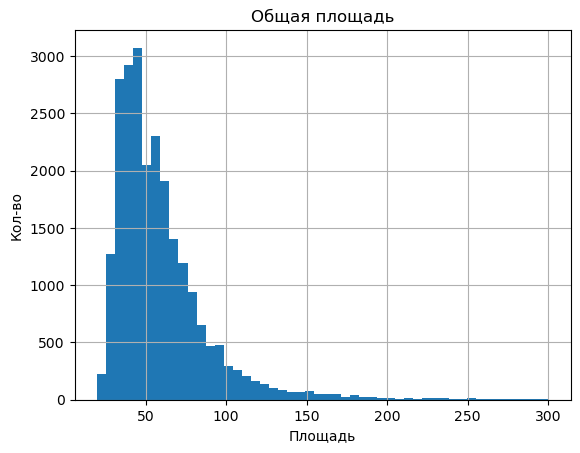

In [117]:
df_plot = df['total_area'].plot(kind='hist', bins=50, range=(20,300), title='Общая площадь', grid=True)
df_plot.set_xlabel('Площадь')
df_plot.set_ylabel('Кол-во')

Чаще всего продают квартиры площадю до 100квм. 

Гистограмма показала, что квартиры, площадь которых более 100квм и приближается к 200 кв.м, менее распространены в объявлениях.

Больше всего квартир с площадью 25-48 квм. и всплеск в районе 60 квм., но их меньше чем квартир с площадью 48 кв.м.

Разделим квартиры на категории: маленькие, большие, средние и т.д.

Воспользуемся методом `.qcut()` и разделим выборку на пять равных частей:

Предположим, что:

- маленькая квартира— вероятнее всего включит в себя все квартиры студии и прочие малые квартиры,
- меньше средней — квартиры с 1-2 комнатами, тоже малого размера,
- средняя — квартирамы от 2 до 3 комнат;
- большая — квартиры выше средних и до элитных;
- элитные — квартиры с сотнями квадратных метров, а также часть просто больших.

In [118]:
quantile_total_area = pd.qcut(df['total_area'], q = 5)
quantile_total_area.value_counts()

(37.6, 46.0]      4971
(11.999, 37.6]    4757
(74.92, 900.0]    4738
(58.0, 74.92]     4652
(46.0, 58.0]      4572
Name: total_area, dtype: int64

Таким образом получили следующие типы в таких диапозонах площади:

- маленькая квартира: 0 - 37.6 квм,
- меньше средней: 37.7 - 46.0 квм,
- средняя: 46.1 - 58.0 квм,
- большая: 58.1 - 74.92 квм;
- элитная: от 74.93 квм и выше.

Создадим для анализа площади отдельную таблицу и будем с ней работать.

In [119]:
df_total_area_category = df.copy()

Добавим столбец category в таблицу df_total_area_category метками категорий в зависимости от определенных нами диапазонов.

In [120]:
def category_type(row):       
     
    if row['total_area'] <= 37.6:            
        return 'маленькая квартира'  
    if row['total_area'] <= 46 and row['total_area'] > 37.6:  
        return 'меньше средней'
    if row['total_area'] <= 58 and row['total_area'] > 46:
        return 'средняя'
    if row['total_area'] <= 74.92 and row['total_area'] > 58:
        return 'большая'
    if row['total_area'] > 74.92:
        return 'элитная'
    else:                                
        return 'Нет данных'              
    
df_total_area_category['category'] = df_total_area_category.apply(category_type, axis=1)

<a id = 'top_min_max'></a>

Обьявим универсальный метод `top_min_max`, который позволит просмативать топ-10 минимальный и максимальных значений по анализируемому столбцу.

In [121]:
# метод для просмотра топ-10 минимальных и максимальных значений
def top_min_max(new_df, column, number_top):
    try:
        print('Топ максимум:', column)
        print(new_df.sort_values(column, ascending = False)[column].head(number_top))
        print()
        print('Топ минимум:', column)
        print(new_df.sort_values(column)[column].head(number_top))
    except:
        return 'Не верно введен аргумент'   


In [122]:
top_min_max(df_total_area_category, 'total_area', 10)

Топ максимум: total_area
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

Топ минимум: total_area
19904    12.0
17961    13.0
19546    13.0
19807    13.0
19558    13.2
19642    14.0
16949    15.0
12040    15.0
8886     15.5
9412     16.0
Name: total_area, dtype: float64


В Топ-10 отражаются:
самая маленькая площадь - всего 12м², а максимальная площадь - 900м², которая значительно превышают медианное  и среднее значение по общим данным (52.0 и 60.34 квм соответсвенно). 

Определим процентное отношение категорий в общих данных.

<a id = 'percent_category'></a>

Для этого обьявим универсальный метод `percent_category`, который создаст сводную таблицу и позволит найти процент каждой категории в общей выборке.

In [123]:
# метод создаст сводную таблицу, отсортирует и определит процент каждой категорий в выборке
def percent_category(new_df, index, column):
    try:
        sort_df = (
            new_df.pivot_table(index=index, values=column, aggfunc='count')
            .sort_values(by=column, ascending = False)
        )
        sort_df['percent'] = (sort_df[column] / sort_df[column].sum()) * 100  
        sort_df.columns = ['Количество в ' + column, 'Процент от общего']
        return sort_df
    except:
        return 'Не верно введен аргумент'

In [124]:
percent_category(df_total_area_category, 'category', 'total_area')

,Количество в total_area,Процент от общего
category,,
меньше средней,4971,20.983537
маленькая квартира,4757,20.080203
элитная,4738,20.000000
большая,4652,19.636978
средняя,4572,19.299282


Из таблицы видно, что доля квартир распределилась примерно одинаково, чуть больше квартиры площадью от 37.6 до 46.0 кв.м.

<a id = 'category_rooms'></a>

Посмотрим на распреление категорий по количеству комнат.

Для построения графика пропишем универсальный метод `category_rooms`.

In [125]:
# метод для постоения графика 
def category_rooms(new_df, columns, kind):
    try:        
        # создаем датафрейм по группировке
        counts = new_df.groupby('rooms')[columns].value_counts().to_frame() 
        # меняем название столбца и убираем индекс
        counts = counts.rename(columns={columns: 'count'}).reset_index() 
        # создаем сводную таблицу - разворачиваем данные        
        new_df_rooms = pd.pivot_table(counts, values='count', index='rooms', columns=columns) 
        # строим график
        new_df_rooms.plot(kind=kind, grid=True, figsize=(15, 5), legend=True, 
                          title='Распределение категорий по количеству комнат') 
        plt.ylabel('Количество значений в данных')
        plt.xlabel('Комнаты')
    except:
        return 'Проверьте параметры'

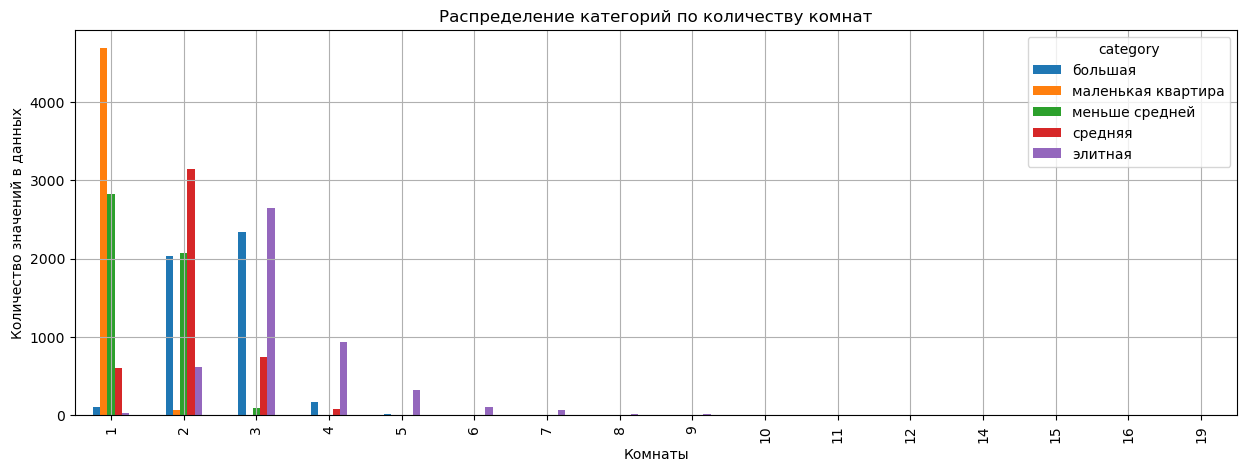

In [126]:
category_rooms(df_total_area_category, 'category', 'bar')

По графику видно, что в однокомнатных квартирах больше всего квартир малой площади, до 37.6 квм, среди двухкомнатных более всего средней площади, до 58.0 квм. Трехкомнатные и более - лидируют по количеству объявлений элитное жилье от 74,92 квм.

Для определения выбросов воспользуюсь методом .boxplot() с помощью которого построю диаграмму размаха.

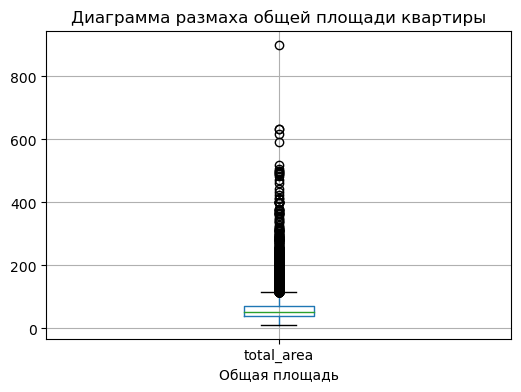

In [127]:
df_total_area_category.boxplot(column='total_area', figsize=(6, 4))
plt.title('Диаграмма размаха общей площади квартиры')
plt.xlabel('Общая площадь')
plt.show() 

Таким образом определили допустимые диапазоны (от 12 до 115 квм), которые мы сможем использовать в дальнейшей работе.
Исключим выбросы.

Проверим это диапазон не вообщем по признаку, а по категориям в отдельности. 

Определим все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории.

Необходимо задать ограничение в 116 м² и построить диаграмму размаха ещё раз, чтобы отсечь все выбросы и определить верхнюю границу отсечения данных.

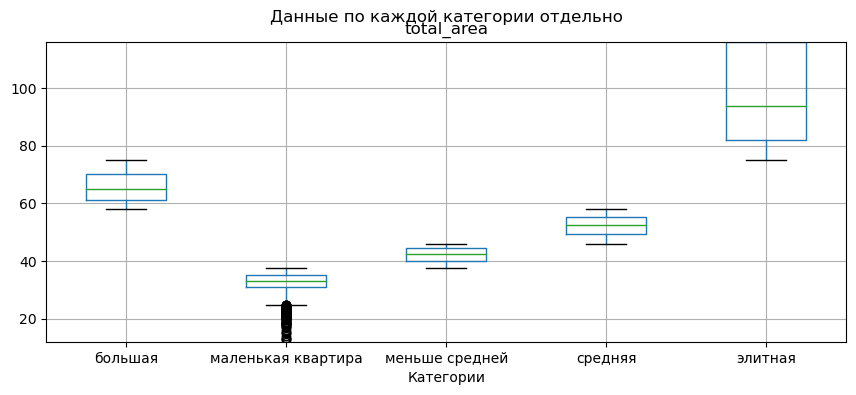

In [128]:
df_total_area_category.boxplot(by='category', column =['total_area'], grid=True, figsize=(10, 4))
plt.ylim(12, 116)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон требует корректировки.

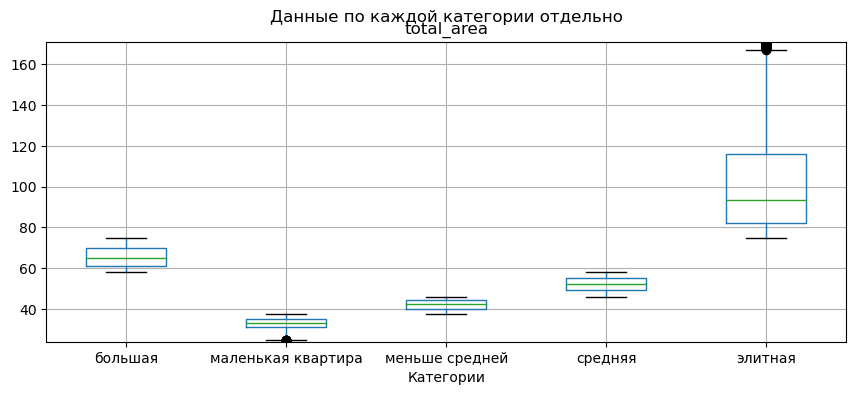

In [129]:
df_total_area_category.boxplot(by='category', column =['total_area'], grid=True, figsize=(10, 4))
plt.ylim(24, 171)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Очевидно, что диапазон больше, чем ранее предполагалось  - от 25 до 170квм.

<a id = 'living_area'></a>

***- living_area***

По тому же принципу изучим данные по жилой площади.

In [130]:
mean_median_min_max(df, 'living_area')

Среднее значение для столбца: living_area 34.32
Медианное значение для столбца: living_area 30.0
Минимальное значение для столбца: living_area 2.98
Максимальное значение для столбца: living_area 409.7


В данных по жилой площади наблюдаем диапазон  от 2.98 до 409.7 квм

Посмотрим подробнее на параметры площади в представлении гистограммы. 

Text(0, 0.5, 'Кол-во')

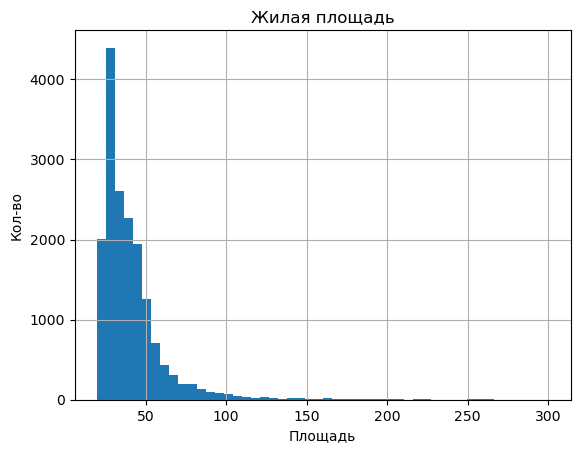

In [131]:
df_plot = df['living_area'].plot(kind='hist', bins=50, range=(20,300), title='Жилая площадь', grid=True)
df_plot.set_xlabel('Площадь')
df_plot.set_ylabel('Кол-во')

В диапазоне от 0 до 60 квм находятся основная масса значения жилой площади. Чаще все  встречаются обьекты жилой площадью 25-30 квм.

 Выделим квартиры малой жилой площади, меньше средней, средней, большой и очень большой (элитной).
 
 Воспользуемся методом `.qcut()` и разделим выборку на пять равных частей:

- маленькая площадь,
- меньше средней,
- средняя,
- большая,
- элитные.

In [132]:
quantile_living_area = pd.qcut(df['living_area'], q = 5)
quantile_living_area.value_counts()

(2.974, 18.0]    5294
(27.3, 33.0]     4743
(44.8, 409.7]    4729
(33.0, 44.8]     4700
(18.0, 27.3]     4224
Name: living_area, dtype: int64

Пройдемся по результатам.Ддля каждой категории вывели соответствуют значения жилой площади:

- маленькая площадь: 0 - 18 квм,
- меньше средней: 18.1 - 27.3 квм,
- средняя: 27.4 - 33.0 квм,
- большая: 33.1 - 44.8 квм,
- элитная: 44.9 кв.м и выше.

Создадим новую таблицу, которую будем дополнять необходимыми данными и работать с ней.

Добавим столбец category в таблицу df_living_area_category метками категорий в зависимости от определенных нами диапазонов.

In [133]:
df_living_area_category = df.copy()

In [134]:
def category_type_living_area(row):       
      
    if row['living_area'] <= 18:            
        return 'маленькая площадь'  
    if row['living_area'] <= 27.3 and row['living_area'] > 18:  
        return 'меньше средней'
    if row['living_area'] <= 33 and row['living_area'] > 27.3:
        return 'средняя'
    if row['living_area'] <= 44.8 and row['living_area'] > 33:
        return 'большая'
    if row['living_area'] > 44.8:
        return 'элитная'
    else:                                
        return 'Нет данных'              
    
df_living_area_category['category'] = df_living_area_category.apply(category_type_living_area, axis=1)

Вызовем универсальный метод `top_min_max`

In [135]:
top_min_max(df_living_area_category, 'living_area', 10)

Топ максимум: living_area
19540    409.70
5358     409.00
12401    347.50
4237     332.00
3117     331.38
12859    322.30
660      312.50
8018     301.50
14088    300.00
20273    279.60
Name: living_area, dtype: float64

Топ минимум: living_area
19904    2.975
19546    3.975
19807    3.975
17961    3.975
19558    4.175
7755     5.720
16949    5.975
12040    5.975
1407     6.400
8886     6.475
Name: living_area, dtype: float64


В Топ-10 попали довольно большие жилые площади (409.7квм) и очень маленькие (2.975 квм) как для жилой.

Определим долю категорий в общих данных.

Вызовем универсальный метод `percent_category`

In [136]:
percent_category(df_living_area_category, 'category', 'living_area')

,Количество в living_area,Процент от общего
category,,
маленькая площадь,5294,22.346982
средняя,4743,20.021106
элитная,4729,19.962009
большая,4700,19.839595
меньше средней,4224,17.830308


Доля каждой категории жилой площади примерно одинакова, но все же в квартир с маленькой жилой площадью 0 - 18 квм чуть больше, чем других категорий.

Рассмотрим распределение категорий по количеству комнат.

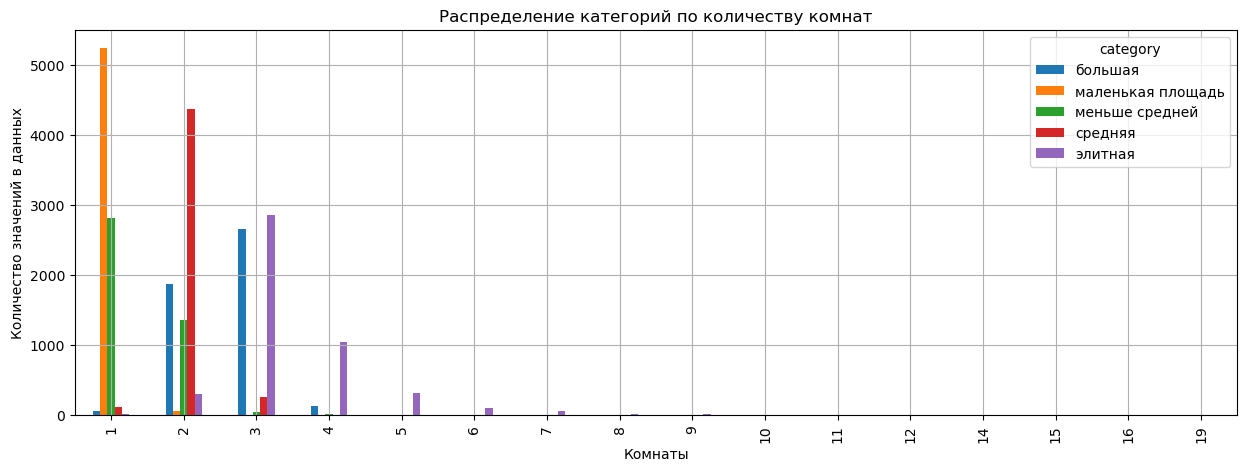

In [137]:
category_rooms(df_living_area_category, 'category', 'bar')

Среди однокомнатных квартир преобладают квартиры категории маленькая жилая площадь, в два раза меньше предложений из категории меньше средней. Среди 2-х комнатных лидирует по количеству предложений категория средняя. Трехкомнатные квартиры предлагают как большие жилые площади, так и элитные. Четырехкомнатных квартир и более, стабильно преобладают элитные.

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.

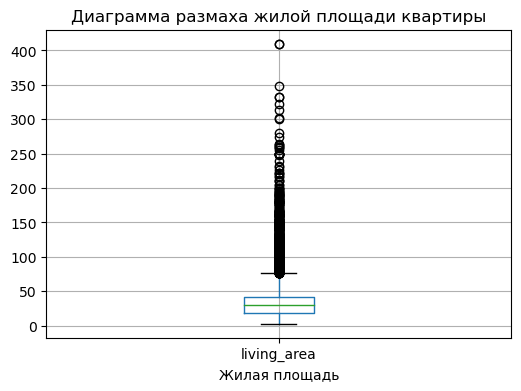

In [138]:
df_living_area_category.boxplot(column='living_area', figsize=(6, 4))
plt.title('Диаграмма размаха жилой площади квартиры')
plt.xlabel('Жилая площадь')
plt.show() 

Таким образом определили допустимые диапазоны (от 12 до 80 квм), которые мы сможем использовать в дальнейшей работе. Исключим выбросы.

Проверим это диапазон не вообщем по признаку, а по категориям в отдельности.

Определим все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории.

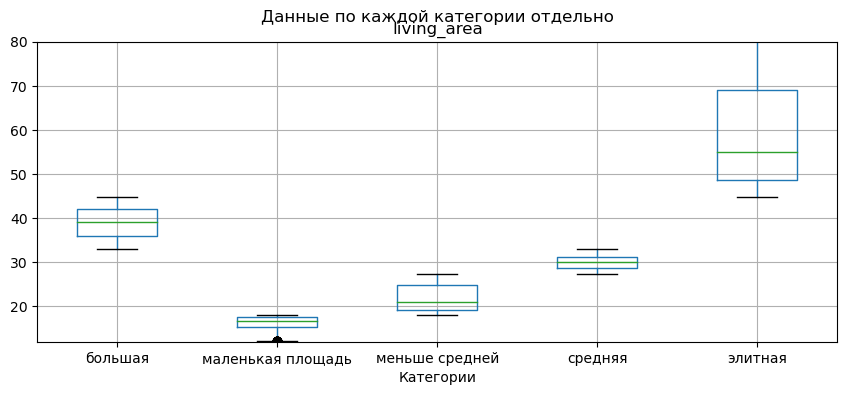

In [139]:
df_living_area_category.boxplot(by='category', column =['living_area'], grid=True, figsize=(10, 4))
plt.ylim(12, 80)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон требует корректировки.

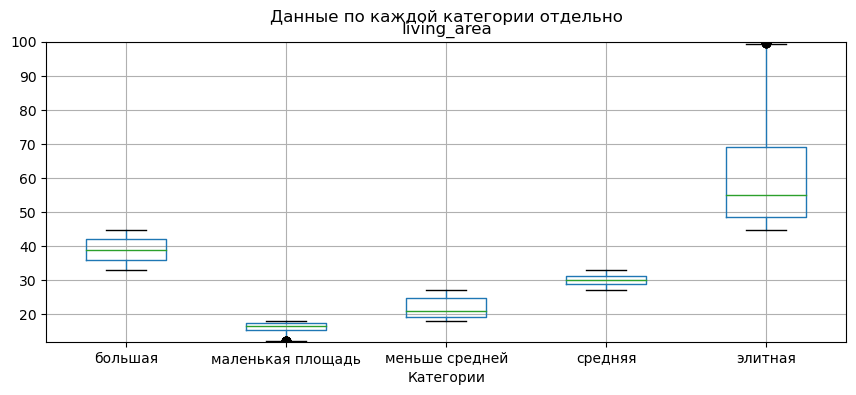

In [140]:
df_living_area_category.boxplot(by='category', column =['living_area'], grid=True, figsize=(10, 4))
plt.ylim(12, 100)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон  от 12 до 100квм.

<a id = 'kitchen_area'></a>

***- kitchen_area***

Рассмотрим площадь кухни и определим диапозон нормальных значений.

In [141]:
mean_median_min_max(df, 'kitchen_area')

Среднее значение для столбца: kitchen_area 10.45
Медианное значение для столбца: kitchen_area 9.02
Минимальное значение для столбца: kitchen_area 1.3
Максимальное значение для столбца: kitchen_area 112.0


В данных по кухонной площади наблюдаем диапазон от 1.3 до 112.0 квм

Посмотрим подробнее на параметры площади в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

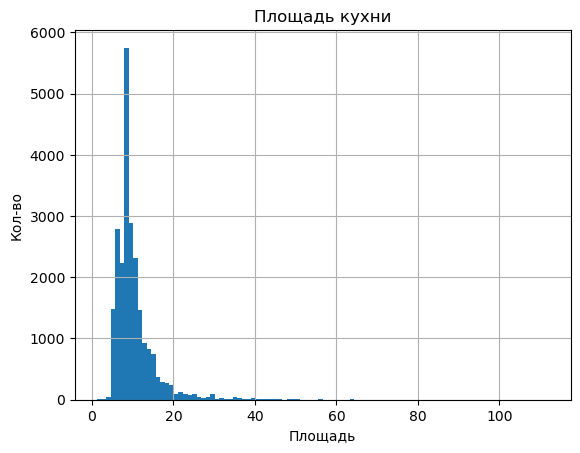

In [142]:
df_plot = df['kitchen_area'].plot(kind='hist', bins=100, title='Площадь кухни', grid=True)
df_plot.set_xlabel('Площадь')
df_plot.set_ylabel('Кол-во')

В диапазоне от 5 до 20 квм находятся основная масса значения кухонной площади. Чаще все встречаются обьекты с площадью кухни 10 квм.

Выделим кухни малой площади, меньше средней, средней, большой и очень большой (элитной).

Воспользуемся методом .qcut() и разделим выборку на пять равных частей:

- маленькая площадь,
- меньше средней,
- средняя,
- большая,
- элитные.

In [143]:
quantile_kitchen_area = pd.qcut(df['kitchen_area'], q = 5)
quantile_kitchen_area.value_counts()

(1.2990000000000002, 7.0]    5484
(8.8, 10.0]                  4963
(12.3, 112.0]                4714
(7.0, 8.8]                   4615
(10.0, 12.3]                 3914
Name: kitchen_area, dtype: int64

Пройдемся по результатам.Ддля каждой категории вывели соответствуют значения площади кухни:

- маленькая площадь: 0 - 7 квм,
- меньше средней: 7.1 - 8.8 квм,
- средняя: 8.9 - 10.0 квм,
- большая: 10.1 - 12.3 квм,
- элитная: 12.4 квм и больше.
    
Создадим новую таблицу, которую будем дополнять необходимыми данными и работать с ней.

Добавим столбец category в таблицу df_kitchen_area_category метками категорий в зависимости от определенных нами диапазонов.

In [144]:
df_kitchen_area_category = df.copy()

In [145]:
def category_type_kitchen_area(row):       
      
    if row['kitchen_area'] <= 7:            
        return 'маленькая площадь'  
    if row['kitchen_area'] <= 8.8 and row['kitchen_area'] > 7:  
        return 'меньше средней'
    if row['kitchen_area'] <= 10 and row['kitchen_area'] > 8.8:
        return 'средняя'
    if row['kitchen_area'] <= 12.3 and row['kitchen_area'] > 10:
        return 'большая'
    if row['kitchen_area'] > 12.3:
        return 'элитная'
    else:                                
        return 'Нет данных'              
    
df_kitchen_area_category['category'] = df_kitchen_area_category.apply(category_type_living_area, axis=1)

Вызовем универсальный метод `top_min_max`

In [146]:
top_min_max(df_kitchen_area_category, 'kitchen_area', 5)

Топ максимум: kitchen_area
19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
Name: kitchen_area, dtype: float64

Топ минимум: kitchen_area
20217    1.3
906      2.0
21419    2.0
16367    2.0
6262     2.0
Name: kitchen_area, dtype: float64


В Топ-5 попали довольно большие жилые площади (112.0квм) и очень маленькие (1.3 квм) как для площади кухни.

Определим долю категорий в общих данных.

Вызовем универсальный метод percent_category

In [147]:
percent_category(df_kitchen_area_category, 'category', 'kitchen_area')

,Количество в kitchen_area,Процент от общего
category,,
маленькая площадь,5294,22.346982
средняя,4743,20.021106
элитная,4729,19.962009
большая,4700,19.839595
меньше средней,4224,17.830308


Доля каждой категории площади кухни  примерно одинакова, но все же в квартир с маленькой площадью кухни 0 - 7 квм больше (22.35%), чем других категорий. Меньше всего доля кухонь из категории меньше средней с площадью до 7.1 - 8.8 квм (17.83%).

Рассмотрим распределение категорий по количеству комнат.

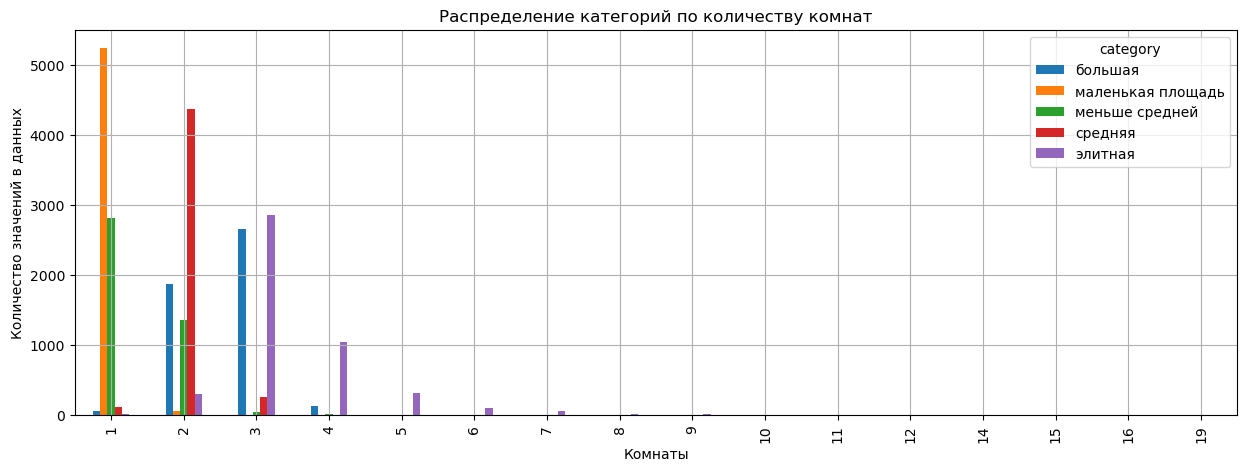

In [148]:
category_rooms(df_kitchen_area_category, 'category', 'bar')

Среди однокомнатных квартир значительно преобладают кухни категории маленькая площадь, в два раза меньше предложений из категории площадь кухни меньше средней. Среди 2-х комнатных лидирует по количеству предложений категория средняя площадь кухни, в два раза реже встречаются меньше средней и большая площадь кухни. Трехкомнатные квартиры предлагают как большие, так и элитные площади кухни. Четырехкомнатных квартир и более, стабильно преобладают элитные площади кухни.

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.

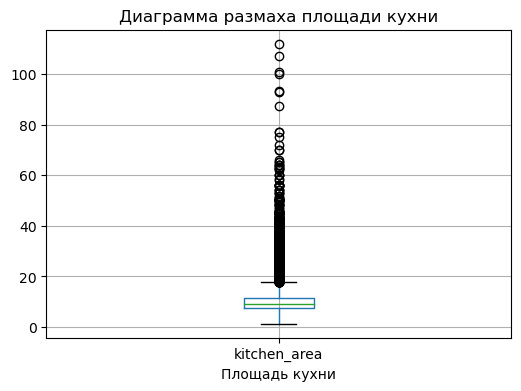

In [149]:
df_kitchen_area_category.boxplot(column='kitchen_area', figsize=(6, 4))
plt.title('Диаграмма размаха площади кухни')
plt.xlabel('Площадь кухни')
plt.show()

Определим допустимые диапазоны (от 1.3 до 18 квм), которые мы сможем использовать в дальнейшей работе. Исключим выбросы.

Проверим это диапазон не вообщем по признаку, а по категориям в отдельности.

Определим все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории.

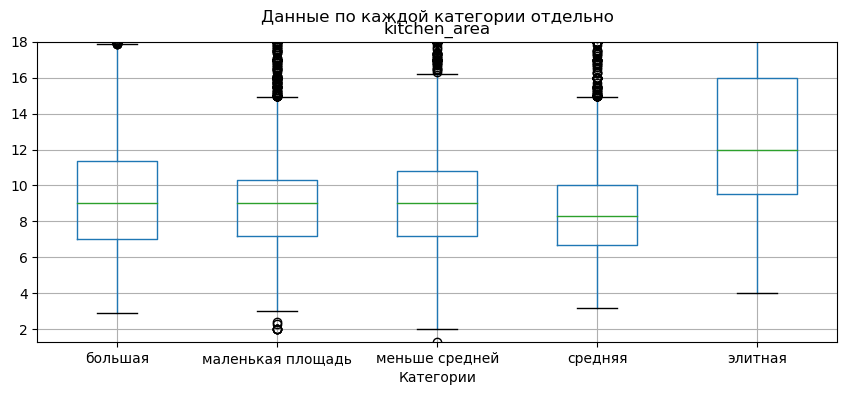

In [150]:
df_kitchen_area_category.boxplot(by='category', column =['kitchen_area'], grid=True, figsize=(10, 4))
plt.ylim(1.3, 18)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон требует корректировки.

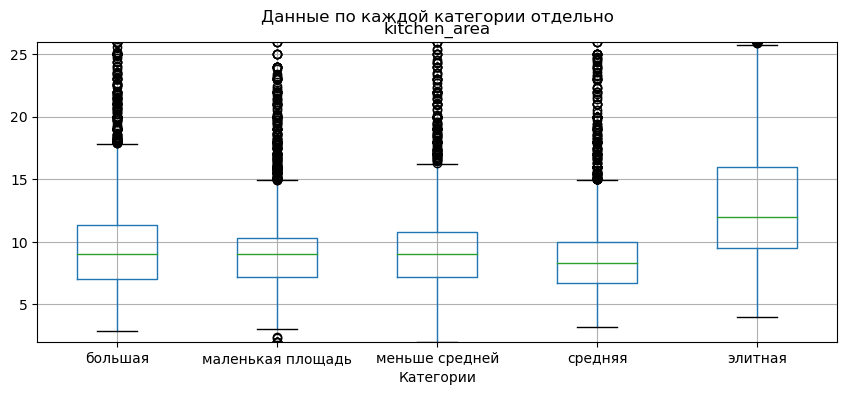

In [151]:
df_kitchen_area_category.boxplot(by='category', column =['kitchen_area'], grid=True, figsize=(10, 4))
plt.ylim(2, 26)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон от 2 до 26 квм. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории.

***Вывод по трем параметрам площади квартиры***

В разрезе трех параметров, рассмотренных нами (общей площади, жилой площади и площади кухни), можно выделить следующие выявленные основные параметры этих характеристик:

В однокомнатных квартирах преобладают:

- в общей площади — категория квартир маленького размера до 37.6 квм,
- в жилой площади — категория маленьких жилых площадей до 18 квм,
- в площади кухонь — категория маленьких кухонь до 7 квм.

В двухкомнатных квартирах преобладают:

- в общей площади — категория квартир среднего размера от 46.1 до 58.0 квм,
- в жилой площади — категория средних жилых площадей от 27.4 до 33.0 квм,
- в площади кухонь — категория средних кухонь от 8.9 до 10 квм.

В трехкомнатных квартирах преобладают:

- в общей площади — категория квартир элитного большого размера от 74.9 квм и больше,
- в жилой площади — категория больших жилых площадей от 58.1 до 74.9 квм,
- в площади кухонь — категория элитно больших кухонь от 12.0 кв.м и больше.

В четырехкномнатных и далее квартирах преобладают:
- в общей площади — категория квартир элитно большого размера от 74.9 квм и больше, 
- в жилой площади — категория элитно больших жилых площадей от 44.9 квм и больше,
- в площади кухонь — категория элитно больших кухонь от 12.4 квм и больше.


<a id = 'last_price'></a>

***- `last_price`***

Рассмотрим такой параметр как цена квартиры на момент снятия обьявления.

In [152]:
mean_median_min_max(df, 'last_price')

Среднее значение для столбца: last_price 6542.55
Медианное значение для столбца: last_price 4650.0
Минимальное значение для столбца: last_price 430.0
Максимальное значение для столбца: last_price 763000.0


В данных по цене объектов наблюдаем следующий диапазон сумм от 430 до 763000 тыс.

Посмотрим подробнее на параметры суммы продаж в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

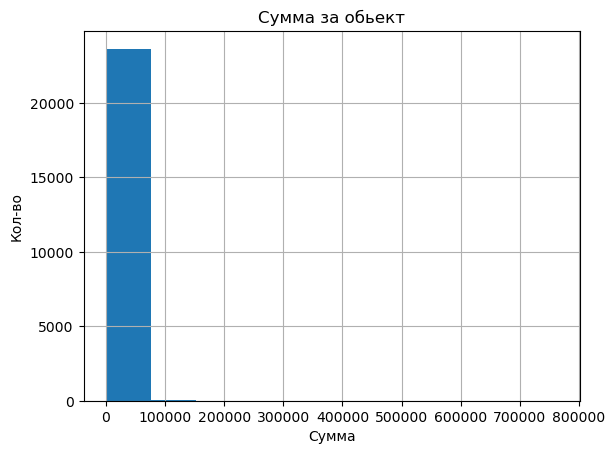

In [153]:
df_plot = df['last_price'].plot(kind='hist', bins=10, range=(430,763000), title='Сумма за обьект', grid=True)
df_plot.set_xlabel('Сумма')
df_plot.set_ylabel('Кол-во')

Судя по графику основной диапазон цен находятся в пределах 80 млн.

Цены на квартиры можно поделить на пять основных категорий:

- эконом-класс: квартиры с наименьшей ценой, с небольшими площадями, минимальной инфраструктурой,
- стандарт-класс: квартиры средней ценовой категории, с более комфортными условиями проживания, инфраструктурой и чуть большей площадью,
- комфорт-класс: более современные квартиры, с просторной площадью, с более высоким уровнем комфорта и удовлетворительным расположением,
- бизнес-класс: входят дорогие квартиры с большай площадю и хорошее инфраструктурой,
- элитный класс: часто находятся рядом с достопримечательностями, площадь большая, много доп подсобных помещений, доп инфраструктура комплекса. Имеют высокую стоимость.

Воспользуемся методом `.qcut()` и разделим выборку на пять равных частей согласно рекомендованной категоризации.

In [154]:
quantile_last_price = pd.qcut(df['last_price'], q = 5)
quantile_last_price.value_counts()

(429.999, 3190.0]     4753
(4109.24, 5295.0]     4740
(5295.0, 7590.0]      4738
(7590.0, 763000.0]    4736
(3190.0, 4109.24]     4723
Name: last_price, dtype: int64

Пройдемся по результатам.Для каждой категории вывели соответствующий уновой диапазон:

- эконом-класс: до 3190 тыс,
- стандарт-класс: от 3190.1 до 4109.25тыс,
- комфорт-класс: от 4109.26 до 5295.0 тыс,
- бизнес-класс: от 5295.1 до 7590 тыс,
- элитный класс: от 7590 тыс и выше.

Создадим новую таблицу, которую будем дополнять необходимыми данными и работать с ней.

Добавим столбец `category` в таблицу `df_last_price_category` метками категорий в зависимости от определенных нами диапазонов.

In [155]:
df_last_price_category = df.copy()

In [156]:
def category_type_last_price(row):       
      
    if row['last_price'] <= 3190:            
        return 'эконом-класс'  
    if row['last_price'] <= 4109.25 and row['last_price'] > 3190:  
        return 'стандарт-класс'
    if row['last_price'] <= 5295 and row['last_price'] > 4109.25:
        return 'комфорт-класс'
    if row['last_price'] <= 7590 and row['last_price'] > 5295:
        return 'бизнес-класс'
    if row['last_price'] > 7590:
        return 'элитный класс'
    else:                                
        return 'Нет данных'              
    
df_last_price_category['category'] = df_last_price_category.apply(category_type_last_price, axis=1)

Вызовем универсальный метод `top_min_max`

In [157]:
top_min_max(df_last_price_category, 'last_price', 10)

Топ максимум: last_price
12971    763000.0
19540    420000.0
14706    401300.0
1436     330000.0
15651    300000.0
22831    289238.4
16461    245000.0
13749    240000.0
5893     230000.0
8900     190870.0
Name: last_price, dtype: float64

Топ минимум: last_price
14911    430.0
17456    430.0
16274    440.0
17676    450.0
5698     450.0
16219    450.0
9581     450.0
18867    470.0
21912    470.0
23484    470.0
Name: last_price, dtype: float64


В Топ-10 попали довольно большие цены (763000 тыс) и очень маленькие (430 тыс).

Определим долю категорий в общих данных.

Вызовем универсальный метод percent_category

In [158]:
percent_category(df_last_price_category, 'category', 'last_price')

,Количество в last_price,Процент от общего
category,,
эконом-класс,4753,20.063318
комфорт-класс,4740,20.008442
бизнес-класс,4738,20.000000
элитный класс,4736,19.991558
стандарт-класс,4723,19.936682


Доля каждой категории стоимости обьектов недвижимости примерно одинакова, но все же в квартир эконом класса (до 3190 тыс) чуть больше, чем других категорий. Меньше всего доля обьектов стандарт-класса (от 3190.1 до 4109.25тыс).

Рассмотрим распределение категорий по количеству комнат.

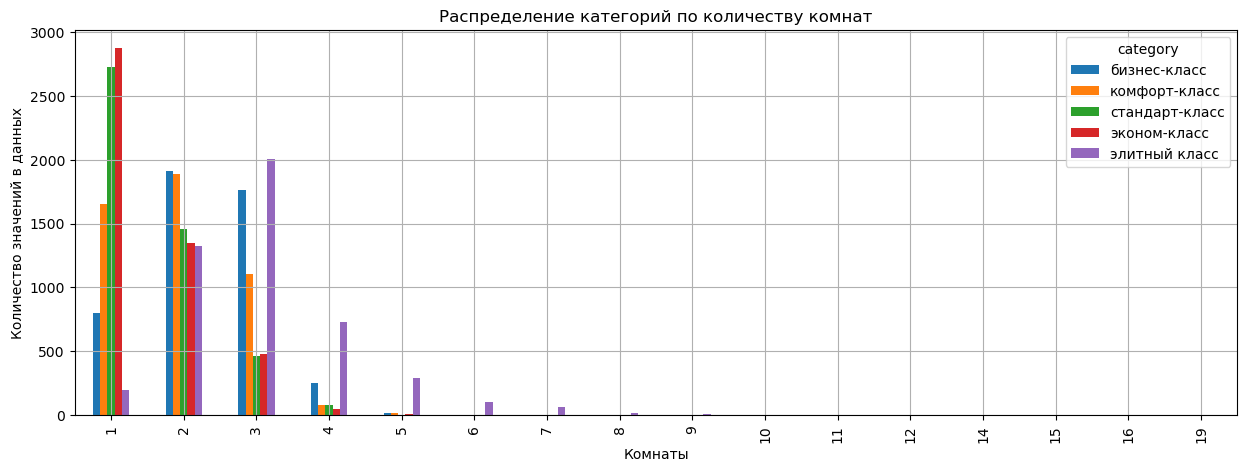

In [159]:
category_rooms(df_last_price_category, 'category', 'bar')

Среди однокомнатных квартир значительно преобладают квартиры эконом и стандар-класса, в два раза меньше предложений из категории комфорт-класса. Среди 2-х полное разнообразие категорий: преобладают бизнес и комфорт-классы, меньше, но практически одинаково по количеству стандарт, эконом и элит-классы. Трехкомнатные квартиры предлагают более всего элит-класса, чуть меньше бизнес-класса, в два раза меньше комфорт-класса. Четырехкомнатных квартир и более, стабильно преобладает элитный класс.

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.

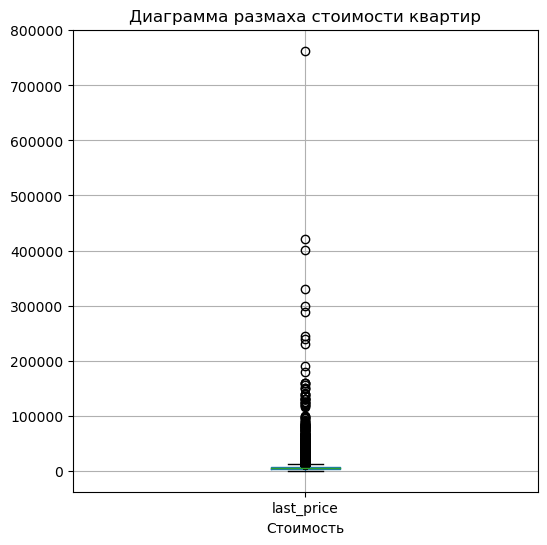

In [160]:
df_last_price_category.boxplot(column='last_price', figsize=(6, 6))
plt.title('Диаграмма размаха стоимости квартир')
plt.xlabel('Стоимость')
plt.show()

Определим допустимые диапазоны (от 300 до 10000 тыс), которые мы сможем использовать в дальнейшей работе. Исключим выбросы.

Проверим это диапазон не вообщем по признаку, а по категориям в отдельности.

Определим все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории.

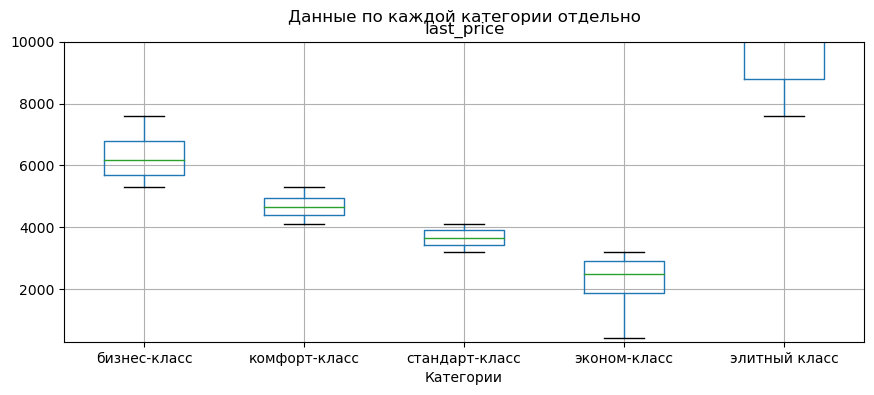

In [161]:
df_last_price_category.boxplot(by='category', column =['last_price'], grid=True, figsize=(10, 4))
plt.ylim(300, 10000)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон требует корректировки.

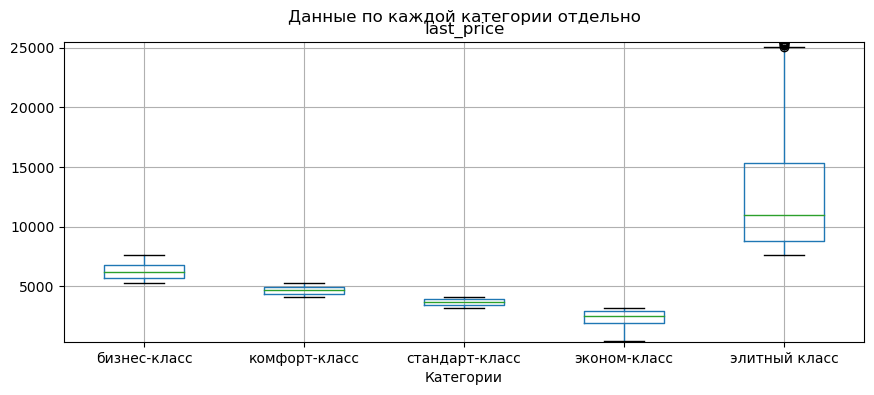

In [162]:
df_last_price_category.boxplot(by='category', column =['last_price'], grid=True, figsize=(10, 4))
plt.ylim(350, 25500)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон от 350 до 25500 тыс. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории.

<a id = 'rooms'></a>

***- `rooms`***

Для столбца `rooms` получим основные значения и рассмотрим их.

In [163]:
mean_median_min_max(df, 'rooms')

Среднее значение для столбца: rooms 2.08
Медианное значение для столбца: rooms 2.0
Минимальное значение для столбца: rooms 1
Максимальное значение для столбца: rooms 19


В данных по количеству комнат имеем: минимальное количество 1, максимальное 19 комнат, медианное значение 2 комнаты.

Посмотрим подробнее на параметры площади в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

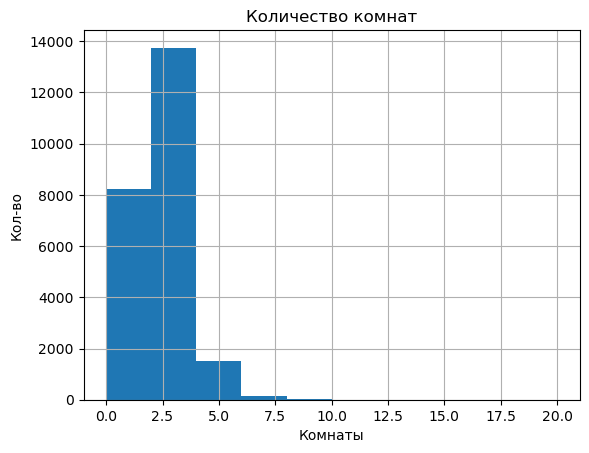

In [164]:
df_plot = df['rooms'].plot(kind='hist', bins=10, range=(0,20), title='Количество комнат', grid=True)
df_plot.set_xlabel('Комнаты')
df_plot.set_ylabel('Кол-во')

Судя по графику основное количество комнат в обьявлениях от 1 до 3.

Создадим новую таблицу, которую будем дополнять необходимыми данными и работать с ней.

In [165]:
df_rooms_category = df.copy()

Определим долю количества комнат - категорий в общем объеме продаваемых площадей.

Вызовем универсальный метод percent_category

In [166]:
df_rooms_category_percent = percent_category(df_rooms_category, 'rooms', 'total_area')
df_rooms_category_percent

,Количество в total_area,Процент от общего
rooms,,
1,8242,34.791051
2,7936,33.499367
3,5811,24.529337
4,1180,4.981005
5,326,1.376108
6,105,0.443225
7,59,0.249050
8,12,0.050654
9,8,0.033770


Доля каждой категории -количества квартир в общем объеме продаваемых обьектов недвижимости распределилась не одинаково. Однокомнатных квартир по площади и количеству продается больше, чем других квартир(34,79%), практически столько же продается двухкомнатных квартир (33,94%). На много меньше доля обьектов с 4 -6 комнатами. Квартиры от 7 комнатами представленны либо малым количеством квартир, либо и вовсе единичными экземплярами.

Рассмотрим распределение категорий- количество комнат по количеству предлагаемых обьектов каждого типа.

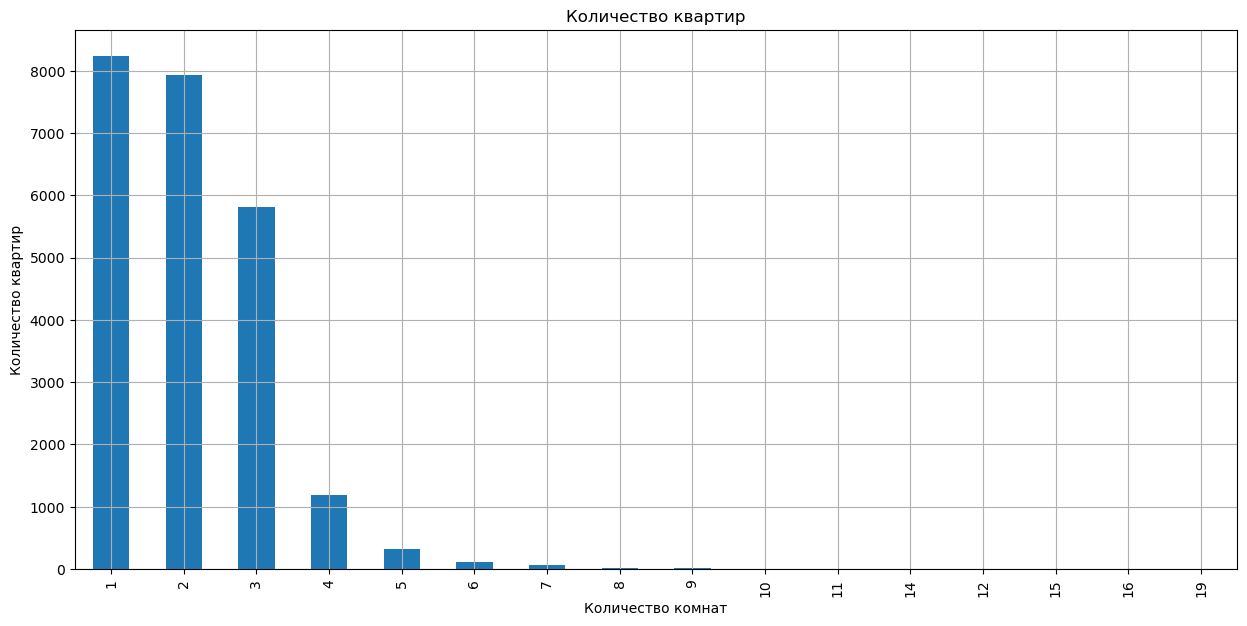

In [167]:
df_rooms_category_percent.plot(y='Количество в total_area', kind='bar', figsize=(15, 7), legend=False, grid=True, title='Количество квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

В данных больше всего квартир с комнатами от 1 до 4, всех остальных категорий, как указывалось ранее, намного меньше.

Посмотрим на допустимые диапазоны. Построим диаграмму для определение диапазонов и выбросов.

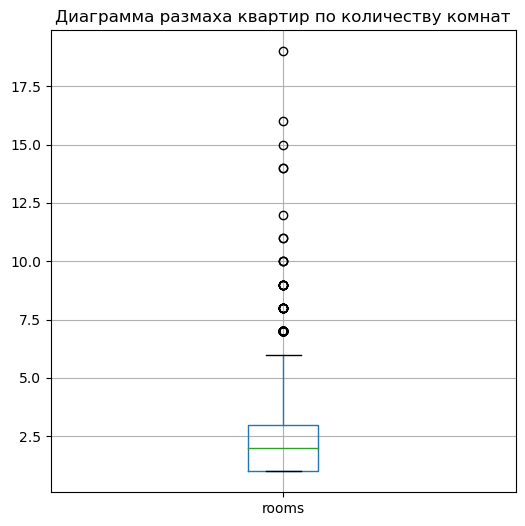

In [168]:
df_rooms_category.boxplot(column='rooms', figsize=(6, 6))
plt.title('Диаграмма размаха квартир по количеству комнат')
plt.show()

Определим допустимые диапазоны (от 1 до 6 комнат), которые мы сможем использовать в дальнейшей работе. Исключим выбросы.

<a id = 'ceiling_height'></a>

***- `ceiling_height`***

Получим основные значения, рассмотрим их.

In [169]:
mean_median_min_max(df, 'ceiling_height')

Среднее значение для столбца: ceiling_height 2.64
Медианное значение для столбца: ceiling_height 2.5
Минимальное значение для столбца: ceiling_height 2.2
Максимальное значение для столбца: ceiling_height 8.3


В данных по цене объектов наблюдаем следующий диапазон высоты потолка 2.2 до 8.3м.

Посмотрим подробнее на параметры высоты потолков в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

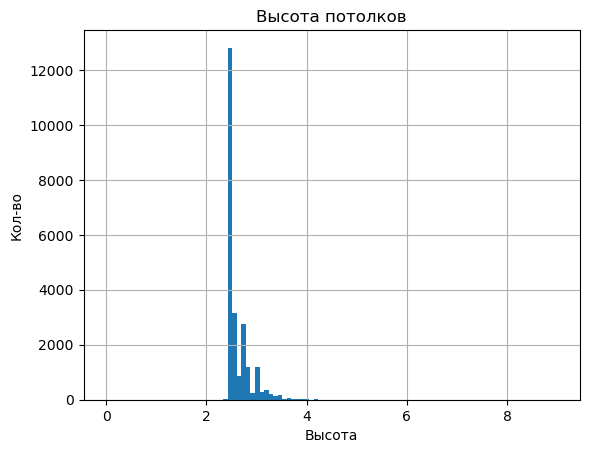

In [170]:
df_plot = df['ceiling_height'].plot(kind='hist', bins=100, range=(0,9), title='Высота потолков', grid=True)
df_plot.set_xlabel('Высота')
df_plot.set_ylabel('Кол-во')

Судя по графику максимальное количество предложенных квартир имеет высоту потолков 2.7м. Основное значение потолков находится между 2-3м.

!!!Высоту потолков можно поделить на пять категорий:

- низкие — потолки, которые находятся в жилье низкой ценовой категории,
- ниже среднего — относительно комфортная высота потолка, пробладает в квартирах нижней и средней ценовой категории,
- средние — является преобладающей в большинстве типов квартир,
- выше среднего — высокие потолки, в квартирах средней и выше средней ценовых категориях.
- высокие — присутствуют в дорогом жилье или элитных объектах недвижимости.

Воспользуемся методом `.qcut()` и разделим выборку на пять равных частей согласно рекомендованной категоризации.

`df['quantile_ceiling_height'] = pd.qcut(df['ceiling_height'], q = 5, duplicates='drop')`
`df['quantile_ceiling_height'].value_counts()`
`df['quantile_ceiling_height'] = pd.qcut(df['ceiling_height'], q = 5, duplicates='drop')`
`df['quantile_ceiling_height'].value_counts()`

(2.55, 2.7]                   13632

(2.1990000000000003, 2.55]     4817

(2.75, 8.3]                    4225

(2.7, 2.75]                    1016

Name: quantile_last_price, dtype: int64
​

Метод qcut() не смог вывести 5 категорий, вывел 4 и распределений в них не одинаковое. Воспользуемся другим методом `quantile()`.

`quantile([.20, .40, .60, .80])`
`df['quantile_ceiling_height'].quantile([.20, .40, .60, .80])`
 
Этот метод тоже не сработал.
Предположим, что виной всему замена пропусков на стандарт 2.7м.
Вернемся в раздел замены пропусков и попробуем установить другую стандартную высоту - 2.5v. Посмотрим что из этого получится.

Результат оказался тем же, чуть лучше распределение: 4 группы 

(2.1990000000000003, 2.5]    12802

(2.57, 2.75]                  5178

(2.75, 8.3]                   4225

(2.5, 2.57]                   1485

Разобьем на 3 категории:

In [171]:
quantile_ceiling_height = pd.qcut(df['ceiling_height'], q = 5, duplicates='drop')
quantile_ceiling_height.value_counts()

(2.1990000000000003, 2.5]    12802
(2.57, 2.75]                  5178
(2.75, 8.3]                   4225
(2.5, 2.57]                   1485
Name: ceiling_height, dtype: int64

Сделаем 3 категории, руководствуясь здравым смыслом. Для каждой категории вывели соответствующий диапазон высот:

- низкие — высота - 2.19 - 2.4м,
- средние — 2.4 - 2.7м,
- высокие - 2.7 - 8.3м.

Создадим новую таблицу, которую будем дополнять необходимыми данными и работать с ней.

Добавим столбец `category` в таблицу `df_ceiling_height_category` метками категорий в зависимости от определенных нами диапазонов.


In [172]:
df_ceiling_height_category = df.copy()

def category_type_ceiling_height(row):       
     
    if row['ceiling_height'] <= 2.4:            
        return 'низкие'    
    if row['ceiling_height'] <= 2.7 and row['ceiling_height'] > 2.4:
        return 'средние'
    if  row['ceiling_height'] > 2.7:
        return 'высокие'    
    else:                                
        return 'Нет данных'              
    
df_ceiling_height_category['category'] = df_ceiling_height_category.apply(category_type_ceiling_height, axis=1)

Вызовем универсальный метод `top_min_max`

In [173]:
top_min_max(df_ceiling_height_category, 'ceiling_height', 3)

Топ максимум: ceiling_height
5863     8.3
3474     8.0
15743    8.0
Name: ceiling_height, dtype: float64

Топ минимум: ceiling_height
12755    2.20
17794    2.25
5498     2.30
Name: ceiling_height, dtype: float64


В Топ-3 попали довольно большая высота (8.3м) и очень маленькая (2.2м).

Определим долю категорий в общих данных.

Вызовем универсальный метод percent_category

In [174]:
percent_category(df_ceiling_height_category, 'category', 'ceiling_height')

,Количество в ceiling_height,Процент от общего
category,,
средние,18419,77.750106
высокие,5241,22.123259
низкие,30,0.126636


Вырисовывается довольно понятная картина:

- доля каждой категории высоты потолков обьектов недвижимости распределена не одинаково, 
- квартиры с низким потолком 2.19 - 2.4м предлагают меньше всего (0,13%), 
- квартиры с высоки потолками составляют 22 12% от всей выборки,
- максимально на рынке предложений квартир с средней высотой потолка от 2,4-2,7м - 77,75% 

Рассмотрим распределение категорий высоты потолка по количеству комнат.

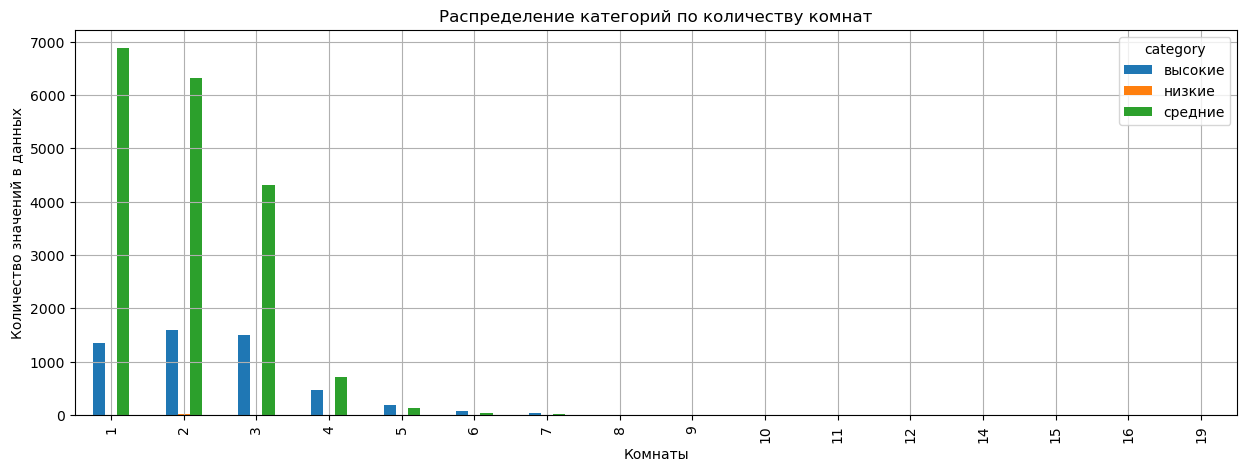

In [175]:
category_rooms(df_ceiling_height_category, 'category', 'bar')

Среди квартир на одну - 4 комнаты преобладают квартиры с средней высотой потолка, 

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.

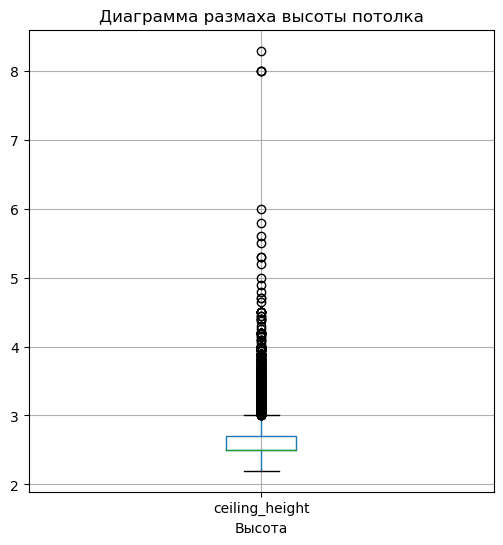

In [176]:
df_ceiling_height_category.boxplot(column='ceiling_height', figsize=(6, 6))
plt.title('Диаграмма размаха высоты потолка')
plt.xlabel('Высота')
plt.show()

Определим допустимые диапазоны (от 2.19 до 3м), которые мы сможем использовать в дальнейшей работе. Исключим выбросы.

Проверим это диапазон не вообщем по признаку, а по категориям в отдельности.

Определим все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории.

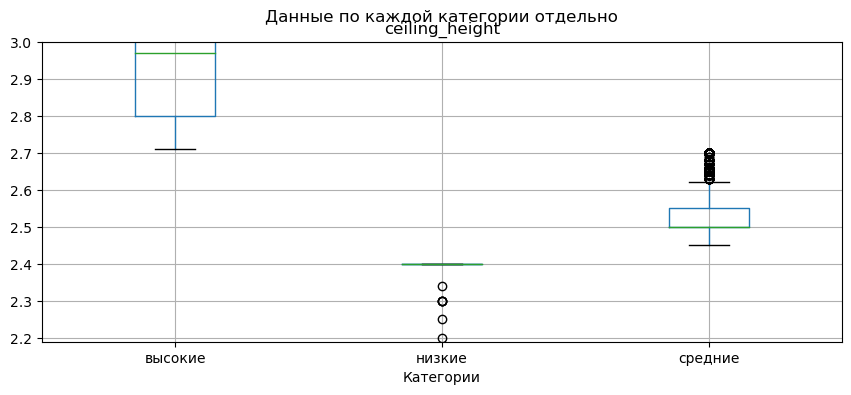

In [177]:
df_ceiling_height_category.boxplot(by='category', column =['ceiling_height'], grid=True, figsize=(10, 4))
plt.ylim(2.19, 3)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон требует корректировки.

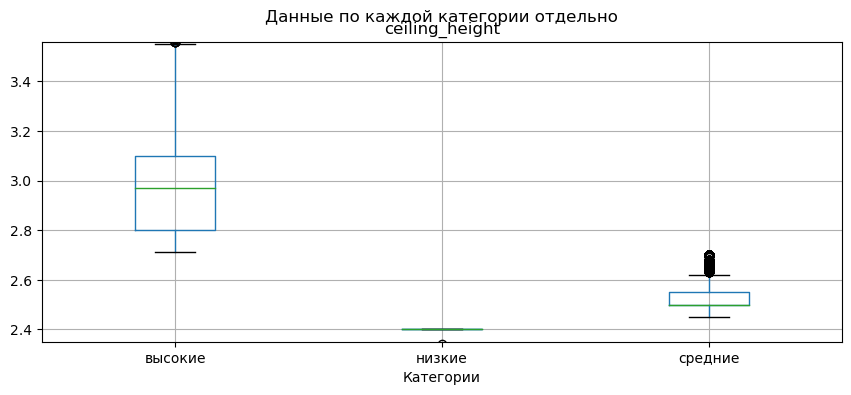

In [178]:
df_ceiling_height_category.boxplot(by='category', column =['ceiling_height'], grid=True, figsize=(10, 4))
plt.ylim(2.35, 3.56)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон от 2.35 до 3.56м. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории.

<a id = 'floor'></a>

***- `floor`***

***- `floor_type`***

Рассмотрим два признака этаж квартиры и тип этажа.

Получим основные значения по этим признакам, рассмотрим их.

In [179]:
mean_median_min_max(df, 'floor')

Среднее значение для столбца: floor 5.89
Медианное значение для столбца: floor 4.0
Минимальное значение для столбца: floor 1
Максимальное значение для столбца: floor 33


В данных по этажу квартиры наблюдаем следующий диапазон этажей  от 1 до 33 этажа.

Посмотрим подробнее на параметр этажа квартиры в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

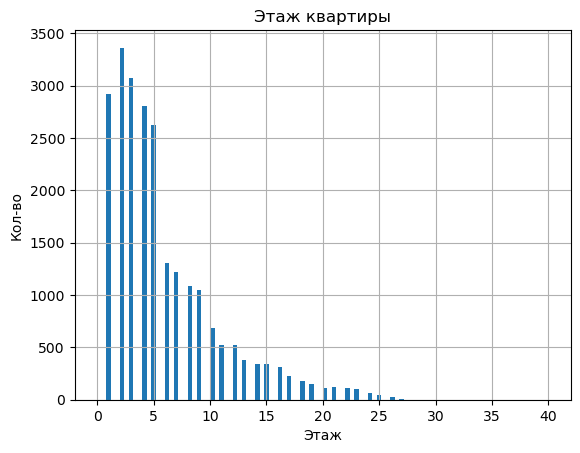

In [180]:
df_plot = df['floor'].plot(kind='hist', bins=100, range=(0,40), title='Этаж квартиры', grid=True)
df_plot.set_xlabel('Этаж')
df_plot.set_ylabel('Кол-во')

Этажи с 1 по 5 преобладают (максимальное количество предложений по 2 этажу), в два раза меньше предлагают квартиры с 6 по 10 этаж. Чем выше этаж , тем меньше предложений.

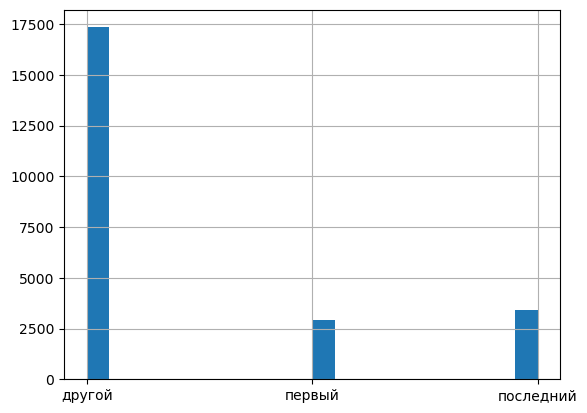

In [181]:
df['floor_type'].hist(bins=20);

Гистограмма показала, что больше всего предложений по квартирам в категории "другой", практически одинаково мало предлагают квартиры на 1 и последнем этаже.

In [182]:
df_floor_category = df.copy() # копия датафрейма

Определим долю категорий в общих данных.

Вызовем универсальный метод percent_category

In [183]:
percent_category(df_floor_category, 'floor_type', 'floor')

,Количество в floor,Процент от общего
floor_type,,
другой,17349,73.233432
последний,3424,14.453356
первый,2917,12.313212


Данные подтверждаю сделанные ранее выводы:

- доля каждой категории распределена не одинаково,
- квартиры на первом этаже предлагают реже (12.31%),
- квартиры на последнем этаже немного чаще (14.45%),
- максимально на рынке представлены квартир в категории "другие"  - 73.23%
 
Рассмотрим распределение категорий этаж по количеству комнат в квартире.

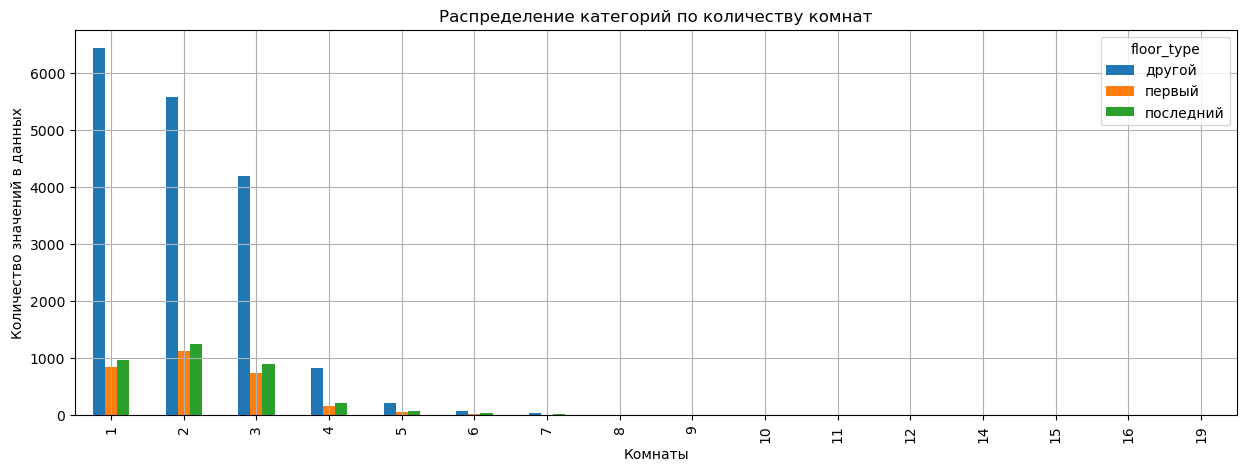

In [184]:
category_rooms(df_floor_category, 'floor_type', 'bar')

Столбчатая диаграмма подверждает, что 1-5 комнатные квартиры представлены на рынке в основном в категории этаж "другие".

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.

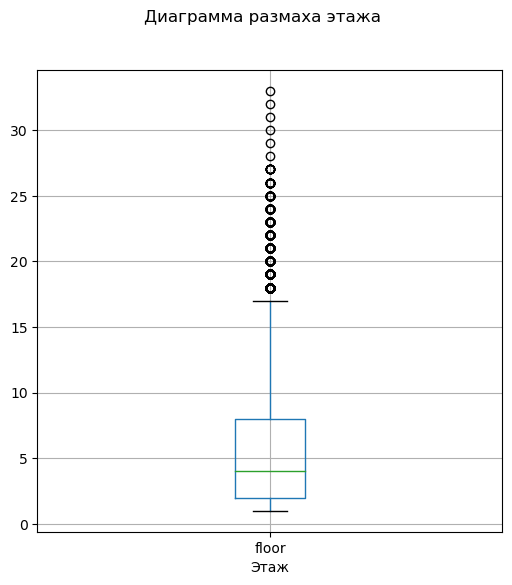

In [185]:
df_ceiling_height_category.boxplot(column='floor', figsize=(6, 6))
plt.suptitle('Диаграмма размаха этажа')
plt.xlabel('Этаж')
plt.show()

Определим допустимые диапазоны (от 1 по 17 этаж), которые мы сможем использовать в дальнейшей работе. Исключать или не исключать выбросы разберемся позже.

Проверим это диапазон не вообщем по признаку, а по категориям в отдельности.

Определим все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории.

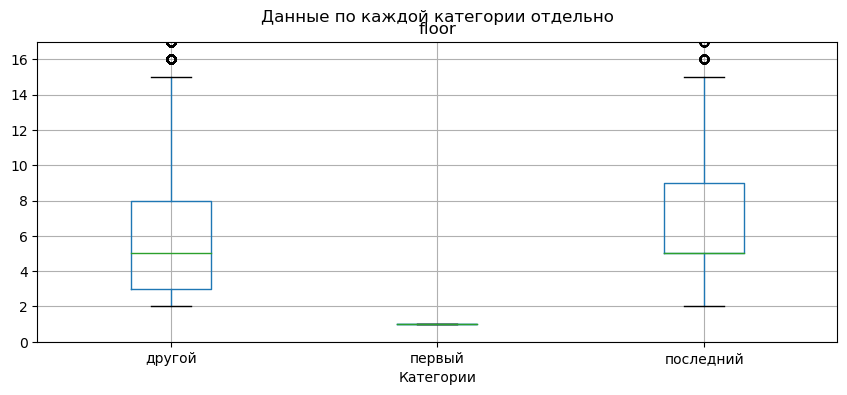

In [186]:
df_ceiling_height_category.boxplot(by='floor_type', column =['floor'], grid=True, figsize=(10, 4))
plt.ylim(0, 17)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Подкорректируем диапазон.

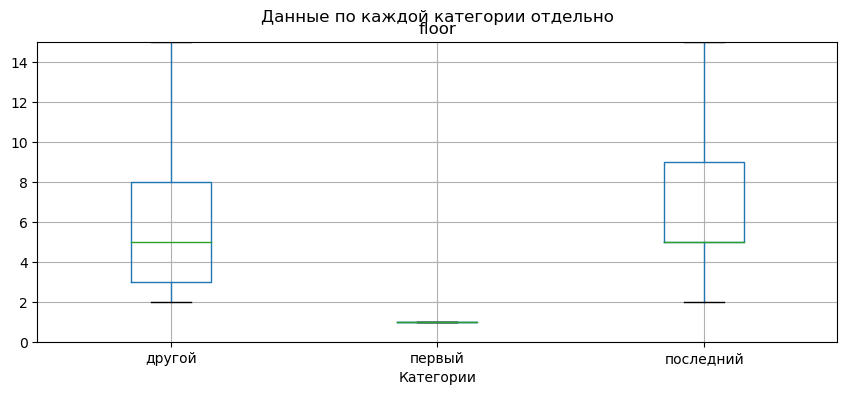

In [187]:
df_ceiling_height_category.boxplot(by='floor_type', column =['floor'], grid=True, figsize=(10, 4))
plt.ylim(0, 15)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон с 1  по 15 этаж. В этом случае в эти данные включены все возможные варианты нормальных, без выбросов, значений, которые допустимы для каждой отдельной категории.

<a id = 'floors_total'></a>

***- `floors_total`***

Рассмотрим еще такой параметр, как этажность здания, где продается квартира.

Получим основные значения по данному параметру.

In [188]:
mean_median_min_max(df, 'floors_total')


Среднее значение для столбца: floors_total 10.67
Медианное значение для столбца: floors_total 9.0
Минимальное значение для столбца: floors_total 1
Максимальное значение для столбца: floors_total 35


В данных по этажу квартиры наблюдаем следующий диапазон этажей от 1 до 35 этажа.

Посмотрим подробнее на параметр этажа квартиры в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

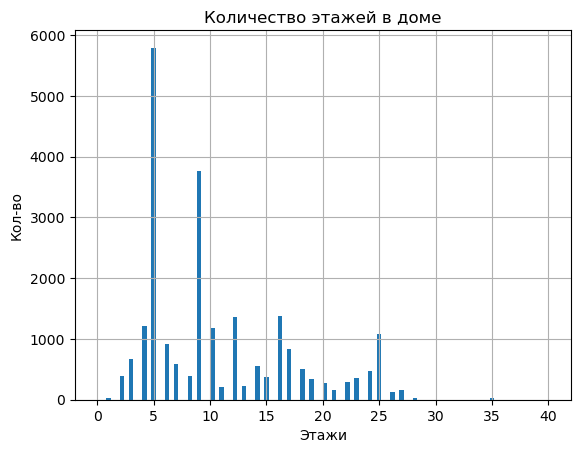

In [189]:
df_plot = df['floors_total'].plot(kind='hist', bins=100, range=(0,40), title='Количество этажей в доме', grid=True)
df_plot.set_xlabel('Этажи')
df_plot.set_ylabel('Кол-во')

Дома с 5 этажами преобладают в выборке, на треть меньше домов с 9 этажами. 

Разделим дома на категории в зависимости от этажности.

При определении категории будет опираться на общепринятое стандартное деление жилых домов по этажности.

Здания могут быть:
- Одноэтажными (эту категорию объединим со следующей)
- Малоэтажными: 2-3 этажа.
- Многоэтажными: до 9 этажей.
- Повышенной этажности: до 20.
- Высотными: от 20 и более.

Создадим новую таблицу, которую будем дополнять необходимыми данными и работать с ней.

Добавим столбец `category` в таблицу `df_floors_total_category` метками категорий в зависимости от определенных нами диапазонов.

In [190]:
df_floors_total_category = df.copy()

def category_type_floors_total(row):       
     
    if row['floors_total'] <= 3:            
        return 'малоэтажные'    
    if row['floors_total'] <= 9 and row['floors_total'] > 3:
        return 'многоэтажные'
    if row['floors_total'] <= 20 and row['floors_total'] > 9:
        return 'повышенной этажности'
    if  row['floors_total'] > 20:
        return 'высотные'    
    else:                                
        return 'Нет данных'              
    
df_floors_total_category['category'] = df_floors_total_category.apply(category_type_floors_total, axis=1)

Определим долю категорий в общих данных.

Вызовем универсальный метод percent_category

In [191]:
percent_category(df_floors_total_category, 'category', 'floors_total')

,Количество в floors_total,Процент от общего
category,,
многоэтажные,12680,53.524694
повышенной этажности,7240,30.561418
высотные,2685,11.333896
малоэтажные,1085,4.579992


Данные позволяют сделать следующие выводы:

- доля каждой категории распределена не одинаково,
- квартиры в малоэтажных домах представлены мало  (4.57%),
- максимально на рынке представлены квартир в категории "многоэтажные"(от 3 до 9 этажей)  - 53.52%
- квартиры повышенной этажности и высотные представлены в размере 30.56% и 11.33% соответственно.
 
Рассмотрим распределение категорий этаж по количеству комнат в квартире.

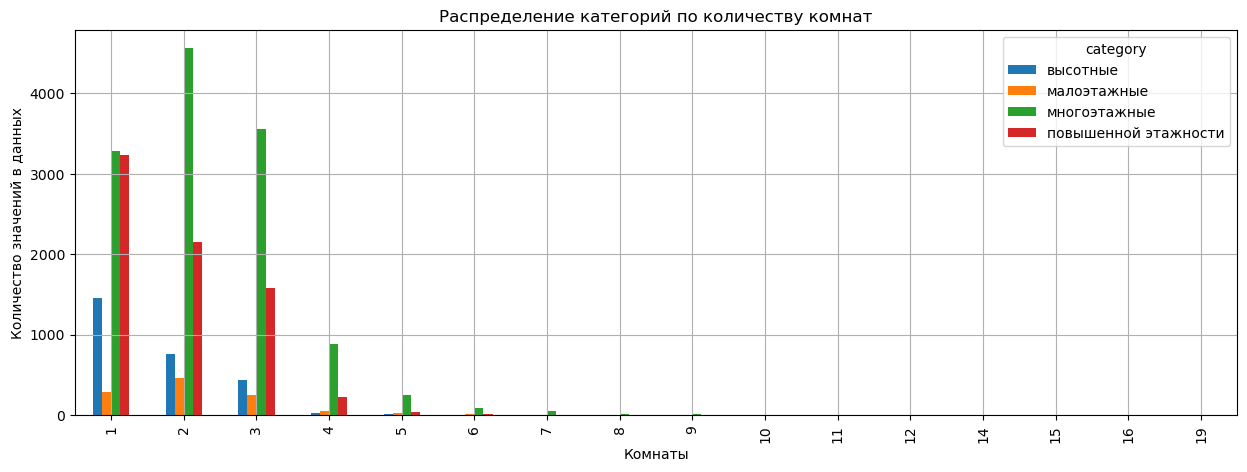

In [192]:
category_rooms(df_floors_total_category, 'category', 'bar')

Среди однокомнатных квартир более всего высталены на продажу квартиры в многоэтажных и повышенной этажности домах.
Двух и трех комнатные квартиры более всего продают в в многоэтажных домах, в половину меньше в домах повышенной этажности.
Четырехкомнатные и болеекомнатные квартиры так же более всего продают в многоэтажных домах.
Продажа квартир в высотных домах больше всего представлена в одно, двух и трехкомнатными квартирами (по мере роста количества комнат, падает количество обьявлений по этой категории домов).

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.

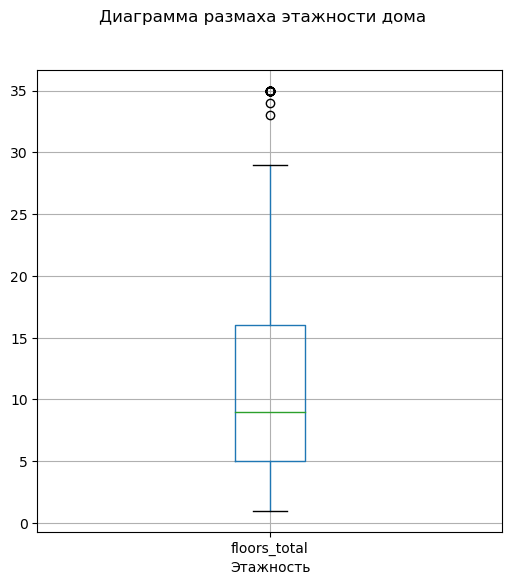

In [193]:
df_floors_total_category.boxplot(column='floors_total', figsize=(6, 6))
plt.suptitle('Диаграмма размаха этажности дома')
plt.xlabel('Этажность')
plt.show()

Диапазон от 1 по 28 этаж.

Проверим это диапазон не вообщем по признаку, а по категориям в отдельности.

Определим все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории.

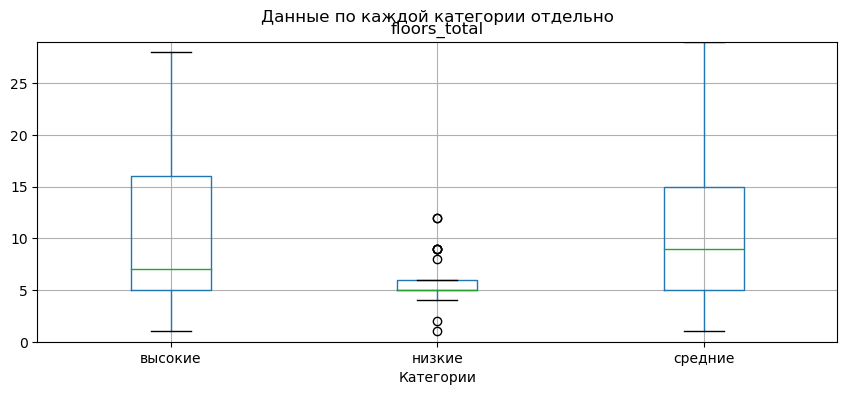

In [194]:
df_ceiling_height_category.boxplot(by='category', column =['floors_total'], grid=True, figsize=(10, 4))
plt.ylim(0, 29)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон подтвердили: от 1 по 28 этаж.

<a id = 'cityCenters_nearest'></a>

***- `cityCenters_nearest`***

Рассмотрим еще такой параметр, как отдаленность объекта недвижимости от центра.

Получим основные значения по данному параметру.

In [195]:
mean_median_min_max(df, 'cityCenters_nearest')

Среднее значение для столбца: cityCenters_nearest 13914.36
Медианное значение для столбца: cityCenters_nearest 13000.0
Минимальное значение для столбца: cityCenters_nearest 181
Максимальное значение для столбца: cityCenters_nearest 65968


В данных по отдаленности от центра наблюдаем следующий диапазон  от 181 до 65968м.

Посмотрим подробнее на параметр этажа квартиры в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

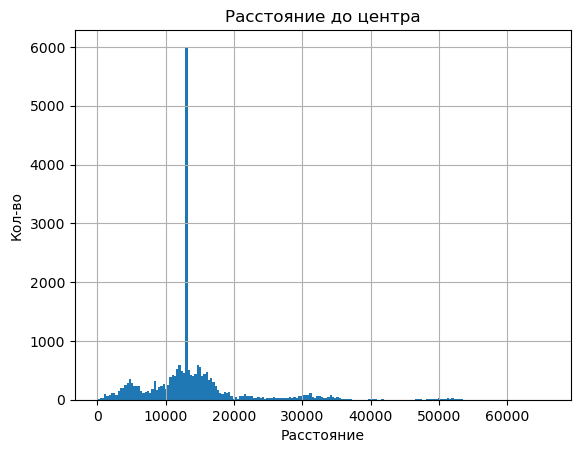

In [196]:
df_plot = df['cityCenters_nearest'].plot(kind='hist', bins=200, range=(0,66000), title='Расстояние до центра', grid=True)
df_plot.set_xlabel('Расстояние')
df_plot.set_ylabel('Кол-во')

Большая часть продаваемых квартир находится в рамках от 5  до 20 км - значит основная масса предложений по квартирам в Санкт-Петербурге. 
Пик, который мы наблюдаем в районе 13 км обусловлен заменой пропусков (порядка 23%) на близкое к медиане значение.

Для более удобного понимания расположения квартир, поделим столбец (насстояние доцентра) на категории. 

За основу возьмем примерные расстояния по карте:

- город — включает в себя большую часть районов - до 10 км,
- окраины — районы, которые находятся в черте города, но далеки от центра - до 13 км,
- пригород — за пределами окраин, может включать пригородные населенные пункты или спальные районы, расположенные вблизи города (до 17 км),
- область — населенные пункты, которые не входят в состав самого города и находятся на большом удалении от города, свыше 17 км.

wikipedia дает такие данные: "Протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД,— около 90 км." https://ru.wikipedia.org/wiki/%D0%93%D0%B5%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%8F_%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0

То есть согласно нашего категориального распределения, часть обьектов, относящихся к Санкт-Петербургу могут попасть в категории пригород и область, но так как мы рассматриваем отдаленность от центра города, то принебрежем этим фактом.

Создадим новую таблицу, которую будем дополнять необходимыми данными и работать с ней, не нарушая порядок изначальной.

Добавим столбец `category` в таблицу `df_floors_total_category` метками категорий в зависимости от определенных нами диапазонов.

In [197]:
df_cityCenters_nearest_category = df.copy()

def category_type_cityCenters_nearest(row):       
    
    if row['cityCenters_nearest'] <= 10000:            
        return 'город'    
    if row['cityCenters_nearest'] <= 13000 and row['cityCenters_nearest'] > 10000:
        return 'окраины'
    if row['cityCenters_nearest'] <= 17000 and row['cityCenters_nearest'] > 13000:
        return 'пригород'
    if  row['cityCenters_nearest'] > 17000:
        return 'область'    
    else:                                
        return 'Нет данных'              
    
df_cityCenters_nearest_category['category'] = df_cityCenters_nearest_category.apply(category_type_cityCenters_nearest, axis=1)

Вызовем универсальный метод `top_min_max`

In [198]:
top_min_max(df_cityCenters_nearest_category, 'cityCenters_nearest', 3)

Топ максимум: cityCenters_nearest
9640    65968
5340    65952
577     65764
Name: cityCenters_nearest, dtype: int64

Топ минимум: cityCenters_nearest
13694    181
1182     208
8614     215
Name: cityCenters_nearest, dtype: int64


В Топ-3 попали довольно максимальное расстояние по обьявлениям 65.968 км и очень близкое расположение 181м.

Определим долю категорий в общих данных.

Вызовем универсальный метод percent_category

In [199]:
percent_category(df_cityCenters_nearest_category, 'category', 'cityCenters_nearest')

,Количество в cityCenters_nearest,Процент от общего
category,,
окраины,9361,39.514563
пригород,5389,22.747995
город,5096,21.511186
область,3844,16.226256


Рассмтотрим распределения обьявлений по категорям из таблицы:

Так как в категории "окраины" находится 23% пропущенных значений, котрые заполнили расстоянием 13км, то при расшифровке данных таблицы учтем этот факт.

- доля каждой категории удаленность от центра обьектов недвижимости распределена не одинаково,
- квартиры с окраин (10-13км) предлагают меньше всего (39.51-23 = 6.51%),
- больше всех предложений в категории "пригород"(13-17км) - 22.75%,
- чуть меньше предложений в категории "город"(до 10км) - 21.51%,

Рассмотрим распределение категорий расстояние до центра по количеству комнат.

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.

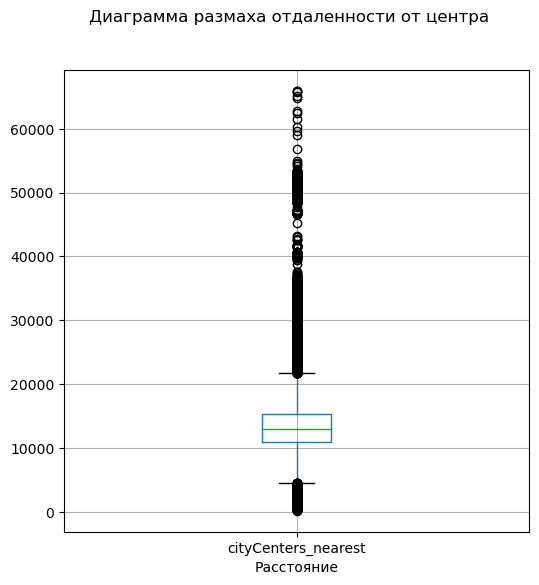

In [200]:
df_cityCenters_nearest_category.boxplot(column='cityCenters_nearest', figsize=(6, 6))
plt.suptitle('Диаграмма размаха отдаленности от центра')
plt.xlabel('Расстояние')
plt.show()

Диапазон от 500м до 22км.

Проверим это диапазон не вообщем по признаку, а по категориям в отдельности.

Определим все возможные варианты нормальных значений, которые допустимы для каждой отдельной категории.

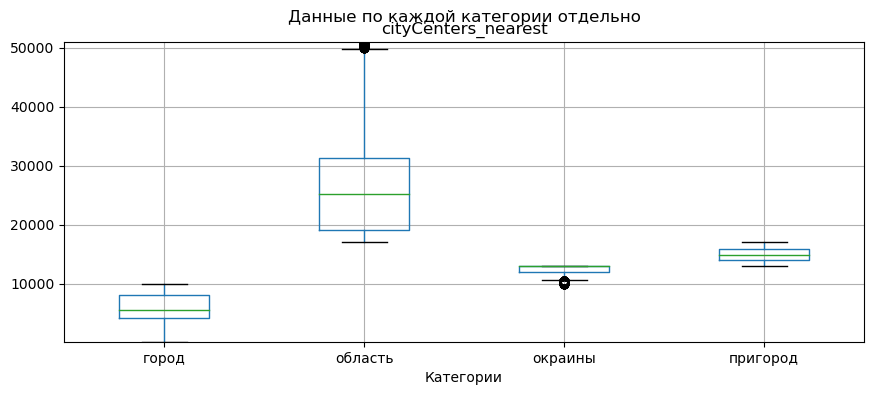

In [201]:
df_cityCenters_nearest_category.boxplot(by='category', column =['cityCenters_nearest'], grid=True, figsize=(10, 4))
plt.ylim(160, 51000)
plt.xlabel('Категории')
plt.suptitle('Данные по каждой категории отдельно')
plt.show()

Диапазон изменили.Приемлемый диапазон от 180 м до 50км.

<a id = 'airports_nearest'></a>

***- `airports_nearest`***

Рассмотрим еще такой параметр, как отдаленность объекта недвижимости от аеропорта.

Получим основные значения по данному параметру.


In [202]:
mean_median_min_max(df, 'airports_nearest')

Среднее значение для столбца: airports_nearest 28374.35
Медианное значение для столбца: airports_nearest 27000.0
Минимальное значение для столбца: airports_nearest 0
Максимальное значение для столбца: airports_nearest 84869


В данных по отдаленности от аеропорта наблюдаем следующий диапазон от 0 до 84869м.

Посмотрим подробнее на параметр этажа квартиры в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

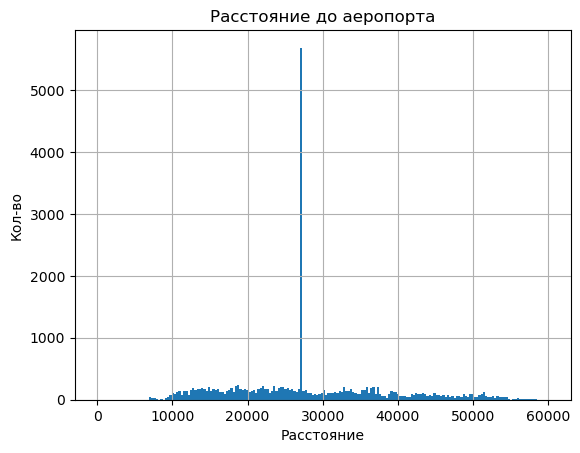

In [203]:
df_plot = df['airports_nearest'].plot(kind='hist', bins=200, range=(0,60000), title='Расстояние до аеропорта', grid=True)
df_plot.set_xlabel('Расстояние')
df_plot.set_ylabel('Кол-во')

Основная масса квартир находится от аеропорта на отдалении 10км - 47км. Пик, который мы наблюдаем в районе 27 км обусловлен заменой пропусков (порядка 23%) на близкое к медиане значение.


Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе. 


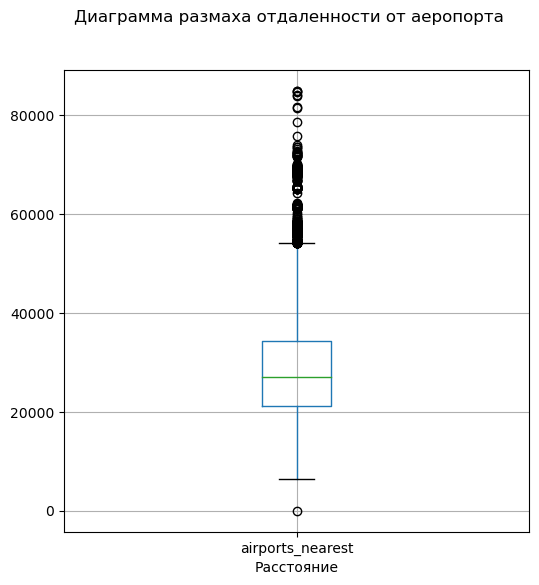

In [204]:
df.boxplot(column='airports_nearest', figsize=(6, 6))
plt.suptitle('Диаграмма размаха отдаленности от аеропорта')
plt.xlabel('Расстояние')
plt.show()

Диапазон от 5 км до 55 км.

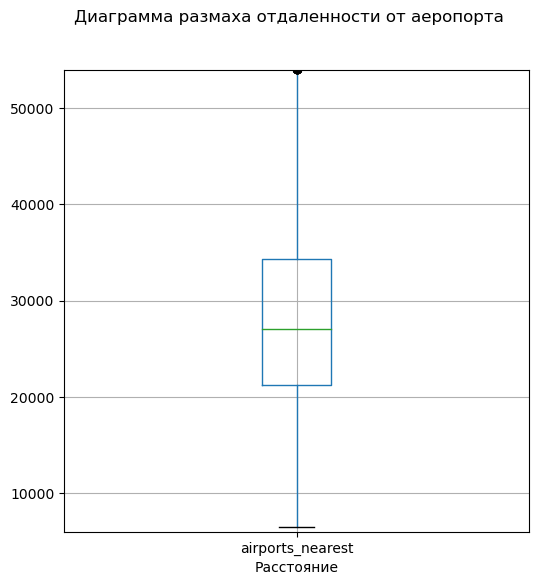

In [205]:
df.boxplot(column='airports_nearest', figsize=(6, 6))
plt.ylim(6000, 54000)
plt.suptitle('Диаграмма размаха отдаленности от аеропорта')
plt.xlabel('Расстояние')
plt.show()

Откорректировали диапазон  от 6 км до 54 км.

<a id = 'parks_nearest'></a>

***- `parks_nearest`***

Рассмотрим еще такой параметр, как отдаленность объекта недвижимости от парка.

Получим основные значения по данному параметру.

In [206]:
mean_median_min_max(df, 'parks_nearest')

Среднее значение для столбца: parks_nearest 166.69
Медианное значение для столбца: parks_nearest -1.0
Минимальное значение для столбца: parks_nearest -1
Максимальное значение для столбца: parks_nearest 3190


В данных по отдаленности от аеропорта наблюдаем следующий диапазон от 0 до 3190м.

Посмотрим подробнее на параметр отдаленности от парка в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

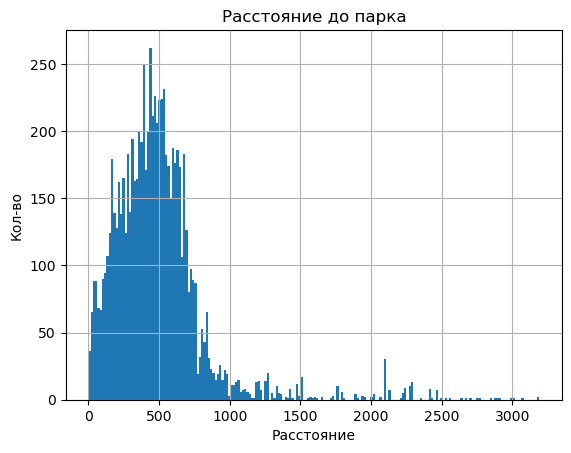

In [207]:
df_plot = df['parks_nearest'].plot(kind='hist', bins=200, range=(1,3190), title='Расстояние до парка', grid=True)
df_plot.set_xlabel('Расстояние')
df_plot.set_ylabel('Кол-во')

Основная масса квартир находится от парков на отдалении 400 м. Многие продавцы не указали наличие парков рядом с квартирой.

Следует учесть, что значение -1 в этом параметре указывает, что парка нет (то есть так были заменены пропущенные значения).

Посмотрим на допустимые диапазоны, которые мы сможем использовать в дальнейшей работе.

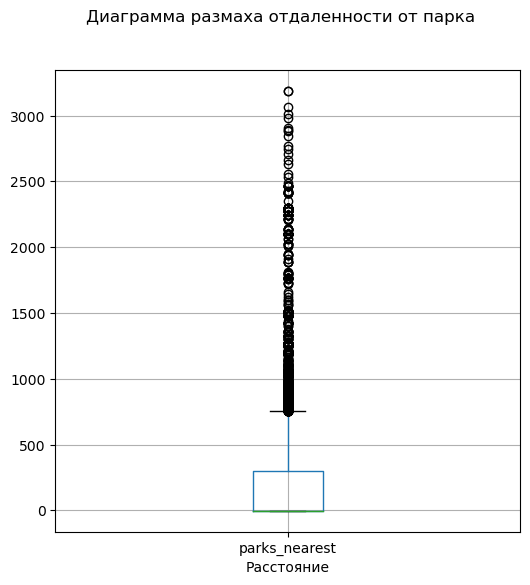

In [208]:
df.boxplot(column='parks_nearest', figsize=(6, 6))
plt.suptitle('Диаграмма размаха отдаленности от парка')
plt.xlabel('Расстояние')
plt.show()

Допустимый диапазон 0 - 750 м.

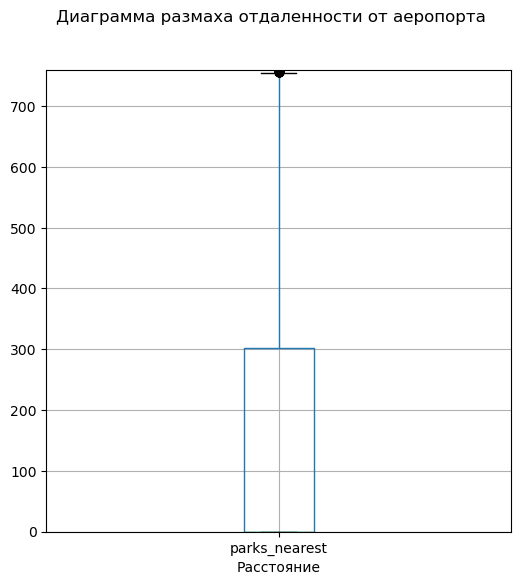

In [209]:
df.boxplot(column='parks_nearest', figsize=(6, 6))
plt.ylim(0, 760)
plt.suptitle('Диаграмма размаха отдаленности от аеропорта')
plt.xlabel('Расстояние')
plt.show()

Подтвердили приемлемый диапазон от 0 м до 750м.

<a id = 'weekday_exposition'></a>

***- `weekday_exposition`***

***- `month_exposition`***

Рассмотрим день такие показатели как день недели и месяц публикации объявления.

Посмотрим подробнее эти показатели в представлении гистограммы.

Text(0, 0.5, 'Кол-во')

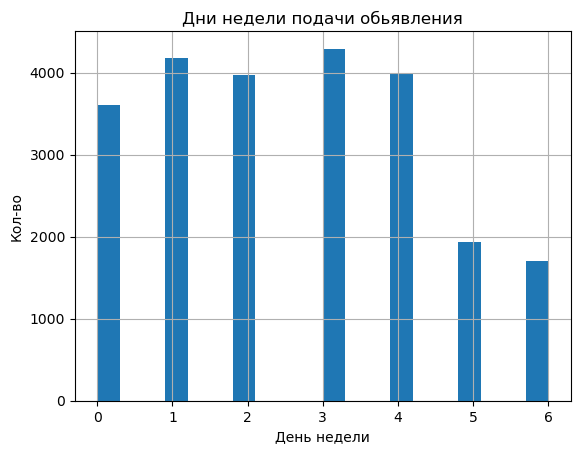

In [210]:
df_plot = df['weekday_exposition'].plot(kind='hist', bins=20, range=(0,6), title='Дни недели подачи обьявления', grid=True)
df_plot.set_xlabel('День недели')
df_plot.set_ylabel('Кол-во')

Больше всего обьявлений подается в четверг и вторник,в среду и в пятницу чуть меньше, меньше всего на выходные.

Text(0, 0.5, 'Кол-во')

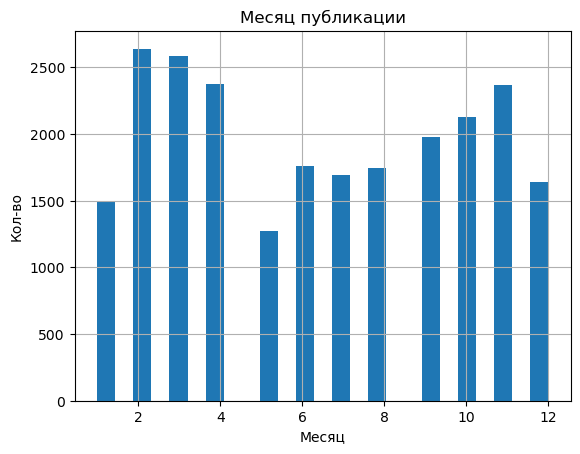

In [211]:
df_plot = df['month_exposition'].plot(kind='hist', bins=25, range=(1,12), title='Месяц публикации', grid=True)
df_plot.set_xlabel('Месяц')
df_plot.set_ylabel('Кол-во')

Самыми активными месяцами подачи обьявлений были февраль, март, ноябрь, апрель и октябрь (перечислены по убыванию). Меньше всего обьявлений подается в январе и мае (перечислены по убыванию), наверное сказваются праздники и большое количество выходных дней.

Подтвердим наши выводы сводными таблицами. Определим долю дней недели в общих данных.

In [212]:
weekday_exposition_percent = percent_category(df, 'weekday_exposition', 'total_area')
weekday_exposition_percent

,Количество в total_area,Процент от общего
weekday_exposition,,
3,4294,18.125791
1,4181,17.648797
4,4000,16.884762
2,3973,16.770789
0,3608,15.230055
5,1935,8.168003
6,1699,7.171802


Сводная таблица показывает, что:

- данные по группам распределены не равномерно, а значит каждый день имеет свой объем поданных объявлений,
- больше всего обьявлений подается в четверг (18.13%) и вторник (17.65%),
- меньше всего (в два раза меньше) - на выходные (7.17% - 8,17%).

Определим долю месяцев года в общих данных.

In [213]:
month_exposition_percent = percent_category(df, 'month_exposition', 'total_area')
month_exposition_percent

,Количество в total_area,Процент от общего
month_exposition,,
2,2640,11.143943
3,2586,10.915998
4,2378,10.037991
11,2370,10.004221
10,2126,8.974251
9,1981,8.362178
6,1760,7.429295
8,1744,7.361756
7,1692,7.142254


Данные гистограммы подтверждаются:

- каждый месяц данные о подаче обьявлений разные,
- более всего объявления подаются в феврале (11,14% от всех поданных в выборке),
- меньше всего - в мае (5,37%).

In [214]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_meter,weekday_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120.37,3,3,2019,другой,16
1,7,3350.0,40.40,2018-12-04T00:00:00,1,2.50,11,18.60,1,True,False,False,11.00,2,Шушары,12817,18603,0,-1,0,-1,81,82.92,1,12,2018,первый,18
2,10,5196.0,56.00,2015-08-20T00:00:00,2,2.50,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.79,3,8,2015,другой,13
3,0,64900.0,159.00,2015-07-24T00:00:00,3,2.50,14,83.50,9,True,False,False,9.50,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408.18,4,7,2015,другой,6
4,2,10000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100.00,1,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.30,3,True,False,False,13.83,0,Санкт-Петербург,24665,4232,1,796,3,381,0,72.49,1,3,2017,другой,4
23695,14,3100.0,59.00,2018-01-15T00:00:00,3,2.50,5,38.00,4,True,False,False,8.50,0,Тосно,27000,13000,0,-1,0,-1,45,52.54,0,1,2018,другой,13
23696,18,2500.0,56.70,2018-02-11T00:00:00,2,2.50,3,29.70,1,True,False,False,8.80,0,Рождествено,27000,13000,0,-1,0,-1,0,44.09,6,2,2018,первый,13
23697,13,11475.0,76.75,2017-03-28T00:00:00,2,3.00,17,40.31,12,True,False,False,23.30,2,Санкт-Петербург,39140,10364,2,173,3,196,602,149.51,1,3,2017,другой,10


***Вывод по результатам изученых данных.***

После изучения данных получили представление о структуре и качестве данных. Выделили границы данных по которым сделаем выборку и проведем исследовательский анализ.


Были применены два подхода:

- первый - рассматривались значения по конкретному столбцу, определяли выбросы и норамльные границы без выбросов,
- второй - разделили данные по столбцу на категории и у каждой категории наблюдали выбросы. Второй подход увеличим валидный диапазон значений, но так как минимальное значение берется от категории с минимальным значением, а максимальное от категории с большим значением, то для всех промежуточных категорий могут быть включены выбросы. Этот вариант хоть и увеличивает исследуемую область и отсекает крайне (минимальные и макксимальные) выбросы, тем не менее содержит по некоторым категориям выбросы.

Ниже приведем разницу в данных. 

При первом подходе получены такие данные:

- Общая плошадь — от 12 до 115 квм,
- Жилая площадь — от 12 до 80 квм,
- Площадь кухни — от 1,3 до 18 квм,
- Высота потолка — от 2.3 до 2.95 м,
- Последняя цена квартиры — от 300тыс до 10000 тыс,
- Высота потолка — от 2.19 до 3.0 м,
- Этаж — от 1 до 17,
- Этаж дома - от 1 по 28,
- Удаленность от центра города — от 500м до 22 км,
- Удаленность от аеропорта — от 5км до 55 км,
- Удаленность от парка — от 1м до 750 км,
- Комнаты в квартире — от 1 до 6.

При втором подходе такие:

- Общая плошадь — от 25 до 170 квм,
- Жилая площадь — от 12 до 100 квм,
- Площадь кухни — от 2 до 26 квм,
- Высота потолка — от 2.35 до 3.56 м,
- Последняя цена квартиры — от 350тыс до 26000тыс,
- Этаж — от 1 до 15,
- Количество этажей в доме — от 1 до 28,
- Удаленность от центра города — от 180м до 50 км,
- Удаленность от аеропорта — от 6км до 54 км,
- Удаленность от парка — от 1м до 750 км,
- Комнаты в квартире — от 1 до 6.

Как видим Неизменными остались значения:

- Количество этажей в доме — от 1 до 28,
- Удаленность от парка — от 1м до 750 км,
- Комнаты в квартире — от 1 до 6.

Какие данные использовать лучше пока сказать сложно, используем два подхода и посмотрим какой больше себя оправдает.

Далее определим границы, которые можно будет использовать для фильтрации данных.

**Для первого варианта.**

In [215]:
# условия общей площади в первом варианте
total_area_borders = "12 <= total_area <= 115"

# условие жилой площади 
living_area_borders = "12 <= living_area <= 80"

# условие площади кухни
kitchen_area_borders = "1.3 <= kitchen_area <= 18"

# условие последней цены 
last_price_borders = "300 <= last_price <= 10000"

# условие количества комнат
rooms_borders = "1 <= rooms <= 6"

# условие высоты потолков 
ceiling_height_borders = "2.19 <= ceiling_height <= 3"

# условие этажа квартиры
floor_borders = "floor <= 17"

# условие этажности дома 
floors_total_borders = "1 <= floors_total <= 28"

# условие удаленности от центра города 
cityCenters_nearest_borders = "500 <= cityCenters_nearest <= 22000"

# условие удаленности от аэропорта 
airports_nearest_borders = "5000 <= airports_nearest <= 55000"

# условие удаленности от ближайшего парка
parks_nearest_borders = "0 <= parks_nearest <= 750"

**Для второго варианта.**

In [216]:
# условия общей площади во втором варианте
total_area_borders_categories = "25 <= total_area <= 170"

# условие жилой площади 
living_area_borders_categories = "12 <= living_area <= 100"

# условие площади кухни
kitchen_area_borders_categories = "2 <= kitchen_area <= 26"

# условие последней цены 
last_price_borders_categories = "350 <= last_price <= 26000"

# условие количества комнат
rooms_borders_categories = "1 <= rooms <= 6"

# условие высоты потолков 
ceiling_height_borders_categories = "2.35 <= ceiling_height <= 3.56"

# условие этажа квартиры
floor_borders_categories = "floor <= 15"

# условие этажности дома 
floors_total_borders_categories = "1 <= floors_total <= 28"

# условие удаленности от центра города 
cityCenters_nearest_borders_categories = "180 <= cityCenters_nearest <= 50000"

# условие удаленности от аэропорта 
airports_nearest_borders_categories = "6000 <= airports_nearest_km <= 54000"

# условие удаленности от ближайшего парка
parks_nearest_borders_categories = "1 <= parks_nearest <= 750"

Создадим новый датафрейм включим в него следующие данные в границах первого варианта с параметрами:

- общей площади,
- жилой площади,
- площади кухни,
- количества комнат,
- последней цены на объект.


In [217]:
filtered_df =  df.query(total_area_borders)
filtered_df = filtered_df.query(living_area_borders)
filtered_df = filtered_df.query(kitchen_area_borders)
filtered_df = filtered_df.query(rooms_borders)
filtered_df = filtered_df.query(last_price_borders)
                        
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20248 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            20248 non-null  int64  
 1   last_price              20248 non-null  float64
 2   total_area              20248 non-null  float64
 3   first_day_exposition    20248 non-null  object 
 4   rooms                   20248 non-null  int64  
 5   ceiling_height          20248 non-null  float64
 6   floors_total            20248 non-null  int64  
 7   living_area             20248 non-null  float64
 8   floor                   20248 non-null  int64  
 9   is_apartment            20248 non-null  bool   
 10  studio                  20248 non-null  bool   
 11  open_plan               20248 non-null  bool   
 12  kitchen_area            20248 non-null  float64
 13  balcony                 20248 non-null  int64  
 14  locality_name           20248 non-null

Очевидно, что размер выборки уменьшился, новые столбцы на месте, тип данных не изменился.

In [218]:
print('Количество значений начального датафрейма:',old_df)
print('Количество значений после удаления выбросов:',filtered_df.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format((old_df - filtered_df.shape[0])/old_df))

Количество значений начального датафрейма: 23699
Количество значений после удаления выбросов: 20248
Процент удаленных данных: 14.56%


<a id = 'days_exposition_min_max'></a>

# **4.2. Определим и проанализируем, как быстро продавались квартиры**

Построим гистограмму и определим в течении какого времени как правило продаются квартиры. Используем для анализа столбец `days_exposition`.

In [219]:
mean_median_min_max(filtered_df, 'days_exposition')

Среднее значение для столбца: days_exposition 149.36
Медианное значение для столбца: days_exposition 70.0
Минимальное значение для столбца: days_exposition 0
Максимальное значение для столбца: days_exposition 1580


Text(0, 0.5, 'Кол-во')

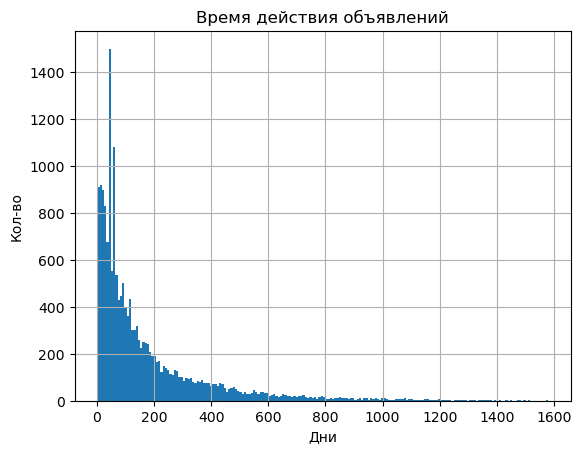

In [220]:
df_plot = filtered_df['days_exposition'].plot(kind='hist', bins=200, range=(1,1580), title='Время действия объявлений', grid=True)
df_plot.set_xlabel('Дни')
df_plot.set_ylabel('Кол-во')

Согласно графика, большая часть продаж была совершена в первые пол года. 
Количество дней публикации объявления, которые равны 0, определили как активные либо снятые не завершенными, либо данные по ним утерянны.

Тогда минимальное значение продажи квартиры — 1 день, максимальное  — почти 4 года. Медианное значение показывает, что квартиру можно продать за 2 месяца.

Определим категорий по скорости продажи:

- быстрая — предполагаю, что сюда войдут квартиры сроком продажи полтора месяца,
- средняя — предполагаю, что сюда войдут квартиры, которые продавались за три месяца,
- длительная — квартиры, которые продавались 7-8 месяцев,
- затянувшаяся — продажи, которые заняли промежуток от полугода и более.

Для чистоты эксперимента исключим из разбиения количество дней равное нулю.

In [221]:
quantile_days_exposition = pd.qcut(filtered_df.query('days_exposition > 0')['days_exposition'], q = 4)
quantile_days_exposition.value_counts()

(0.999, 43.0]      4504
(43.0, 90.0]       4461
(216.0, 1580.0]    4443
(90.0, 216.0]      4430
Name: days_exposition, dtype: int64

Создадим новую таблицу данных, с ней и будем пока работать.

В новут таблицу `df_days_exposition_category` добавим столбец `category` с метками категорий в зависимости от определенных нами диапазонов.

In [222]:
df_days_exposition_category = filtered_df.copy()

def category_days_exposition_total(row):       
     
    if row['days_exposition'] <= 43 and row['days_exposition'] > 0:            
        return 'быстрая'    
    if row['days_exposition'] <= 90 and row['days_exposition'] > 43:
        return 'средняя'
    if row['days_exposition'] <= 216 and row['days_exposition'] > 90:
        return 'длительная'
    if  row['days_exposition'] > 216:
        return 'затянувшаяся'    
    else:                                
        
        return 'Нет данных'

In [223]:
df_days_exposition_category['category'] = df_days_exposition_category.apply(category_days_exposition_total, axis=1)


Определим долю категорий в общих данных.

Вызовем универсальный метод `percent_category`

In [224]:
percent_category(df_days_exposition_category, 'category', 'days_exposition')

,Количество в days_exposition,Процент от общего
category,,
быстрая,4504,22.244172
средняя,4461,22.031806
затянувшаяся,4443,21.942908
длительная,4430,21.878704
Нет данных,2410,11.902410


Данные позволяют сделать следующие выводы:

- `быстрая` продажа ( в пределах 43 дней) происходит в 22.24% случаев,
- средние (до 7 месяце) - в 22.03% случаев,
- далее следует `затянувшаяся` продажа (от 7 месяцев и по некоторым данным до 4 лет) в  - 21.94% случаев,

Сроки `затянувшейся` продажи вызывают сомнения, возможно они были сняты сервисом автоматически, как "заброшенные". На сегодняшний день сервис предусматривает снятие объявлений в срок 90 дней.

- если не обращать внимание на сомнительные `затянувшиеся` продажи, то `длительные` ( от 7 месяцев) продажи происходят в 21.87% случаев.
- в 11.9% попали продажи для которых в датафрейме не был определен срок снятия объявления.

Если обьединить (по смыслу) `затянувшиеся`, `длительные` и `неизвестные` - их доля совокупная в общей выборке составляет чуть более 56%, а совокупная доля продаж до 7 месяцев (`быстрых` и `средних`) - в 44% случаев.

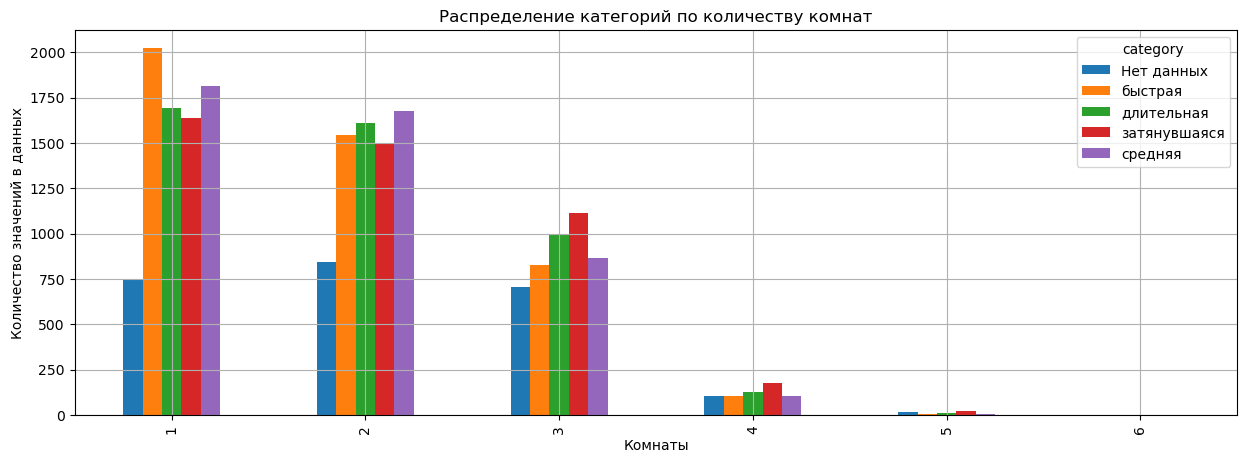

In [225]:
category_rooms(df_days_exposition_category, 'category', 'bar')

График показывает, что быстрее всего продаются одно и двухкомнатные квартиры. А вот для квартир от 3 комнат и больше характерны `длительные`, `затянувшиеся` продажи.

Посмотрим на сколько на сроки продажи влияет удаленность квартиры от центра.

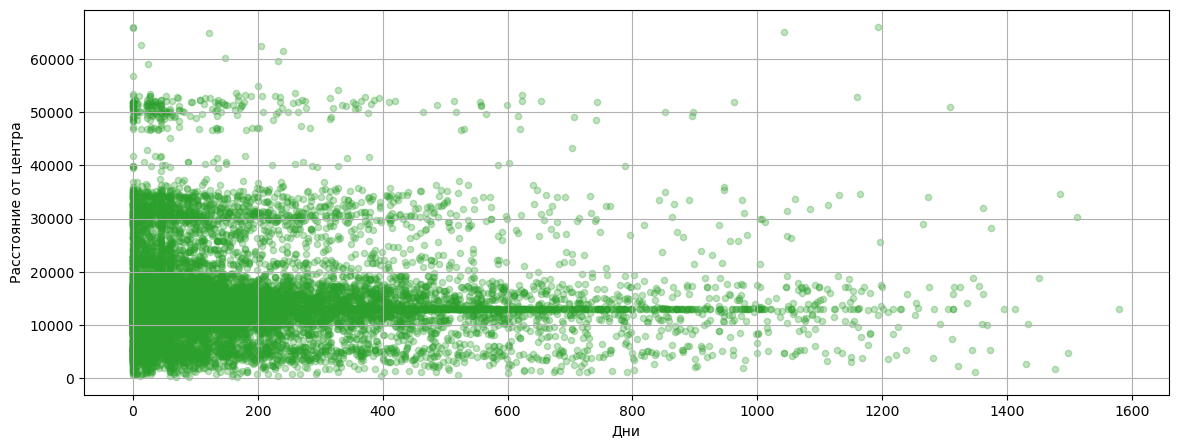

In [226]:
df_days_exposition_category.plot(x='days_exposition', 
                                 y='cityCenters_nearest', 
                                 kind='scatter', 
                                 figsize=(14, 5), 
                                 alpha = 0.3, 
                                 grid=True, 
                                 color='C2')
plt.xlabel('Дни')
plt.ylabel('Расстояние от центра')
plt.show()

В пределах 45 дней одинаково быстро продаются квартиры, расположенные на расстоянии 35 км. В целом, квартиры,расположенные близко и далеко продаются одинаково быстро и долго. Спад продаж в зависимости от расстояния начинается по прошествии 90 дней с момента выхода объявления.

***Вывод***

Подводя итоги можно сказать, что, если говорить о продажах квартиры без уточнения характеристик, то быстрая продажа происходит в пределах 43 дней, длительная от 7 месяцев и более.

Если рассматривать квартиры более подробно, по параметру количества комнат, увидим следующее:

- одно и двухкомнатные `быстро` продаются в течении до 43 дней, но `длительных`, `затянувшихся` (туда можно отнести и `не опознанные`) продаж совокупно в таком же количестве, что и `быстрые` и `средние`,
- для трех и четырехкомнатных  - `длительных`, `затянувшихся` (и `не опознанные`) совокупно на 25% больше, чем `быстрых` и `средних`,
- для квартир от 5 комнат и более `быстрых`  и `средних` продаж на 50% меньше, чем продаж `затянувшизся`, `длительных` и  `не опознаных`.

Если все это присовокупить - быстрых продаж мало.

# **4.3. Определим факторы, которые больше всего влияют на общую (полную) стоимость объектов жилой недвижимости.** 

Изучим, зависит ли цена от предложенных факторов:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).    

Для анализа будем использовать графики, которые покажут зависимость цены от указанных выше параметров, для подготовки данных перед визуализацией создадим сводные таблицы, расчитаем коффициент корреляции.

<a id = 'total_area_price'></a>

***- `total_area`***

<a id = 'dependence_price_feature'></a>

Проанализируем, завиcит ли цена от общей площади продаваемого жилья.

Обьявим универсальный метод `dependence_price_feature` для создания сводной таблицы и графиков.

In [227]:
def dependence_price_feature(new_df, column, feature):
    last_price_total = new_df.pivot_table(index=column, values='last_price', aggfunc= 'median')
    last_price_total = last_price_total.reset_index() # сводная таблица#
    # график
    print(last_price_total)
    last_price_total.plot(x=column, y='last_price', kind='scatter', grid=True, figsize=(10, 5), color='C2', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Цена')
    x = last_price_total[column]
    y = last_price_total['last_price']
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red') # линия регрессии
    plt.show()

      total_area  last_price
0           17.0      1900.0
1           18.0       770.0
2           18.4      2200.0
3           20.0      2950.0
4           20.3      2740.0
...          ...         ...
1450       113.9      8990.0
1451       114.0      8700.0
1452       114.2     10000.0
1453       114.3      6500.0
1454       115.0      8250.0

[1455 rows x 2 columns]


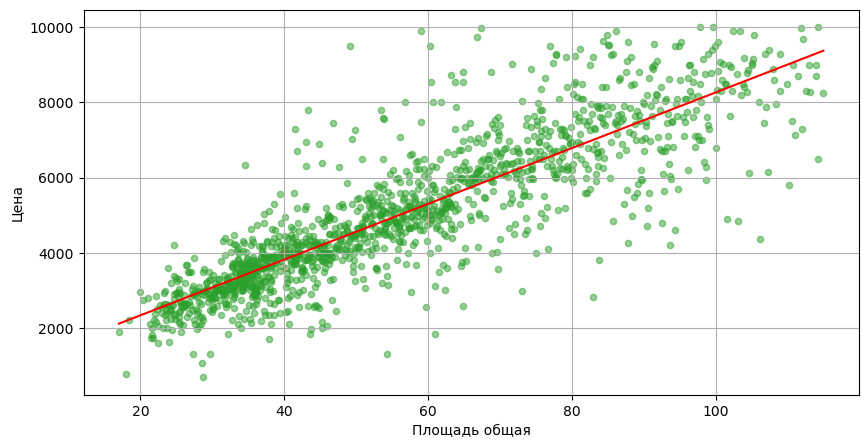

In [228]:
dependence_price_feature(filtered_df, 'total_area', 'Площадь общая') # вызовем метод

In [229]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df['last_price'].corr(filtered_df['total_area']).round(2)) # корреляция
print('Коэффициент корреляции полной выборки:', 
      df['last_price'].corr(filtered_df['total_area']).round(2)) # корреляция 

Коэффициент корреляции отфильтрованной выборки: 0.66
Коэффициент корреляции полной выборки: 0.66


Очевидно, что зависимость между общей площадью квартиры и ценой существует. График, направление линии регрессии и коэффициент корреляции показывает среднюю линейную положительную корреляцию.

Наибольшее плотное скопление точек около регрессионной прямой наблюдаем по общей площади от 30-45 квм и цене 2500тыс до 4200тыс. Это говорит о том, что на этот промежуток приходится большее количество предсказуемых по цене продаж.

Коэффициент корреляции у фильтрованной выборки остался таким же как и полной.

Рассмотрим как влияют категори общей площади на изменение цены.

Отфильтруем данные по 2 варианту в датафрейме, созданном для анализа общей площади.

In [230]:
filtered_df_total_area_category =  df_total_area_category.query(total_area_borders_categories)
filtered_df_total_area_category = filtered_df_total_area_category.query(living_area_borders_categories)
filtered_df_total_area_category = filtered_df_total_area_category.query(kitchen_area_borders_categories)
filtered_df_total_area_category = filtered_df_total_area_category.query(rooms_borders_categories)
filtered_df_total_area_category = filtered_df_total_area_category.query(last_price_borders_categories)
                        
filtered_df_total_area_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22403 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            22403 non-null  int64  
 1   last_price              22403 non-null  float64
 2   total_area              22403 non-null  float64
 3   first_day_exposition    22403 non-null  object 
 4   rooms                   22403 non-null  int64  
 5   ceiling_height          22403 non-null  float64
 6   floors_total            22403 non-null  int64  
 7   living_area             22403 non-null  float64
 8   floor                   22403 non-null  int64  
 9   is_apartment            22403 non-null  bool   
 10  studio                  22403 non-null  bool   
 11  open_plan               22403 non-null  bool   
 12  kitchen_area            22403 non-null  float64
 13  balcony                 22403 non-null  int64  
 14  locality_name           22403 non-null

In [231]:
print('Количество значений начального датафрейма:',old_df)
print('Количество значений после удаления выбросов:',filtered_df_total_area_category.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format((old_df - filtered_df_total_area_category.shape[0])/old_df))


Количество значений начального датафрейма: 23699
Количество значений после удаления выбросов: 22403
Процент удаленных данных: 5.47%


После фильтрации по 2 варианту обьем выборки изменился немного меньше(на 5% уменьшился), чем после фильтрации по первому варианту.

Заменим категории общей площади числовым эквивалентом.

In [232]:
def category_type_number(row):       
     
    if row['category'] == 'маленькая квартира':            
        return '1'  
    if row['category'] == 'меньше средней':  
        return '2'
    if row['category'] == 'средняя':
        return '3'
    if row['category'] == 'большая':
        return '4'
    if row['category'] == 'элитная':
        return '5'
    else:                                
        return 'Нет данных'              
    
filtered_df_total_area_category['category_number'] = filtered_df_total_area_category.apply(category_type_number, axis=1)

filtered_df_total_area_category['category_number'] = filtered_df_total_area_category['category_number'].astype('int64')
filtered_df_total_area_category['category_number'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

   category_number  last_price
0                1      3200.0
1                2      3940.0
2                3      4700.0
3                4      5800.0
4                5      9200.0


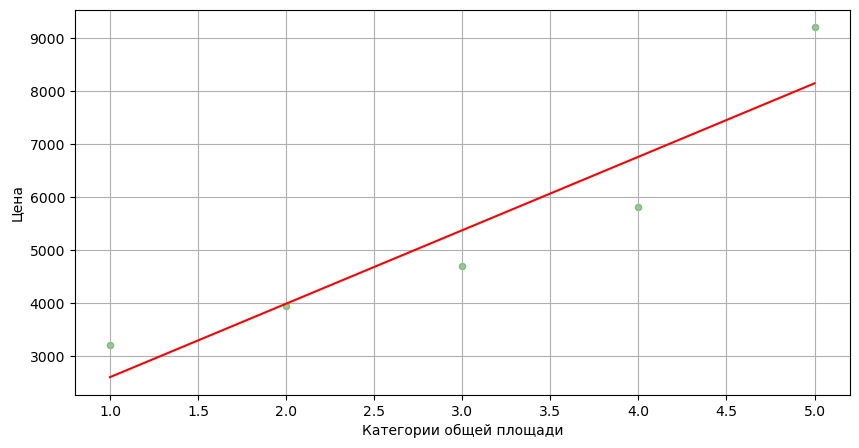

In [233]:
dependence_price_feature(filtered_df_total_area_category, 'category_number', 'Категории общей площади')

In [234]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df_total_area_category['last_price'].corr(filtered_df_total_area_category['category_number']).round(2)) 
# корреляция

Коэффициент корреляции отфильтрованной выборки: 0.65


Очевидно, что зависимость между типом общей площади квартиры и ценой существует. График, направление линии регрессии и коэффициент корреляции показывает среднюю линейную положительную корреляцию.

Сильнее зависимость проявляется по 1,2 и 3 категориям (по маленьким - средним квартирам, с площадью до 58квм.), более слабая взаимосвязь наблюдается по квартирам большей площади от 58 квм (категории большая и элитные).

Наиболее зависима от площади цена объектов 2 категории (37,6-46квм).

Самая высокая средняя цена у элитных квартир, самая низкая у маленьких квартир.

<a id = 'living_area_price'></a>

***- `living_area`***

Проанализируем, зависит ли цена от жилой площади продаваемого жилья.

      living_area  last_price
0           12.00      3095.0
1           12.08      2540.0
2           12.10      3500.0
3           12.17      1995.0
4           12.18      3390.0
...           ...         ...
1646        76.50      7500.0
1647        76.80      8600.0
1648        77.00      8630.0
1649        78.00      7300.0
1650        80.00      7820.0

[1651 rows x 2 columns]


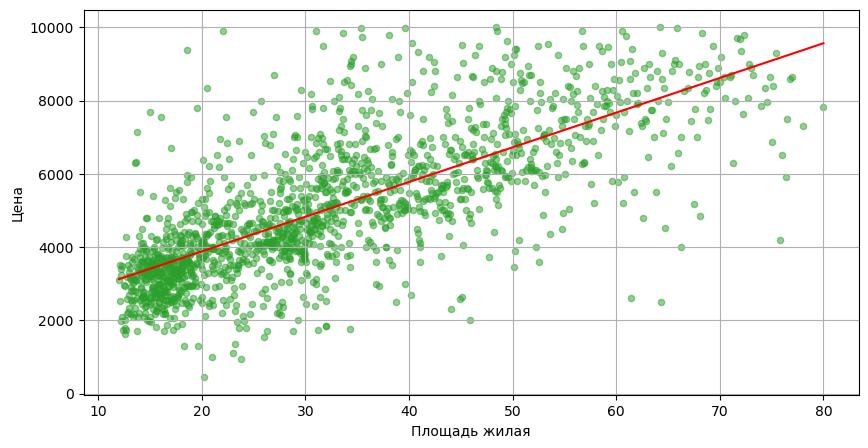

In [235]:
dependence_price_feature(filtered_df, 'living_area', 'Площадь жилая') # вызовем метод

In [236]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df['last_price'].corr(filtered_df['living_area']).round(2)) # корреляция
print('Коэффициент корреляции полной выборки:', 
      df['last_price'].corr(filtered_df['living_area']).round(2)) # корреляция 

Коэффициент корреляции отфильтрованной выборки: 0.55
Коэффициент корреляции полной выборки: 0.55


Очевидно, что зависимость между жилой площадью квартиры и ценой существует. График, направление линии регрессии и коэффициент корреляции показывает чуть выше слабой линейную положительную корреляцию.

Наибольшее плотное скопление точек около регрессионной прямой наблюдаем по площади  12-19 квм и цене 2500тыс до 4000тыс. Это говорит о том, что на этот промежуток приходится большее количество предсказуемых по цене продаж.

Коэффициент корреляции у фильтрованной выборки остался таким же как и полной.

Рассмотрим как влияют категори жилой площади на изменение цены.

Отфильтруем данные по 2 варианту в датафрейме, созданном для анализа жилой площади.

In [237]:
filtered_df_living_area_category =  df_living_area_category.query(total_area_borders_categories)
filtered_df_living_area_category = filtered_df_living_area_category.query(living_area_borders_categories)
filtered_df_living_area_category = filtered_df_living_area_category.query(kitchen_area_borders_categories)
filtered_df_living_area_category = filtered_df_living_area_category.query(rooms_borders_categories)
filtered_df_living_area_category = filtered_df_living_area_category.query(last_price_borders_categories)

Заменим категории жилой площади числовым эквивалентом.

In [238]:
def category_type_number(row):       
     
    if row['category'] == 'маленькая площадь':            
        return '1'  
    if row['category'] == 'меньше средней':  
        return '2'
    if row['category'] == 'средняя':
        return '3'
    if row['category'] == 'большая':
        return '4'
    if row['category'] == 'элитная':
        return '5'
    else:                                
        return 'Нет данных'              
    
filtered_df_living_area_category['category_number'] = filtered_df_living_area_category.apply(category_type_number, axis=1)

filtered_df_living_area_category['category_number'] = filtered_df_living_area_category['category_number'].astype('int64')
filtered_df_living_area_category['category_number'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

   category_number  last_price
0                1      3399.0
1                2      3999.0
2                3      4400.0
3                4      5650.0
4                5      8470.0


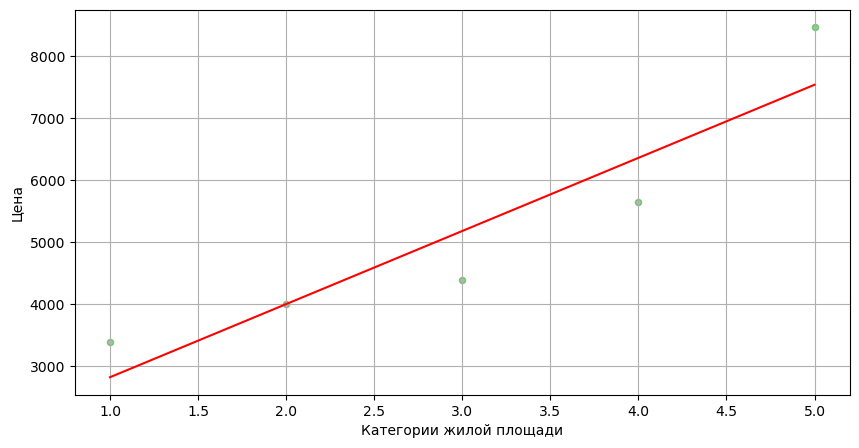

In [239]:
dependence_price_feature(filtered_df_living_area_category, 'category_number', 'Категории жилой площади')

In [240]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df_living_area_category['last_price'].corr(filtered_df_living_area_category['category_number']).round(2)) 
# корреляция

Коэффициент корреляции отфильтрованной выборки: 0.56


Зависимость цены от категории жилой площади существует. График, направление линии регрессии и коэффициент корреляции показывает среднюю линейную положительную корреляцию.

Сильнее зависимость проявляется по 1 и 2 категориям (по маленьким  и меньше средней жилым площадям, с площадью до 27.3квм.), более слабая взаимосвязь наблюдается по квартирам средней жилой и более площади от 27.3 квм (категории средняя, большая и элитные).

Наиболее зависима от площади цена объектов 2 категории (18-27.3квм).

Самая высокая средняя цена у элитных квартир, самая низкая у маленьких по площади.

<a id = 'kitchen_area_price'></a>

***- `kitchen_area`***

Проанализируем, завиcит ли цена от площади кухни продаваемого жилья.

     kitchen_area  last_price
0            1.30    4250.000
1            2.00    2820.000
2            2.30    2940.000
3            2.40    2200.000
4            2.89    5967.734
..            ...         ...
594         17.70    6000.000
595         17.80    5550.000
596         17.87    6290.000
597         17.90    7000.000
598         18.00    6500.000

[599 rows x 2 columns]


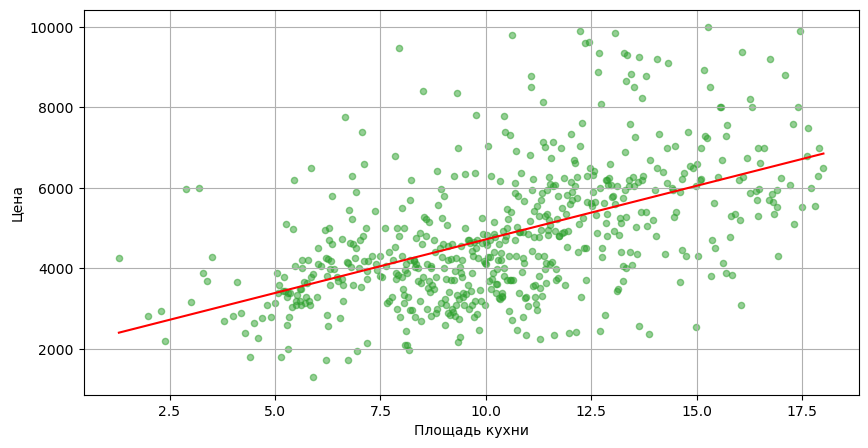

In [241]:
dependence_price_feature(filtered_df, 'kitchen_area', 'Площадь кухни') # вызовем метод

In [242]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df['last_price'].corr(filtered_df['kitchen_area']).round(2)) # корреляция
print('Коэффициент корреляции полной выборки:', 
      df['last_price'].corr(filtered_df['kitchen_area']).round(2)) # корреляция 

Коэффициент корреляции отфильтрованной выборки: 0.43
Коэффициент корреляции полной выборки: 0.43


Очевидно, что зависимость между площадью кухни квартиры и ценой существует. График, направление линии регрессии и коэффициент корреляции показывает слабую линейную положительную корреляцию.

Наибольшее скопление точек около регрессионной прямой наблюдаем по площади 5-12 квм и цене 3000тыс до 4500тыс. Это говорит о том, что на этот промежуток приходится большее количество предсказуемых по цене продаж.

Коэффициент корреляции у фильтрованной выборки остался таким же как и полной.

Рассмотрим как влияют категори площади кухни на изменение цены.

Отфильтруем данные по 2 варианту в датафрейме, созданном для анализа площади кухни.

In [243]:
filtered_df_kitchen_area_category =  df_kitchen_area_category.query(total_area_borders_categories)
filtered_df_kitchen_area_category = filtered_df_kitchen_area_category.query(living_area_borders_categories)
filtered_df_kitchen_area_category = filtered_df_kitchen_area_category.query(kitchen_area_borders_categories)
filtered_df_kitchen_area_category = filtered_df_kitchen_area_category.query(rooms_borders_categories)
filtered_df_kitchen_area_category = filtered_df_kitchen_area_category.query(last_price_borders_categories)

Заменим категории площади кухни числовым эквивалентом.

In [244]:
def category_type_number(row):       
     
    if row['category'] == 'маленькая площадь':            
        return '1'  
    if row['category'] == 'меньше средней':  
        return '2'
    if row['category'] == 'средняя':
        return '3'
    if row['category'] == 'большая':
        return '4'
    if row['category'] == 'элитная':
        return '5'
    else:                                
        return 'Нет данных'              
    
filtered_df_kitchen_area_category['category_number'] = filtered_df_kitchen_area_category.apply(category_type_number, axis=1)

filtered_df_kitchen_area_category['category_number'] = filtered_df_kitchen_area_category['category_number'].astype('int64')
filtered_df_kitchen_area_category['category_number'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

   category_number  last_price
0                1      3399.0
1                2      3999.0
2                3      4400.0
3                4      5650.0
4                5      8470.0


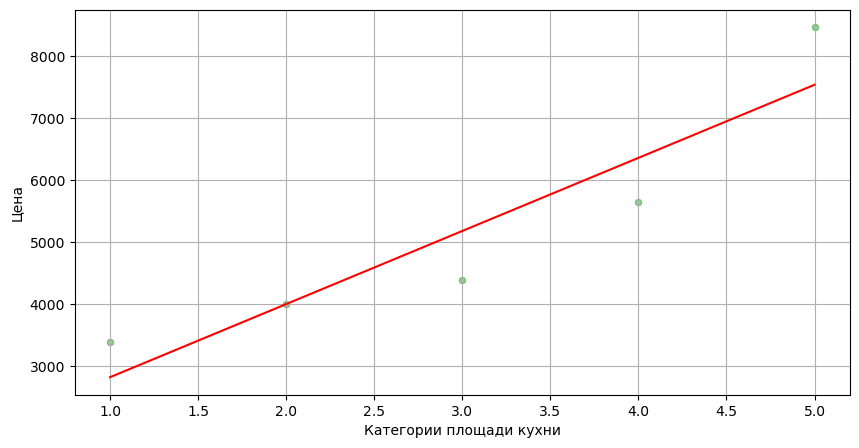

In [245]:
dependence_price_feature(filtered_df_kitchen_area_category, 'category_number', 'Категории площади кухни')

In [246]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df_kitchen_area_category['last_price'].corr(filtered_df_living_area_category['category_number']).round(2)) 
# корреляция

Коэффициент корреляции отфильтрованной выборки: 0.56


Зависимость цены от категории площади кухни (почти же как и зависимость цены от категории общей площади) существует. График, направление линии регрессии и коэффициент корреляции показывает среднюю линейную положительную корреляцию. При этом зависимость цены от категории площади кухни выше (коэффициент корреляции 0,56), чем зависимость цены от площади кухни (коэффициент корреляции 0,43). 

Сильнее зависимость проявляется по 1 и 2 категориям (по маленьким  и меньше средних плоащадей кухни квартиры, с площадью до 8.8квм.), более слабая взаимосвязь наблюдается по квартирам средней, большой и элитной площади кухни от 8,8 квм.

Наиболее зависима цена от категории площади кухни  по объектам 2 категории (7-8.8квм).

Самая высокая средняя цена у элитных квартир, самая низкая у маленьких по площади кухней.

<a id = 'rooms_price'></a>

***- `rooms`***

Проанализируем, завиcит ли цена от количества комнат продаваемого жилья.

   rooms  last_price
0      1      3550.0
1      2      4550.0
2      3      5500.0
3      4      6400.0
4      5      6800.0
5      6      6482.0


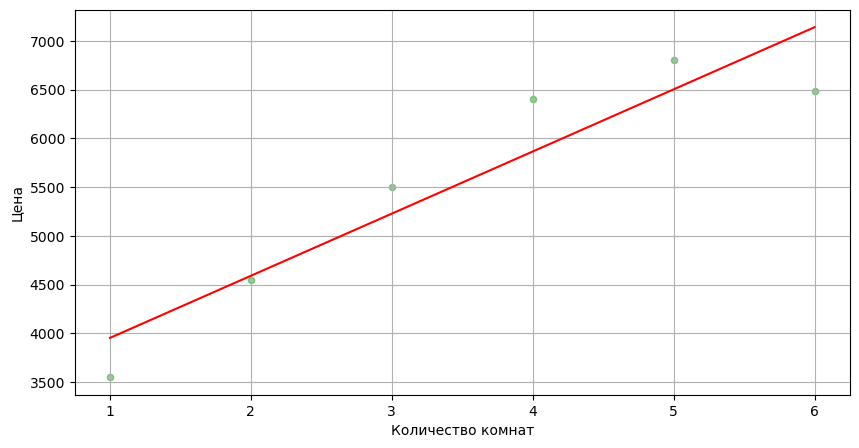

In [247]:
dependence_price_feature(filtered_df, 'rooms', 'Количество комнат') # вызовем метод

In [248]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df['last_price'].corr(filtered_df['rooms']).round(2)) # корреляция
print('Коэффициент корреляции полной выборки:', 
      df['last_price'].corr(filtered_df['rooms']).round(2)) # корреляция 

Коэффициент корреляции отфильтрованной выборки: 0.42
Коэффициент корреляции полной выборки: 0.42


Очевидно, что зависимость между количеством комнат квартиры и ценой существует. График, направление линии регрессии и коэффициент корреляции показывает слабую линейную положительную корреляцию.

Наиболее близко от регрессионной прямой двухкомнатные квартиры с ценой 4550тыс. Это говорит о том, что на этот промежуток приходится большее количество предсказуемых по цене продаж.

Коэффициент корреляции у фильтрованной выборки остался таким же как и полной.

Самая высокая средняя цена у квартир с большим количеством комнат, самая низкая у однокомнатных квартир.

<a id = 'floor_type_price'></a>

***- `floor_type`***

Проанализируем, завиcит ли цена от типа этажа, на котором расположена квартира.

Заменим категории тип этажа числовым эквивалентом.

In [249]:
def category_type_number(row):       
     
    if row['floor_type'] == 'первый':            
        return '1'  
    if row['floor_type'] == 'другой':  
        return '2'
    if row['floor_type'] == 'последний':
        return '3'    
    else:                                
        return 'Нет данных'              
    
filtered_df['category_number'] = filtered_df.apply(category_type_number, axis=1)

filtered_df['category_number'] = filtered_df['category_number'].astype('int64')
filtered_df['category_number'].sort_values().unique()

array([1, 2, 3], dtype=int64)

   category_number  last_price
0                1      3760.0
1                2      4500.0
2                3      3950.0


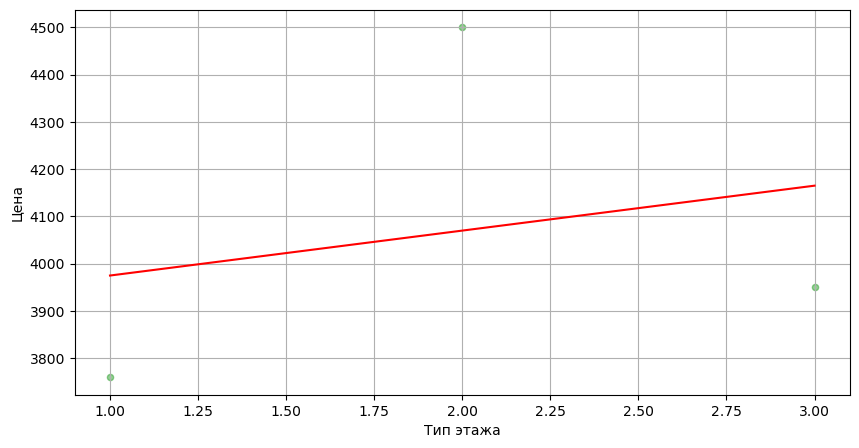

In [250]:
dependence_price_feature(filtered_df, 'category_number', 'Тип этажа') # вызовем метод

На данном этапе можно сказать, что цены на «других» этажах преимущественно выше, чем на первом и последнем, а на последнем выше чем на первом.

In [251]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df['last_price'].corr(filtered_df['category_number']).round(2)) 
# корреляция

Коэффициент корреляции отфильтрованной выборки: 0.02


Очевидно, что линейной зависимости между типом этажа квартиры и ценой практически не существует (не равна 0, но тем не менее, крайне низка.). График, направление линии регрессии и коэффициент корреляции показывает очень слабую линейную положительную корреляцию (коэффициент корреляции 0,02).

Самая высокая средняя цена квартир выше первого этажа, но не последный, самая низкая у квартир на 1 этаже, чуть выше у квартир на последнем этаже.

<a id = 'weekday_exposition_price'></a>

***- `weekday_exposition`***

Проанализируем, завиcит ли цена от дня недели подачи обьявления.

   weekday_exposition  last_price
0                   0     4300.00
1                   1     4300.00
2                   2     4350.00
3                   3     4285.00
4                   4     4250.00
5                   5     4298.12
6                   6     4250.00


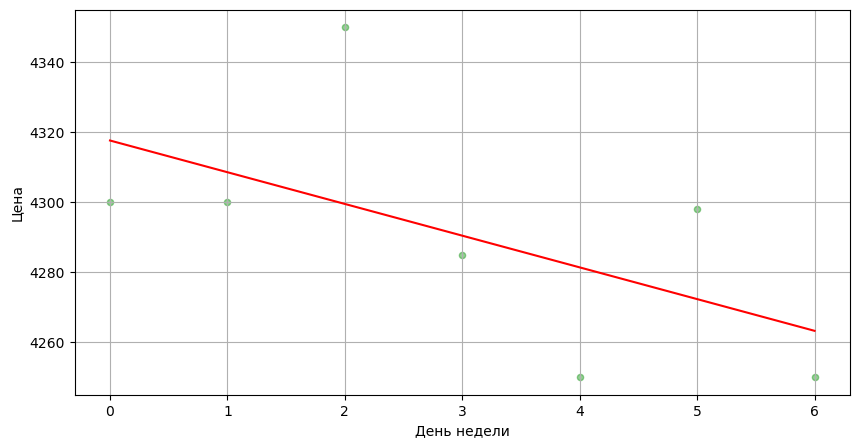

In [252]:
dependence_price_feature(filtered_df, 'weekday_exposition', 'День недели') # вызовем метод

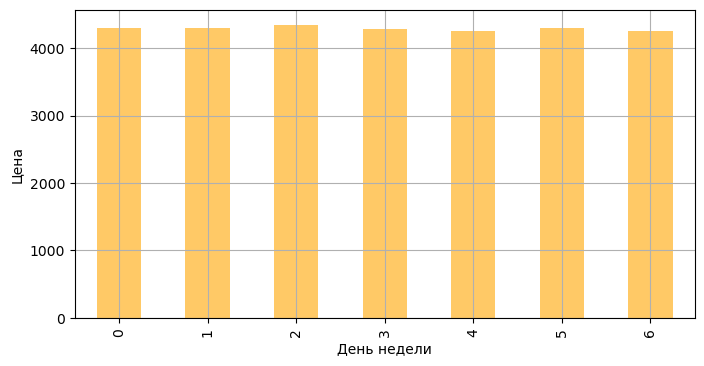

In [253]:
last_price_total = filtered_df.pivot_table(index='weekday_exposition', values='last_price', aggfunc= 'median')
last_price_total = last_price_total.reset_index() # сводная таблица#
last_price_total.plot(y='last_price', kind='bar', figsize=(8, 4), legend=False, grid=True, color='orange', alpha=0.6)
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.show()

In [254]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df['last_price'].corr(filtered_df['weekday_exposition']).round(2)) 
# корреляция

Коэффициент корреляции отфильтрованной выборки: -0.01


Линейной зависимость между тем, в какой из дней недели разместили объявление и ценой нет (коэффициент корреляции "-0,01" - близок к нулю).

Самая высокая средняя цена у квартир по поданным объявлениям в среду, самая низкая у квартир по поданным объявлениям в пятницу и воскресенье. По объявления поданным в понедельник, вторник и субботу практически одинакова цена квартиры.

***- `month_exposition`***

Проанализируем, завиcит ли цена от месяца подачи обьявления.

    month_exposition  last_price
0                  1      4300.0
1                  2      4300.0
2                  3      4300.0
3                  4      4500.0
4                  5      4250.0
5                  6      4150.0
6                  7      4250.0
7                  8      4230.0
8                  9      4300.0
9                 10      4300.0
10                11      4350.0
11                12      4300.0


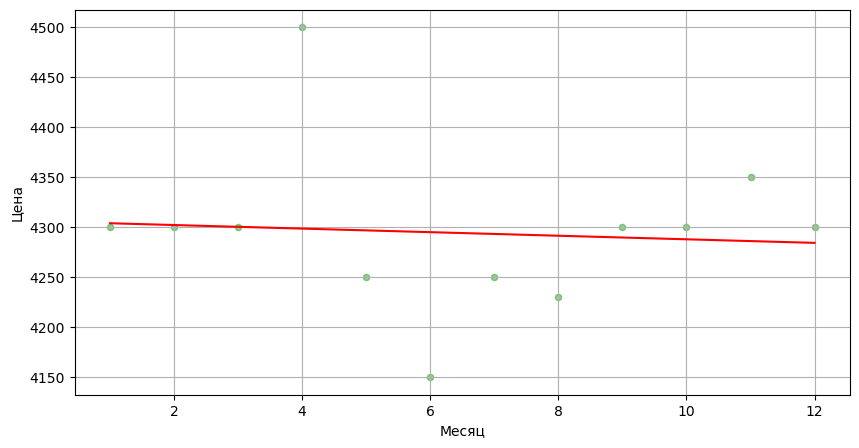

In [255]:
dependence_price_feature(filtered_df, 'month_exposition', 'Месяц') # вызовем метод

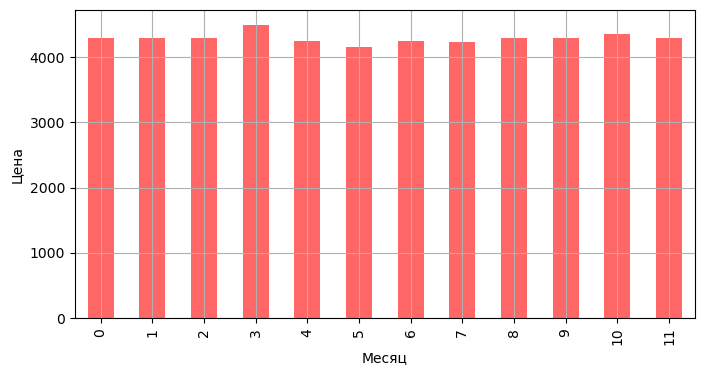

In [256]:
last_price_total = filtered_df.pivot_table(index='month_exposition', values='last_price', aggfunc= 'median')
last_price_total = last_price_total.reset_index() # сводная таблица#
last_price_total.plot(y='last_price', kind='bar', figsize=(8, 4), legend=False, grid=True, color='red', alpha=0.6)
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

In [257]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df['last_price'].corr(filtered_df['month_exposition']).round(2)) 
# корреляция

Коэффициент корреляции отфильтрованной выборки: 0.0


Линейной зависимость между тем, в какой из месяцев разместили объявление и ценой  нет (коэффициент корреляции равен нулю).

Самая высокая средняя цена у квартир по поданным объявлениям в апреле, самая низкая у квартир по поданным объявлениям в июне. По объявления поданным январе, феврале, марте, сентябрь,октябрь, декабрь практически одинакова средняя цена квартиры.Те пол года средняя цена одинаковая, в летнее время средняя цена падает.

***- `year_exposition`***

Проанализируем, завиcит ли цена от месяца подачи обьявления.

   year_exposition  last_price
0             2014      4900.0
1             2015      4600.0
2             2016      4200.0
3             2017      4199.0
4             2018      4289.0
5             2019      4700.0


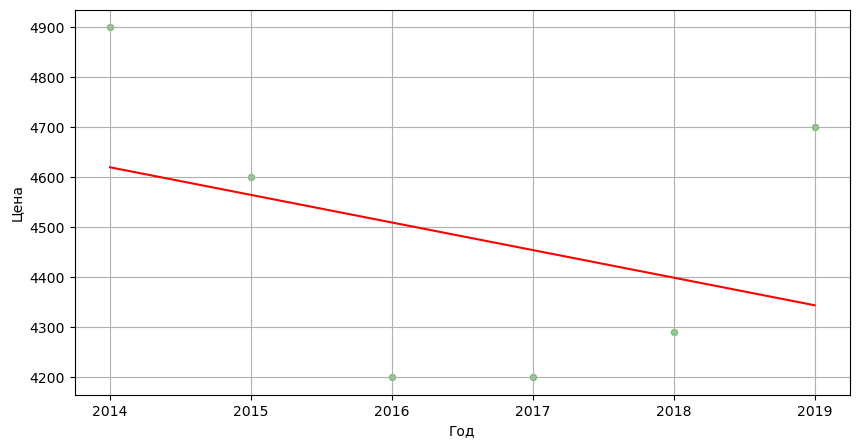

In [258]:
dependence_price_feature(filtered_df, 'year_exposition', 'Год') # вызовем метод

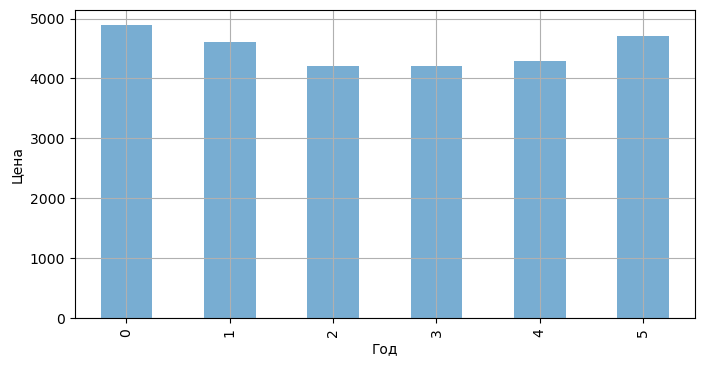

In [259]:
last_price_total = filtered_df.pivot_table(index='year_exposition', values='last_price', aggfunc= 'median')
last_price_total = last_price_total.reset_index() # сводная таблица#
last_price_total.plot(y='last_price', kind='bar', figsize=(8, 4), legend=False, grid=True, alpha=0.6)
plt.ylabel('Цена')
plt.xlabel('Год')
plt.show()

In [260]:
print('Коэффициент корреляции отфильтрованной выборки:', 
      filtered_df['last_price'].corr(filtered_df['year_exposition']).round(2)) 
# корреляция

Коэффициент корреляции отфильтрованной выборки: 0.01


Линейной зависимость между тем, в какой год разместили объявление и ценой нет (коэффициент корреляции около нуля).

Самая высокая средняя цена у квартир по поданным объявлениям в апреле, самая низкая у квартир по поданным объявлениям в 2014 году, сама низка  - в 2016 и 2017 годах. с 2018 года средняя цена начала расти.

***Вывод***

Сравнивая коэффициенты корреляции между общей площадью, площадью кухни и жилой,количеством комнат и типом этажа и ценой можно сделать вывод, что при значениях корреляции для общей площади 0.66, жилой площади 0.55, площадью кухни 0.43, количеством комнат 0.42 и типом этажа - 0,02, более сильную корреляцию показывает общая площадь квартиры к цене. Корреляция средней цены и времени подачи объявления равно нулю.

Среди всех проанализированных параметров, можно утверждать, что для ценообразование имеют значение качественные признаки квартиры, такие как площади и количество комнат. 

Что касается других характеристик, такие как тип этажа на котором квартира находится, день, месяца и год, когда было размещено объявление, эти данные никакого значения для ценообразование не имеют. На основе этих данных можно лишь сделать анализ пройденного, но с прогнозировать на будущее нельзя.

<a id = 'mean_locality_name'></a>

# **4.4. Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

Определим список населенных пунктов, наибольшим числом поданных объявлений о продаже квартир.

Построим сводную таблицу.

In [261]:
top_10_name = filtered_df['locality_name'].value_counts().head(10)
top_10_name

Санкт-Петербург    12673
Мурино               561
Кудрово              436
Шушары               424
Всеволожск           379
Колпино              330
Пушкин               321
Парголово            309
Гатчина              300
Выборг               219
Name: locality_name, dtype: int64

Первую позицию в списке занимает Санкт-Петербург 12,7 тыс. объявлений, остальные населенные показывают на много меньше объявлений.

Построим сводную таблицу со списком Топ-10 населенных пунктов по количеству объявлений и средней цено объявлений по этим населенным пунктам

In [262]:
top_10_name_index = top_10_name.index
top_10_name_price = filtered_df.query('locality_name in @top_10_name_index').pivot_table(index='locality_name',
                                                                                         values = 'price_of_meter',
                                                                                         aggfunc=['count', 'mean'])
top_10_name_price.columns = ['count', 'mean']
top_10_name_price

,count,mean
locality_name,,
Всеволожск,379,66.720871
Выборг,219,57.626347
Гатчина,300,68.545233
Колпино,330,75.244667
Кудрово,436,95.439656
Мурино,561,85.942371
Парголово,309,90.419676
Пушкин,321,99.366760
Санкт-Петербург,12673,104.185870


In [263]:
df.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15758,5500.0
Мурино,590,3400.0
Кудрово,472,3890.0
Шушары,440,3950.0
Всеволожск,398,3450.0
Пушкин,371,5150.0
Колпино,338,3600.0
Парголово,327,4100.0
Гатчина,307,3100.0


In [264]:
#самая высокая стоимость
print('Максимальная средняя цена за 1 квм')
display(top_10_name_price[top_10_name_price['mean']==top_10_name_price['mean'].max()])
print()
#самая низкая стоимость
print('Минимальная средняя цена за 1 квм')
top_10_name_price[top_10_name_price['mean']==top_10_name_price['mean'].min()]

Максимальная средняя цена за 1 квм


,count,mean
locality_name,,
Санкт-Петербург,12673,104.18587



Минимальная средняя цена за 1 квм


,count,mean
locality_name,,
Выборг,219,57.626347


Первое место по цене за квадратный метр занял Санкт-Петербург — 104.19 тыс.

Это ожидаемо - областной крупный город, цены в нем выше, чем в области. 

На последнем месте по цене за квадратный метр в топ-10 по количеству обьявлений - жилая недвижимость в Выборге, всего 57.63 тыс за квадратный метр (на 44.7% меньше).
Этот город расположент в 135.3 км от Санкт-Петербурга. 

<a id = 'mean_locality_name'></a>

# **4.5. Вычислим среднюю цену каждого километра. Определим, как стоимость объектов зависит от расстояния до центра города.**

Сгрупируем  объявлений только по Санкт-Петербургу и проверим данные по каждому километру отдельно. 

Для анализа будем использовать столбец cityCenters_nearest_km. 

Пустым значениям выборки по отдаленности от центра мы присвоили значение близкое к медиане. проверим как это отражится на цене на км. Скорее всего особой разницы не будет.

In [265]:
# срез по условию 
filtered_df_cut1 = filtered_df.query('locality_name == "Санкт-Петербург"')
# строим сводную таблицу
pivot_table_km1 = filtered_df_cut1.pivot_table(index = 'cityCenters_nearest_km', values = 'price_of_meter', aggfunc = 'mean')
pivot_table_km1

,price_of_meter
cityCenters_nearest_km,
0,117.001000
1,113.807895
2,111.700625
3,108.662000
4,117.484465
5,119.907319
6,116.151350
7,115.630264
8,109.503326


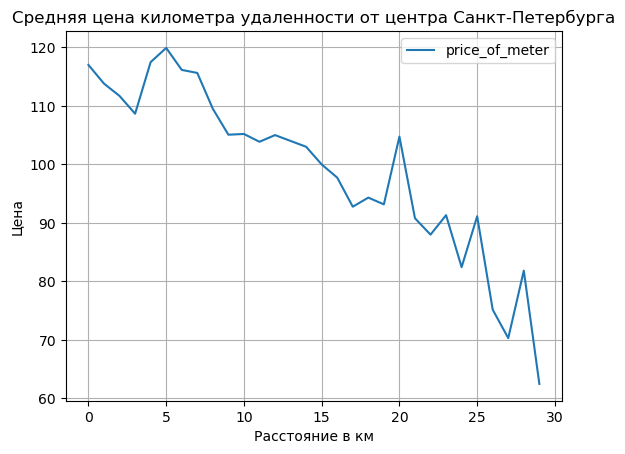

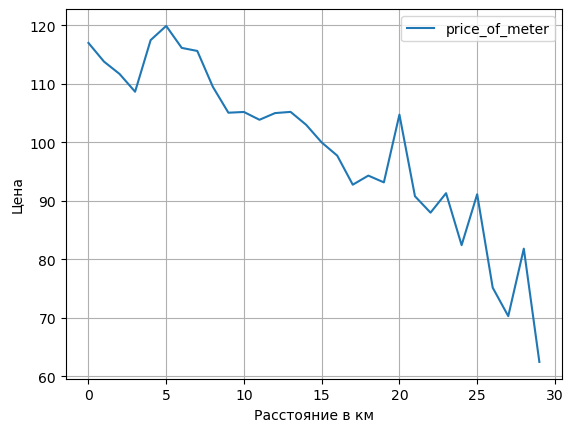

In [266]:
# срез по двум условиям (в том числе исключили тринадцатый километр)
filtered_df_cut = filtered_df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=13')
# строим сводную таблицу
pivot_table_km = filtered_df_cut.pivot_table(index = 'cityCenters_nearest_km', values = 'price_of_meter', aggfunc = 'mean')
# строим график
pivot_table_km.plot(grid=True, title='Средняя цена километра удаленности от центра Санкт-Петербурга')
plt.ylabel('Цена')
plt.xlabel('Расстояние в км')
plt.show()
# сняли сключение тринадцатого километра, строим график
pivot_table_km1.plot(grid=True)
plt.ylabel('Цена')
plt.xlabel('Расстояние в км')
plt.show()

Два графика доказали, что особых изменений нет. Значит в дальнейшем будем использовать значения без ограничений на тринадцатый километр.

Для наглядности постоим еще столбчатую диаграмму.

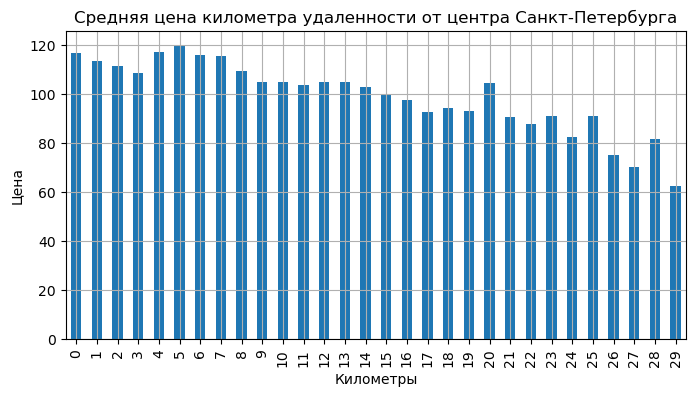

In [267]:
pivot_table_km1.plot(kind='bar', grid=True, title='Средняя цена километра удаленности от центра Санкт-Петербурга',
                     legend=False, figsize=(8, 4))
plt.xlabel('Километры')
plt.ylabel('Цена')
plt.show()

Центральной зоной можно считать квартиры в радиусе 8 км от цента Санкт-Петербурга.

Цены на 4-7км выше чем цены на квартиры, расположенные в 3 км от центра. Скорее всего оказывают влияние определенные районы типа Василеостровского, Приморского и Петроградского, которые не считаются центральными, но при этом считаются достаточно элитными с хорошо развитой инфраструктурой.

Можно выделить границу, которая отделяет центральную часть города от остальной части, в центральную зону входят все квартиры, расположенные на расстоянии до 8 км от центра города. Все что находится дальше этой границы уже не относится к центральной части города. график это подтверждает.

Между 9-м и 14-м километром стоимость не особо меняется, вероятнее всего это спальные районы с одинаковой инфраструктурой ис незначительной разницей в цене за километр.

Локальные пики наблюдаются в 20,25 и 27-м километре, не считая этих пиков начиная с 14 км стоимость резко уменьшается, можно предположить, что на этом расстоянии расположены не самые дорогие район или пригород, жилье может граничить с промышленными районами, цены это квартире не добавит, а скорее наоборот.

То есть, даже на приличном удалении от центра могут быть очень привлекательные для жизни и досуга районы, а следовательно и с достаточно дорогой недвижимостью.

Данные предствленные в таблице разнородные, но общий вывод сделать можно : чем дальше от центра, тем ниже цена.

# **Шаг 5. Общий вывод**

**Целью проведенной работы** является исследование интересных особенностей и зависимостей, которые существуют на рынке недвижимости.

На рассмотрение были предоставлены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

В целях поступившего задания, была проанализирована выборка объявлений о продаже квартир в Сенкт-пербурке и области за период   с ноября 2014 года по май 2019 года по предложенным параметрам.

Для достижения цели проекта, решили следующие задачи (этапы разработки):

**Шаг 1. Ознакомление с данными таблицы и их структурой.**

Оценка входных данных (размер выборки; столбцы, их содержание и типы данных; наличие пустых(незаполненных) элементов таблицы, их количество и причины возникновения.

Всего в таблице 22 столбца, встречаются следующие типы данных у столбцов: object, int, float, bool. Строк в таблице - 23699.
    
Столбцы содержат следующую информацию:  

- название населённого пункта,    
- расстояние до ближайшего аэропорта, парка, водоема, центра города,
- число балконов, этаж, всего этажей в доме, 
- число комнат,
- высота потолков,
- площадь квартиры: общая, жилая, кухни,
- дата публикации, сколько дней было размещено объявление (от публикации до снятия),
- цена на момент снятия с публикации,
- апартаменты (булев тип),свободная планировка (булев тип),квартира-студия (булев тип),
- число фотографий квартиры в объявлении. 

Детальную информацию можно посмотреть по ссылке  [входные данные](#data) 

**Шаг 2. Предобработка данных**

Очистка данных является важным этапом в процессе анализа данных. Предобработка данных позволяет убрать ошибки, выбросы и пропуски в данных, чтобы получить более точные и релевантные результаты. Различные вариации записи в данных могут затруднять их анализ и сравнение. Поэтому, важно проводить стандартизацию данных, убирая разные варианты написания, находить аномальные значения, определять их природу возникновения и искать замену.    
    
1.	Выявление пропусков и их замена корректными значениями. Оценка  и обработка аномалий, определение причин возникновения.

Пропуски были выявлены в 14 столбцах выборки.Больше всего пропусков в столбцах:

- `ceiling_height`(38.80%),
- `balcony` (48.61%), 
- `ponds_nearest` (61.56%),
- `parks_nearest` (65.9%),
- `is_apartment` (88.29%).

Не смотря на большой рамер пропусков, данные признаки не оказывают особого влияния на формирование цены продажи.
    
Часть пропусков обусловлена тем, что не все поля для заполенения являются обязательными. 
    
Вероятнее всего, большая часть пропусков появились по техническим причинам. Является ли такие ошибки случайностю, были ли они доработаны со временем или нет, говорить сложно, все свои соображения о выявленных потерянных данных необходимо довести до тех. отдела или разработчиков.
    
Были построенные и проанализированы гисторгаммы по всем числовым признакам таблица.
    
Детальную информацию можно посмотреть по ссылке[Гисторгаммы](#hist)

Создали "универсальный" метод `column_isna_nunique` для получения короткой информации по столбцу о пропусках и отсортированных уникальных значениях в столбце.

Детальную информацию можно посмотреть по ссылке[column_isna_nunique](#column_isna_nunique)
    
Предобработку данных начали с рассмотрения  и устранения пропусков столбце - `locality_name`. По данному столбцу выявилось немного пропусков (49 объектов - 0,21%). Размер пропусков ничтожный, можно было удалить все объекты с этими пропусками.
Населенные пункты, по которым не было известно также удаленность от центра удалили из выборки (41 строка).
По отставшимя 8 подобрали названия исходя из данные об удаленности от центра. 
    
Детальную информацию можно посмотреть по ссылке [Населенный пункт](#locality_name)

В столбце `rooms` пропусков не было, но в некоторых случаях (в 197 обьектах) число комнат указано как 0. Анализ показал, что если число комнат 0, то это или студия, или квартира свободной планировки. Заменили все нули на 1 (однокомнатная).

Детальную информацию можно посмотреть по ссылке [Количество комнат](#rooms)

Столбец `kitchen_area` имел 9,61% процент пропусков, их тоже можно было удалить из выборки за незначительностью пропусков.

Всего пропусков было выявленно 2276.
Определили, что 149 пропусков было по объектам `студия` и 65 по обьектам `аппартаменты`. Значит причиной пропусков явилась не внимательность, халатность пользователей сервиса при подачи объявления.

Чтобы заполнить пропущенные значения, мы взяли медианное значение для каждой квартиры с учетом количества комнат.

По столбцу `kitchen_area` было обнаружено очень маленькое значение площади кухни 1,3 квм, оставили так как есть, ведь в квартирах действительно могут быть кухни площадью - это квартиры малого метража (общий метраж этой квартиры 28,5квм).

Детальную информацию можно посмотреть по ссылке [Площадь кухни](#kitchen_area)

В столбце `living_are` имелись как отсутствующие значения (8,03%), так и очень малые значения.

С пропусками вопрос решим так: взяли медианное значение для каждой квартиры с определенным количеством комнат.
А медианное значение расчитывали как отношение жилой площади к общей площади. После замены обнаружили, что у 14 картир жилая площадь меньше нормы ( 9 квм на 1 человека), заменили данные по этим квартирам исходя из количества камнат в квартире (9 квм * количество комнат).
После доп.проверки оказалось, что  322 объекта имеют общую площадь меньше, чем сумма жилой и кухни. Заменили данные по жилой площади на разницу между общей площадью и кухней. 

Детальную информацию можно посмотреть по ссылке  [Жилая площадь](#living_area)

По столбцу `ceiling_height` были пропуски и аномальные значения (потолки до 2,2 м и выше 8,5 м). Заменили стандартным значением 2,5 м. пропуски и аномалии являются результатом не аккуратного заполнения данных на сервисе.

Детальную информацию можно посмотреть по ссылке  ссылки [Высота потолков](#ceiling_height)

По столбцу `floors_total` было выявлено 86 пропусков и  аномальных значения. Определили, что масимально высокый жилой комплекс в Пирете имеет 35 этажей 33 из них жилых.
Заменили все пропущенние значения и анамальные на этаж, указанный для квартиры.

Детальную информацию можно посмотреть по ссылке [Этажность дома](#floors_total) 

Для параметра `balcon` отметили остутствие 11498 записей, то есть 48.61% значений от общего количества объявлений.
Предположили, что если балкон не указан, то и балкона в квартире нет. Заменим все пропуски на ноль.

Детальную информацию можно посмотреть по ссылке [Балконы](#balcon)

В столбце `is_apartment` пропущено 20895 (88.29 % от общего количества) записей.
Пропуски связаны с тем, что параметр не был выбран пользователей, возможно не является важным признаком (обязательным для заполнения). Заменили пропущенные значения на False.

Детальную информацию можно посмотреть по ссылке [Аппартаменты](#is_apartment)

Только 44% пользвателей, которые указывают данные о парке `parks_around3000`, утверждают,что рядом есть парк. Так как мы не имеем возможности проставить какое-либо адекватные расстояния, оставили этот параметр без дополнительных исследований и заменили пропуски на ноль. 

Детальную информацию можно посмотреть по ссылке [Количество парков](#parks_around3000)

Только 50% пользователей, которые указывают данные о водоеме `ponds_around3000`, утверждают,что рядом есть водоем. Оставили этот параметр без дополнительных исследований и заменим пропуски на ноль. 

Детальную информацию можно посмотреть по ссылке [Количество водоемов](#ponds_around3000)

Всего пропусков в столбце `parks_nearest` 15584 (65,78 % от общего количества).
Если данных о начилие хотя бы одного парке в таблице нет -заменили пропуски по расстоянию до парка на "-1". 

Детальную информацию можно посмотреть по ссылке [Расстояние до парка](#parks_nearest)

98% пользователей, указывают данные о наличие рядом водоема `ponds_nearest`.
Всего пропусков 14554 (61,43 % от общего количества).
Заменили пропуски на на "-1".

Детальную информацию можно посмотреть по ссылке [Расстояние до водоема](#ponds_nearest)

Скорее всего данные по этим колонкам `airports_nearest` и `cityCenters_neares`, рассчитывает система. Вопрос к разработчикам - почему не везде указаны расстояния. Возможно расстояния рассчитывались в определенном радиусе относительно населенного пункта. А в пределах этого радиуса аэропорта не было, а так же система не смогла определить расстояние от центра до насеоенного пункта, поэтому указать в этих столбцах системе было нечего. Пытались заменили пропущенные значения на максимальное по городам, но такие данные определись лишь для очень незначительного количества городов. В итоге заменили расстояние до аерепорта на 27 км, а до центра на 13км. Эти значения близки к медианным значения по этим столбцам, а значит на среднее и медианное значение выборки они не сильно повлияют. Учли этот факт при работе с данными в дальнейшем.

Детальную информацию можно посмотреть по ссылке [Расстояние до центра и аеропорта](#airports_nearest)

В столбце `days_exposition` много пропусков  -3171 (13,38%).
Пропущенных значений заполнили 0. Значение 0 - будет означать то, что квартира ещё продаётся.Так как на сайте существуют ограничения  по срокам публикации (максимально 90 дней), нужно задать вопрос разработчикам: почему есть обьявления срок публикации которых превышает 90 дней.

Детальную информацию можно посмотреть по ссылке [Количество дней размещения объявления](#days_exposition)

В столбце `last_price` была обнаружена квартира с необычно низкой ценой, судя по всему тут ошибка. Удалили ее.

Детальную информацию можно посмотреть по ссылке [Ценна продажи квартиры](#last_price)

2.  Замена типов данных.

- нашли столбцы, в которых нужно изменить тип данных,
- преобразовали тип данных в выбранных столбцах:

last_price - цену на квартиру в рублях с указанием копеек лишено смысла,
floors_total - половина этажа не существует,
balcony - исходя из значения в столце - это целще число,
airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest - расстояния указаны в метрах, откинем запятую
parks_around3000 и ponds_around3000 - по смыслу - целое число.
days_exposition - значение в днях, откинем запятую,
is_apartment - переведем в тип bool.

Детальную информацию можно посмотреть по ссылке [Замена типов данных](#type)

**Шаг 3. Добавили в таблицу новые столбцы**

Созданы дополнительные столбцы для улучшения анализа данных.

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

Эти столбцы помогут уточнить характеристики квартир и их окружения, что может быть полезно для понимания тенденций рынка недвижимости. Например, столбец цена за 1 квм может выявить различия в цене на квадратный метр жилья в зависимости от его месторасположения и других факторов. Столбцы день, месяц и год могут быть полезны для анализа цен в разные периоды времени. Столбец тип этажа позволит выявить, какие типы этажей квартир наиболее влияют на цену квартиры. Столбцы удаленность от центра, аеропорта и тд. помогут оценить, как близко квартиры расположены к различным объектам инфраструктуры, что может оказывать влияние на цену.

Детальную информацию можно посмотреть по ссылке [Новые столбцы](#new_columns)

**Шаг 4. Провели исследовательский анализ данных**

Определение значимых параметров для анализа данных также является важным шагом. Например, в данном проекте, параметры комнат, жилой площади, кухни и высоты потолков были отфильтрованы и преобразованы, что помогло получить более точные и релевантные результаты. Определение пороговых значений для фильтрации выбросов и ошибок в данных также может помочь в получении более точных результатов.

1.	Изучили следующие параметры объектов: 

- общая площадь;
Детальную информацию можно посмотреть по ссылке [Общая площадь](#total_area)
- жилая площадь;
Детальную информацию можно посмотреть по ссылке [Жилая площадь](#living_area)
- площадь кухни;
Детальную информацию можно посмотреть по ссылке [Площадь кухни](#kitchen_area)
- цена объекта;
Детальную информацию можно посмотреть по ссылке [Цена обьекта](#last_price)
- количество комнат;
Детальную информацию можно посмотреть по ссылке [Количество комнат](#rooms)
- высота потолков;
Детальную информацию можно посмотреть по ссылке [Высота потолков](#ceiling_height)
- этаж квартиры;
Детальную информацию можно посмотреть по ссылке [Этаж квартиры](#floor)
- тип этажа квартиры («первый», «последний», «другой»);
Детальную информацию можно посмотреть по ссылке [тип этажа квартиры](#floor)
- общее количество этажей в доме;
Детальную информацию можно посмотреть по ссылке [Этажность дома](#floors_total)
- расстояние до центра города в метрах;
Детальную информацию можно посмотреть по ссылке [Расстояние от центра](#cityCenters_nearest)
- расстояние до ближайшего аэропорта;
Детальную информацию можно посмотреть по ссылке [Расстояние от аеропорта](#airports_nearest)
- расстояние до ближайшего парка;
Детальную информацию можно посмотреть по ссылке [Расстояние до ближайщего парка](#parks_nearest)
- день и месяц публикации объявления.
Детальную информацию можно посмотреть по ссылке [День, месяц публикации объявления](#weekday_exposition)


Для работы с данными создали и использовали "универсальные" методы:

- `mean_median_min_max`, блогодаря которому сможем получать основные значения `mean` `median` `min` `max` для анализа данных.
Детальную информацию можно посмотреть по ссылке [Метод mean_median_min_max](#mean_median_min_max)
- `top_min_max`, который позволит просмативать топ-10 минимальный и максимальных значений по анализируемому столбцу
Детальную информацию можно посмотреть по ссылке [Метод top_min_max](#top_min_max)
- `percent_category`, создаст сводную таблицу и позволит найти процент каждой категории в общей выборке
Детальную информацию можно посмотреть по ссылке [Метод percent_category](#percent_category)
- `category_rooms`, для построения графика, что б посмотреть на распреление категорий столбца по количеству комнат
Детальную информацию можно посмотреть по ссылке [Метод category_rooms](#category_rooms)

Для всех анализируемых столбцов проделали один тот же порядок действий :
- вывели заначения минимальное, максимальное, среднее и медиану,
- построили гистограмму,
- определили границы и разделили столбец на категории по границам,
- вывели топ-5 мимимальных и максимальных значений по столбцу,
- создали сводную таблицу  с % от общей выборки по каждой категории столбца,
- посторили столбчатую диаграмму , что б посмотреть как распределяются категории столбца по количеству комнат в квартире,
- построили диаграмму размаха по столбцу и по категориям столбца и фикрировали дупустимый диапозон данных, выбросы.


По результатам обработки данных были сделаны следующие выводы о недвижимости по которой проводились дальнейшие исследования. 

Сборный образ однокомнатной квартиры по максимальным количествам предложений: маленькая квартира со маленькой кухней. 
Двухкомнатной — средняя квартира, с средней кухней. 
Трехкомнатные квартиры и более комнат квартиры — это элитно большие квартиры с элитно большой жилой площадью и элитно большой кухней.

Параметры после предобработки были следующими:

- Общая площадь квартир варьируется от 12 до 900 квм;
- Жилая площадь варьируется от 2.98 до 409.7 квм;
- Площадь кухни варьируется от 1.3 до 112 квм;
- Высота потолков колеблется от 2.2 до 8.3 метров;
- Цена квартир находится в диапазоне от 430 тыс до 763000тыс рублей;
- Удаленность от центра города колеблется от 181 до 65968 м;
- Количество комнат варьируется от 1 до 19;
- Этаж квартиры от 1 до 33;
- Этажность домов колеблется от 1 до 35;
- Удаленность от аэропорта колеблется от 0 до 84869 м;
- Удаленность от ближайшего парка может быть до 3190 м.

Выделили границы данных по которым сделали фильтрацию.

Были применены два подхода:

- первый - рассматривались значения по конкретному столбцу, определяли выбросы и нормальные границы без выбросов,
- второй - разделили данные по столбцу на категории и у каждой категории наблюдали выбросы. Второй подход увеличил валидный диапазон значений, но так как минимальное значение берется от категории с минимальным значением, а максимальное от категории с большим значением, то для всех промежуточных категорий могут быть включены выбросы. Этот вариант хоть и увеличивает исследуемую область и отсекает крайне (минимальные и макксимальные) выбросы, тем не менее содержит по некоторым категориям выбросы.

При первом подходе получены такие данные:

- Общая плошадь — от 12 до 115 квм,
- Жилая площадь — от 12 до 80 квм,
- Площадь кухни — от 1,3 до 18 квм,
- Высота потолка — от 2.3 до 2.95 м,
- Последняя цена квартиры — от 300тыс до 10000 тыс,
- Высота потолка — от 2.19 до 3.0 м,
- Этаж — от 1 до 17,
- Этаж дома - от 1 по 28,
- Удаленность от центра города — от 500м до 22 км,
- Удаленность от аеропорта — от 5км до 55 км,
- Удаленность от парка — от 1м до 750 км,
- Комнаты в квартире — от 1 до 6.

При втором подходе такие:

- Общая плошадь — от 25 до 170 квм,
- Жилая площадь — от 12 до 100 квм,
- Площадь кухни — от 2 до 26 квм,
- Высота потолка — от 2.35 до 3.56 м,
- Последняя цена квартиры — от 350тыс до 26000тыс,
- Этаж — от 1 до 15,
- Количество этажей в доме — от 1 до 28,
- Удаленность от центра города — от 180м до 50 км,
- Удаленность от аеропорта — от 6км до 54 км,
- Удаленность от парка — от 1м до 750 км,
- Комнаты в квартире — от 1 до 6.

Как видим неизменными остались значения ( в первом и втором варианте):

- Количество этажей в доме — от 1 до 28,
- Удаленность от парка — от 1м до 750 км,
- Комнаты в квартире — от 1 до 6.

2.	Изучили как быстро продавались квартиры `days_exposition`

- постройли гистограмму,
- посчитали среднее и медиану,
- посмотрели как влияет удаленность от центра на скороть продаж,
- определили границы и разделили столбец на категории по границам,
- вывели топ-5 мимимальных и максимальных значений по столбцу,
- создали сводную таблицу  с % от общей выборки по каждой категории столбца,
- посторили столбчатую диаграмму , что б посмотреть как распределяются категории столбца по количеству комнат в квартире,
- построили диаграмму рассеивания,
- определили сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими.


Подводя итоги можно сказать, что, если говорить о продажах квартиры без уточнения характеристик, то быстрая продажа происходит в пределах 43 дней, длительная от 7 месяцев и более.

Если рассматривать квартиры более подробно, по параметру количества комнат, увидим следующее:

- одно и двухкомнатные быстро продаются в течении до 43 дней, но длительных, затянувшихся (туда можно отнести и не опознанные) продаж совокупно в таком же количестве, что и быстрые и средние,
- для трех и четырехкомнатных (от 7 месяцев)- длительных, затянувшихся (и не опознанные) совокупно на 25% больше, чем быстрых и средних,
- для квартир от 5 комнат и более (от 7 месяцев) быстрых и средних продаж на 50% меньше, чем продаж затянувшиxся, длительных и не опознаных.

Если все это присовокупить - быстрых продаж мало.

Детальную информацию можно посмотреть по ссылке [Быстрые и долгие продажи](#days_exposition_min_max)

3.	Проанализировали и определили факторы, которые больше всего влияют на общую (полную) стоимость объекта

Рассматривали следующие признаки:
- общая площадь,
Детальную информацию можно посмотреть по ссылке [Общая площадь и цена](#total_area_price)
- жилая площадь,
Детальную информацию можно посмотреть по ссылке [Жилая площадь и цена](#living_area_price)
- площадь кухни,
Детальную информацию можно посмотреть по ссылке [Площадь кухни и цена](#kitchen_area_price)
- количества комнат,
Детальную информацию можно посмотреть по ссылке [Количество комнат и цена](#rooms_price)
- этажа, на котором расположена квартира (первый, последний, другой),
Детальную информацию можно посмотреть по ссылке [Тип этажа и цена](#floor_price)
- даты размещения (день недели, месяц, год).
Детальную информацию можно посмотреть по ссылке [Дата размещения и цена](#days_exposition_price)

Постройли графики, которые показали величину зависимость цены от указанных выше параметров, для подготовки данных перед визуализацией создали сводные таблицы, расчитали коффициент корреляции.

Обьявили "универсальный" метод `dependence_price_feature` для создания сводной таблицы и диаграммы рассеивания.
Детальную информацию можно посмотреть по ссылке [dependence_price_feature](#dependence_price_feature)

Сравнивая коэффициенты корреляции между общей площадью, площадью кухни и жилой,количеством комнат и типом этажа и ценой можно сделать вывод, что при значениях корреляции для общей площади 0.66, жилой площади 0.55, площадью кухни 0.43, количеством комнат 0.42 и типом этажа - 0,02, более сильную корреляцию показывает общая площадь квартиры к цене. Корреляция средней цены и времени подачи объявления равно нулю.

Среди всех проанализированных параметров, можно утверждать, что для ценообразование имеют значение качественные признаки квартиры, такие как площади и количество комнат.

Что касается других характеристик, такие как тип этажа на котором квартира находится, день, месяца и год, когда было размещено объявление, эти данные никакого значения для ценообразование не имеют. На основе этих данных можно лишь сделать анализ пройденного, но спрогнозировать на будущее нельзя. Например: дата продажи позволят определить, в какой момент лучше продвигать рекламную компанию по продаже домов. В какие месяцы или дни недели. 

4.	Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделили населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Определили список населенных пунктов, наибольшим числом поданных объявлений о продаже квартир.
Построили сводную таблицу.
Первую позицию в списке занимает Санкт-Петербург 12,7 тыс. объявлений, остальные населенные показывают на много меньше объявлений.

Построили сводную таблицу со списком Топ-10 населенных пунктов по количеству объявлений и средней цене объявлений по этим населенным пунктам.
Первое место по цене за квадратный метр занял Санкт-Петербург — 104.19 тыс.
На последнем месте по цене за квадратный метр в топ-10 по количеству обьявлений - жилая недвижимость в Выборге, всего 57.63 тыс за квадратный метр (на 44.7% меньше).

Детальную информацию можно посмотреть по ссылке [Средняя цена квадратного метра Топ -10](#mean_locality_name)

5.	Выделили квартиры в Санкт-Петербурге и вычислили среднюю цену каждого километра. 

Сгрупировали объявлений только по Санкт-Петербургу и вывели данные по средней цена на каждый километр.

Определили, что центральной зоной можно считать квартиры в радиусе 8 км от цента Санкт-Петербурга.
Цены на 4-7км выше чем цены на квартиры, расположенные в 3 км от центра.  Там расположены районы, которые считаются элитными с хорошо развитой инфраструктурой.
Между 9-м и 14-м километром цена не особо меняется, вероятнее всего это спальные районы с одинаковой инфраструктурой и с незначительной разницей в цене за километр.
Начиная с 14 км стоимость резко уменьшается, можно предположить, что на этом расстоянии расположены не самые дорогие район или пригород, жилье может граничить с промышленными районами, цены это квартире не добавит, а скорее наоборот.

Можно сделать вывод: чем дальше от центра, тем ниже цена.

Детальную информацию можно посмотреть по ссылке [Расстояние от центра и цена](#mean_locality_name)

Проведя комплексный анализ данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет нам удалось выявить наиболее значимые параметры, которые влияют на формирование стоимости квартиры:

- Основным ориентиром для определения стоимости квартиры является стоимость квадратного метра.

- Количество комнат - чем больше комнат, тем выше стоимость жилья. Наиболее популярные квартиры имеют 2 комнаты.

- Общая площадь квартиры - чем больше площадь, тем выше стоимость жилья.

- Этаж квартиры. В большинстве случаев люди редко берут квартиры на первом этаже из-за их небезопасности, а квартиры на последним - из-за возможных проблем с крышей. Соотвественно самыми дорогими считаются комфортные квартиры между первым и последним этажом. Этаж квартиры - на первом этаже самые дешевые квартиры, наиболее дорогие квартиры распагаются выше первого и ниже последнего этажа.

- Стоимость недвижимости зависит от расстояния до центра города. Обычно, чем ближе к центру, тем выше цена за квадратный метр.
Но при этом, даже на приличном удалении от центра могут быть очень привлекательные для жизни и досуга районы, а следовательно и с достаточно дорогой недвижимостью.